In [1]:
#imports
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt

from layered_neural_net import lnn



In [2]:
#Run_hyperparameters
layers = [28*28,10,10]


In [3]:
#load dataset
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
#try on all classes
#one hot encode
def one_hot_encode(x):
    out = np.zeros((len(x), max(x)+1))
    for i in range(len(x)):
        out[i][x[i]] = 1
    return out

y_train_ohe = one_hot_encode(train_y)
y_test_ohe = one_hot_encode(test_y)
#flatten images
x_train = train_X.reshape(len(train_X), 28*28)
x_test = test_X.reshape(len(test_X), 28*28)

x_val = x_train[:10000]
y_val = y_train_ohe[:10000]

x_test = np.array_split(x_test, 10)
y_test_ohe = np.array_split(y_test_ohe, 10)




In [5]:

print(x_test[0].shape)
print(y_test_ohe[0].shape)

print(x_train.shape)
print(y_train_ohe.shape)


(1000, 784)
(1000, 10)
(60000, 784)
(60000, 10)


In [6]:
#setting up evolutionary pipeline
performance_over_time = []
#creating initial population
population_size = 30
def create_population(population_size):
    population = []
    print("Creating networks")
    for i in range(population_size):
        net = lnn(layers)
        population.append(net)
        print("|", end="")
    print("done!")
    return population


networks = create_population(population_size)

Creating networks
||||||||||||||||||||||||||||||done!


In [7]:
def get_perf(t):
        return t[0]

#measure performance of all the networks
def evaluate_performance(population, x, y):
    performances = []
    print("evaluating performances", end="")
    for net in population:
        predictions = net.predict(x)[0]
        correct_count = len(x)-(np.sum(np.abs(y - predictions))/2)
        performances.append((correct_count/len(x), net))
        #print(correct_count/len(x))
        print("|", end="")
    print(" done!", end=" ")
    #sort by best performance
    performances.sort(key = get_perf, reverse = True)
    return performances

evaluated_networks = evaluate_performance(networks, x_test[0], y_test_ohe[0])
print("best performer of this generation :", evaluated_networks[0][0])
performance_over_time.append(np.array(evaluated_networks)[:,0])

evaluating performances|||||||||||||||||||||||||||||| done! best performer of this generation : 0.179


In [8]:
#the n best performing networks will be selected
n = 3
mutation_range = 0.1

def repopulate(evaluated_networks, mutation_range, n):
    offspring_per_network = int(population_size/n)
    parents = [i[1] for i in evaluated_networks[:n]]
    offspring = []
    for net in parents:
        net_offspring = net.reproduce(min(offspring_per_network, population_size - len(offspring)), mutation_range)
        offspring.extend(net_offspring)
    next_gen = parents + offspring
    next_gen = next_gen[:population_size]
    return next_gen
    
next_generation = repopulate(evaluated_networks, mutation_range,n)

In [9]:
performance_over_time = []
validation_accuracy = []

In [10]:
test_sets_used = []
mutation_ranges = []
#weight_history = []

In [11]:
print(np.array(performance_over_time))
for i in performance_over_time:
    print(len(i))

[]


generation 1  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.179
average best of last 100 generations 0.179
evaluating performances| done! 

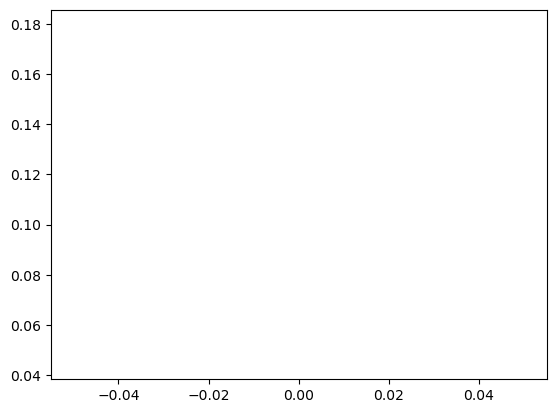

average best of last 100 generations 0.179


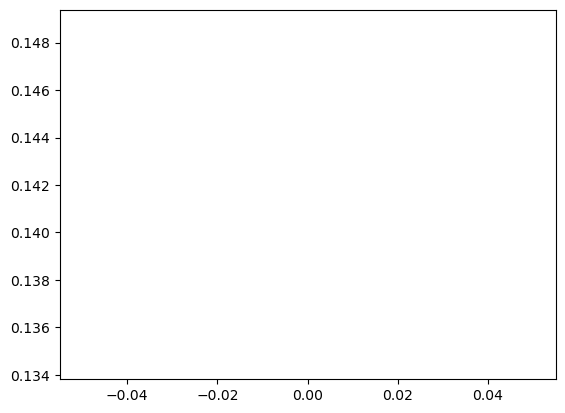

validation accuracy: 0.1416
generation 2  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.134
generation 3  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.138
generation 4  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.164
generation 5  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.165
generation 6  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.147
generation 7  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.165
generation 8  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.188
generation 9  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.153
generation 10  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.196
generation 11  test set: 7 evaluating performances||||||||||||||||||||||||||||||

generation 78  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.235
generation 79  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.237
generation 80  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.239
generation 81  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.238
average best of last 100 generations 0.2014074074074075
evaluating performances| done! generation 82  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.252
generation 83  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.253
generation 84  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.244
generation 85  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.234
generation 86  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.261
generation 87

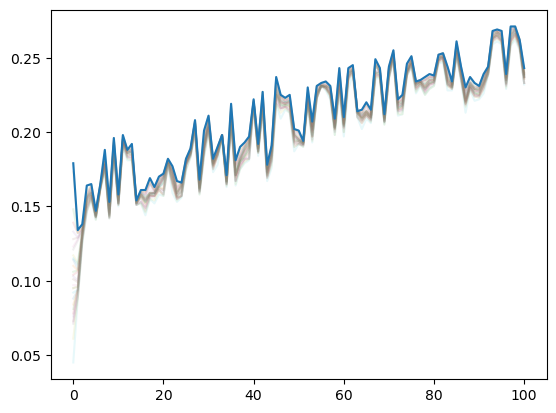

average best of last 100 generations 0.2112800000000001


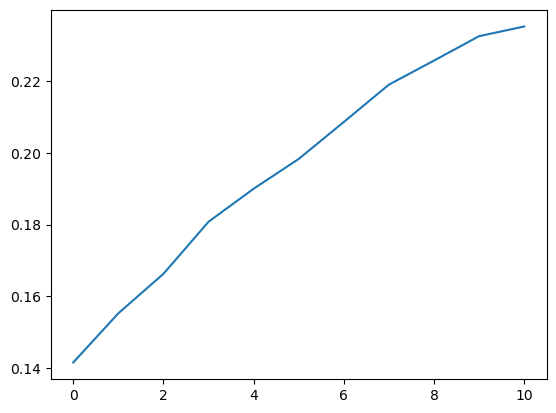

validation accuracy: 0.2352
generation 102  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.243
generation 103  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.273
generation 104  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.271
generation 105  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.247
generation 106  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.246
generation 107  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.255
generation 108  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.233
generation 109  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.243
generation 110  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.264
generation 111  test set: 6 evaluating performances||||||||||||

generation 177  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.272
generation 178  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.288
generation 179  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.305
generation 180  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.29
generation 181  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.292
average best of last 100 generations 0.2667
evaluating performances| done! generation 182  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.295
generation 183  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.281
generation 184  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.269
generation 185  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.297
generation 186  t

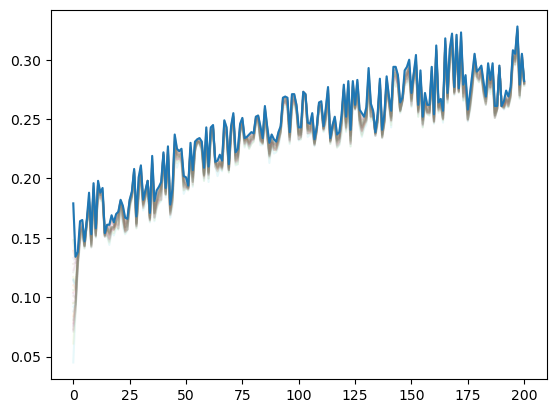

average best of last 100 generations 0.27369000000000004


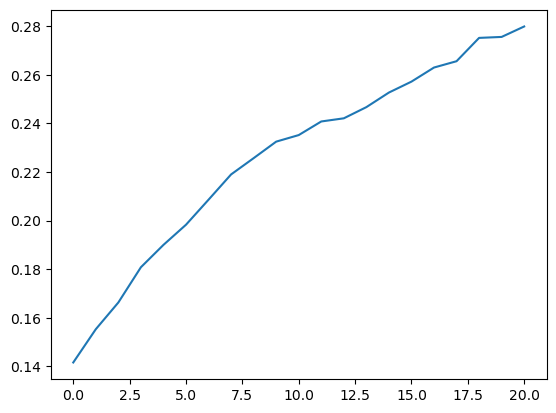

validation accuracy: 0.2799
generation 202  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.269
generation 203  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.329
generation 204  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.276
generation 205  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.277
generation 206  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.308
generation 207  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.308
generation 208  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.318
generation 209  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.33
generation 210  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.335
generation 211  test set: 3 evaluating performances|||||||||||||

generation 279  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.355
generation 280  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.358
generation 281  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.308
average best of last 100 generations 0.30895000000000006
evaluating performances| done! generation 282  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.363
generation 283  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.34
generation 284  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.31
generation 285  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.36
generation 286  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.307
generation 287  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.314
genera

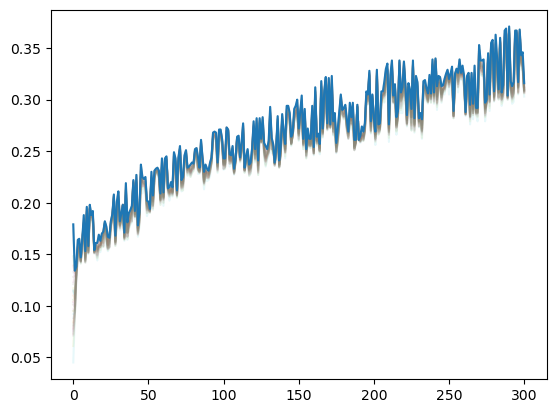

average best of last 100 generations 0.31980000000000003


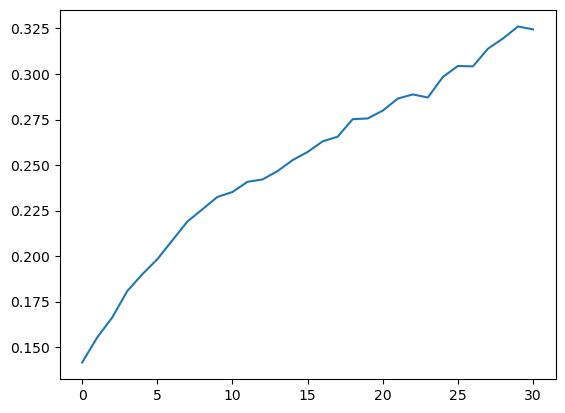

validation accuracy: 0.3245
generation 302  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.318
generation 303  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.316
generation 304  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.371
generation 305  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.367
generation 306  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.348
generation 307  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.317
generation 308  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.316
generation 309  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.312
generation 310  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.355
generation 311  test set: 8 evaluating performances||||||||||||

generation 378  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.335
generation 379  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.38
generation 380  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.414
generation 381  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.337
average best of last 100 generations 0.35345000000000015
evaluating performances| done! generation 382  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.414
generation 383  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.339
generation 384  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.34
generation 385  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.418
generation 386  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.395
gener

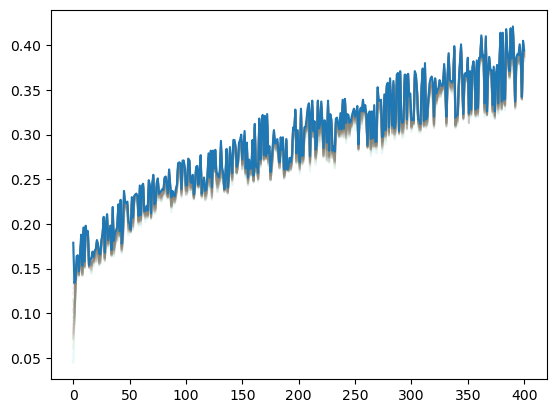

average best of last 100 generations 0.36273000000000005


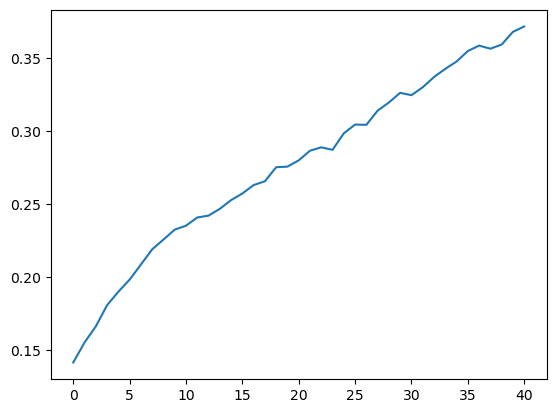

validation accuracy: 0.3715
generation 402  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.425
generation 403  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.345
generation 404  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.382
generation 405  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.405
generation 406  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.426
generation 407  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.395
generation 408  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.406
generation 409  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.382
generation 410  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.391
generation 411  test set: 5 evaluating performances||||||||||||

generation 477  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.404
generation 478  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.446
generation 479  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.38
generation 480  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.382
generation 481  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.406
average best of last 100 generations 0.3903799999999999
evaluating performances| done! generation 482  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.414
generation 483  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.416
generation 484  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.364
generation 485  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.416
gener

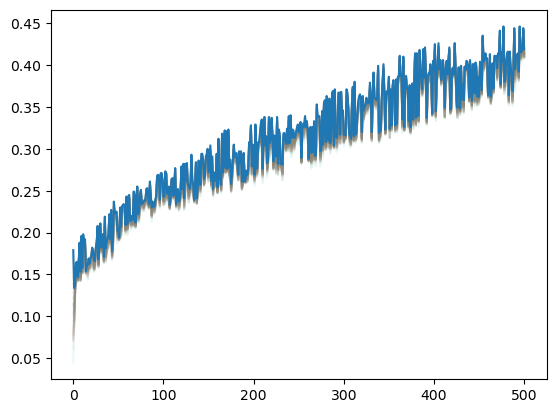

average best of last 100 generations 0.3951600000000001


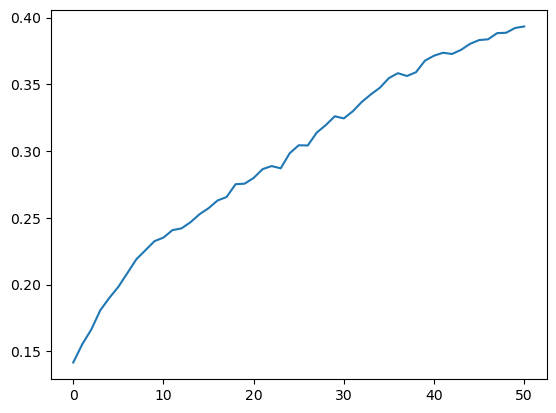

validation accuracy: 0.3934
generation 502  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.376
generation 503  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.417
generation 504  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.417
generation 505  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.422
generation 506  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.373
generation 507  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.444
generation 508  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.415
generation 509  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.423
generation 510  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.424
generation 511  test set: 5 evaluating performances||||||||||||

generation 577  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.389
generation 578  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.429
generation 579  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.429
generation 580  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.392
generation 581  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.431
average best of last 100 generations 0.41635000000000005
evaluating performances| done! generation 582  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.389
generation 583  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.431
generation 584  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.414
generation 585  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.429
gen

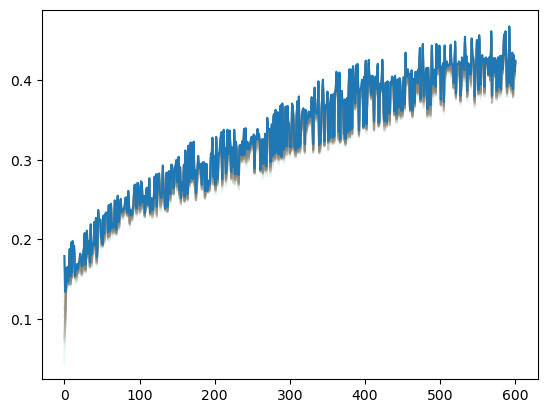

average best of last 100 generations 0.4189700000000002


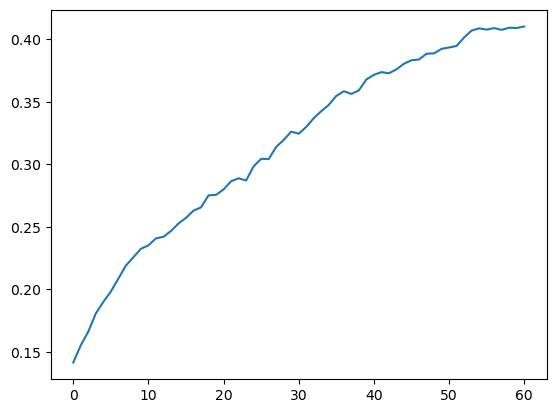

validation accuracy: 0.4102
generation 602  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.391
generation 603  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.429
generation 604  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.415
generation 605  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.416
generation 606  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.425
generation 607  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.431
generation 608  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.466
generation 609  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.393
generation 610  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.409
generation 611  test set: 8 evaluating performances||||||||||||

generation 678  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.432
generation 679  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.433
generation 680  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.44
generation 681  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.468
average best of last 100 generations 0.4239200000000002
evaluating performances| done! generation 682  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.436
generation 683  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.472
generation 684  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.423
generation 685  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.474
generation 686  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.424
gener

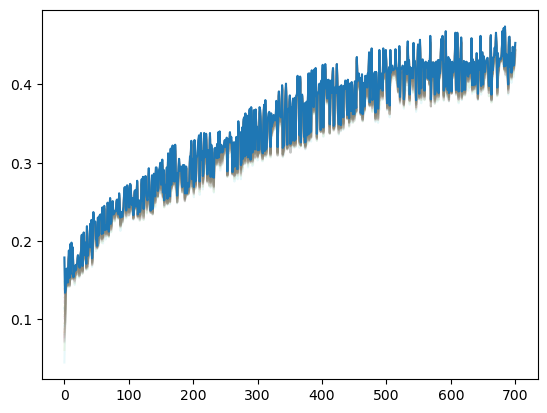

average best of last 100 generations 0.42690999999999996


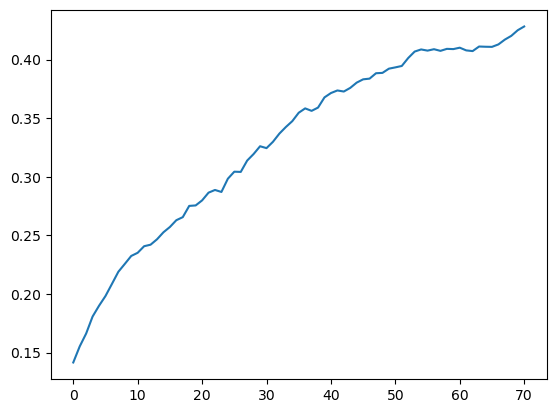

validation accuracy: 0.4283
generation 702  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.433
generation 703  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.491
generation 704  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.496
generation 705  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.414
generation 706  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.451
generation 707  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.434
generation 708  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.417
generation 709  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.448
generation 710  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.457
generation 711  test set: 4 evaluating performances||||||||||||

generation 777  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.425
generation 778  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.427
generation 779  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.456
generation 780  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.469
generation 781  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.482
average best of last 100 generations 0.4485500000000001
evaluating performances| done! generation 782  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.442
generation 783  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.484
generation 784  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.432
generation 785  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.433
gene

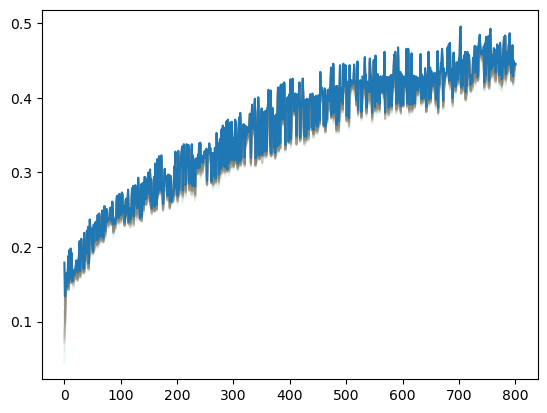

average best of last 100 generations 0.4515399999999999


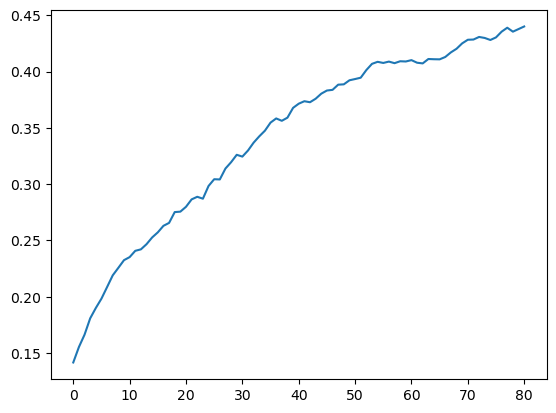

validation accuracy: 0.4401
generation 802  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.451
generation 803  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.476
generation 804  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.449
generation 805  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.451
generation 806  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.48
generation 807  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.467
generation 808  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.468
generation 809  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.45
generation 810  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.437
generation 811  test set: 2 evaluating performances||||||||||||||

generation 877  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.43
generation 878  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.495
generation 879  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.443
generation 880  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.445
generation 881  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.461
average best of last 100 generations 0.45609999999999995
evaluating performances| done! generation 882  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.494
generation 883  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.496
generation 884  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.449
generation 885  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.485
gene

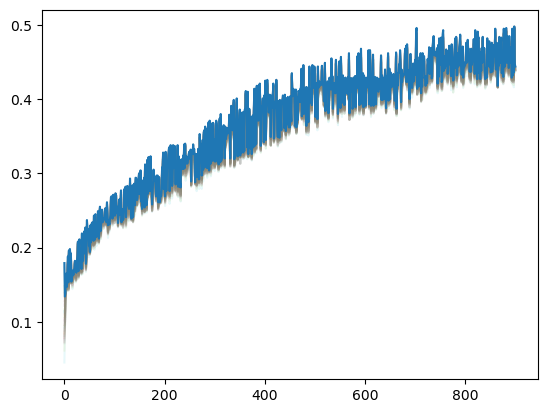

average best of last 100 generations 0.4584500000000001


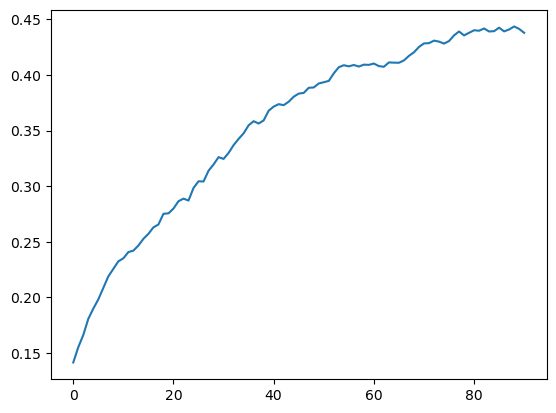

validation accuracy: 0.4378
generation 902  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.472
generation 903  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.434
generation 904  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.496
generation 905  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.5
generation 906  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.484
generation 907  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.433
generation 908  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.435
generation 909  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.449
generation 910  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.435
generation 911  test set: 9 evaluating performances||||||||||||||

generation 977  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.496
generation 978  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.473
generation 979  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.495
generation 980  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.495
generation 981  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.474
average best of last 100 generations 0.4628599999999997
evaluating performances| done! generation 982  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.496
generation 983  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.522
generation 984  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.476
generation 985  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.445
gene

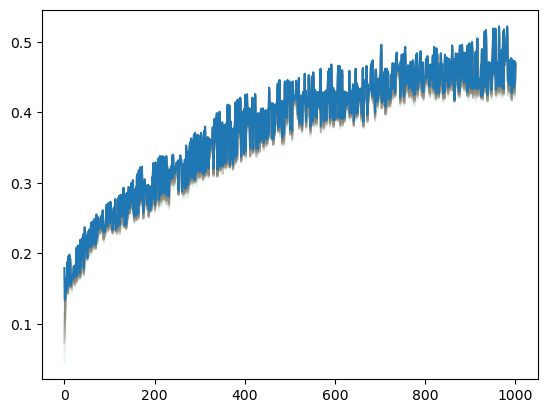

average best of last 100 generations 0.4624099999999997


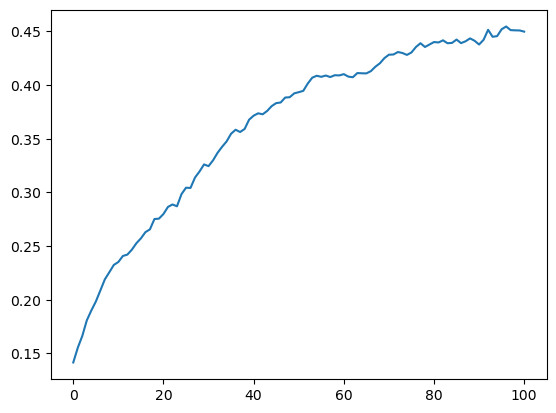

validation accuracy: 0.4498
generation 1002  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.496
generation 1003  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.449
generation 1004  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.495
generation 1005  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.499
generation 1006  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.499
generation 1007  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.472
generation 1008  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.466
generation 1009  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.481
generation 1010  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.519
generation 1011  test set: 2 evaluating performances||

generation 1077  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.463
generation 1078  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.466
generation 1079  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.461
generation 1080  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.498
generation 1081  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.46
average best of last 100 generations 0.4740100000000001
evaluating performances| done! generation 1082  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.464
generation 1083  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.511
generation 1084  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.503
generation 1085  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

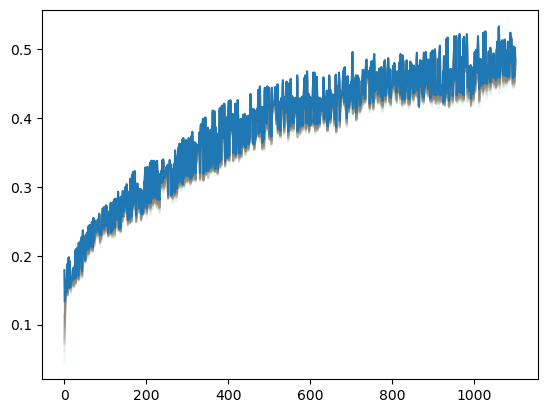

average best of last 100 generations 0.4788899999999998


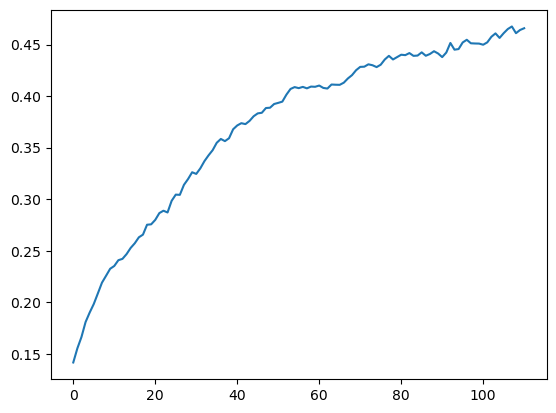

validation accuracy: 0.4658
generation 1102  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.472
generation 1103  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.522
generation 1104  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.463
generation 1105  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.505
generation 1106  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.538
generation 1107  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.483
generation 1108  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.537
generation 1109  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.478
generation 1110  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.471
generation 1111  test set: 5 evaluating performances||

generation 1176  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.468
generation 1177  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.495
generation 1178  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.505
generation 1179  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.478
generation 1180  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.527
generation 1181  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.495
average best of last 100 generations 0.4914100000000002
evaluating performances| done! generation 1182  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.481
generation 1183  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.501
generation 1184  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

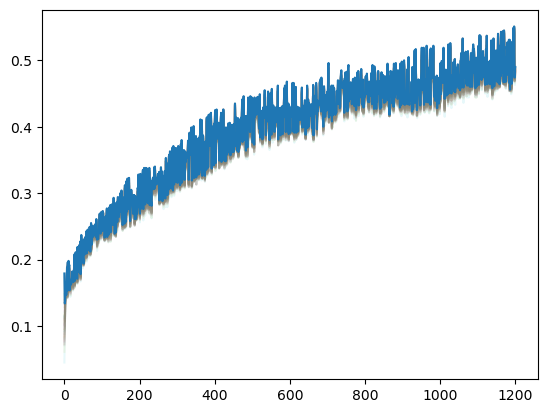

average best of last 100 generations 0.49328000000000016


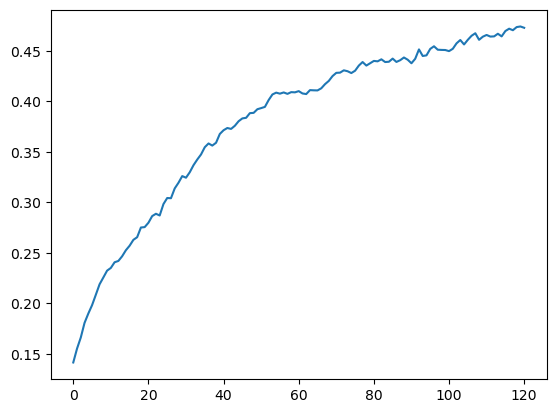

validation accuracy: 0.4729
generation 1202  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.486
generation 1203  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.492
generation 1204  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.468
generation 1205  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.472
generation 1206  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.485
generation 1207  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.491
generation 1208  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.547
generation 1209  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.468
generation 1210  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.551
generation 1211  test set: 0 evaluating performances||

generation 1276  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.532
generation 1277  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.493
generation 1278  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.523
generation 1279  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.475
generation 1280  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.517
generation 1281  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.497
average best of last 100 generations 0.49782000000000026
evaluating performances| done! generation 1282  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.492
generation 1283  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.504
generation 1284  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 

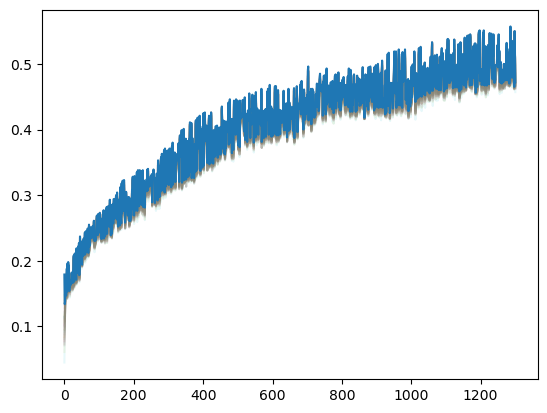

average best of last 100 generations 0.5000200000000001


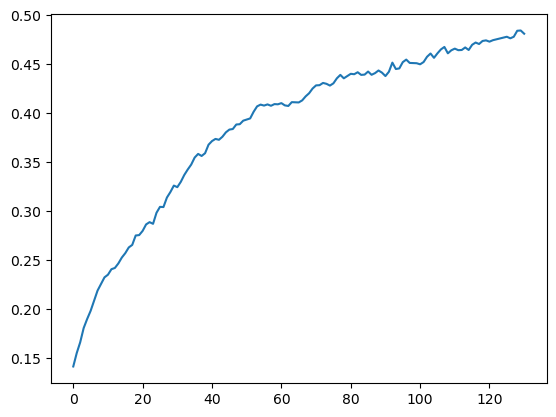

validation accuracy: 0.481
generation 1302  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.471
generation 1303  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.486
generation 1304  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.503
generation 1305  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.528
generation 1306  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.53
generation 1307  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.533
generation 1308  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.52
generation 1309  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.479
generation 1310  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.479
generation 1311  test set: 7 evaluating performances|||||

generation 1377  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.533
generation 1378  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.496
generation 1379  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.499
generation 1380  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.499
generation 1381  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.522
average best of last 100 generations 0.50675
evaluating performances| done! generation 1382  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.485
generation 1383  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.486
generation 1384  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.506
generation 1385  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.535
genera

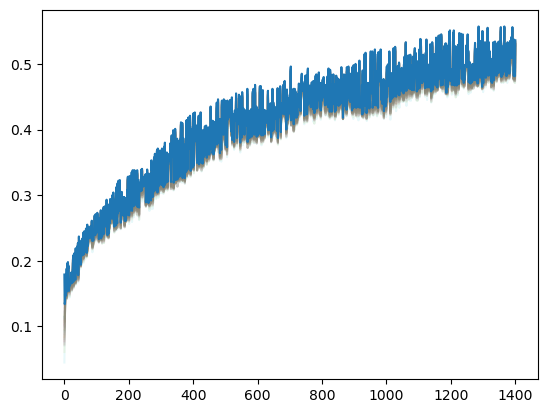

average best of last 100 generations 0.5083400000000001


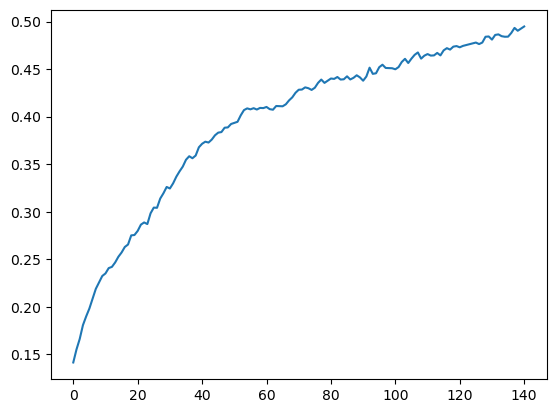

validation accuracy: 0.4948
generation 1402  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.499
generation 1403  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.535
generation 1404  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.486
generation 1405  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.492
generation 1406  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.516
generation 1407  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.491
generation 1408  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.503
generation 1409  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.516
generation 1410  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.541
generation 1411  test set: 4 evaluating performances||

generation 1477  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.487
generation 1478  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.502
generation 1479  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.494
generation 1480  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.512
generation 1481  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.54
average best of last 100 generations 0.5153499999999999
evaluating performances| done! generation 1482  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.505
generation 1483  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.557
generation 1484  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.528
generation 1485  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

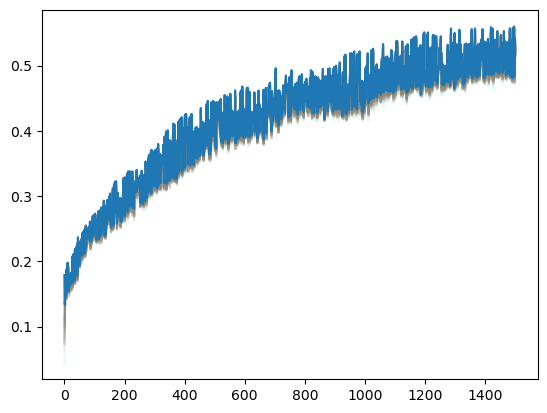

average best of last 100 generations 0.5159400000000001


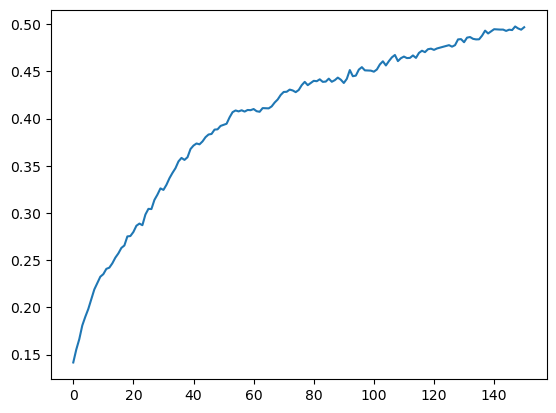

validation accuracy: 0.4969
generation 1502  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.526
generation 1503  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.494
generation 1504  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.503
generation 1505  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.513
generation 1506  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.541
generation 1507  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.534
generation 1508  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.522
generation 1509  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.516
generation 1510  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.542
generation 1511  test set: 5 evaluating performances||

generation 1577  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.519
generation 1578  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.544
generation 1579  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.518
generation 1580  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.519
generation 1581  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.504
average best of last 100 generations 0.52271
evaluating performances| done! generation 1582  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.498
generation 1583  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.528
generation 1584  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.521
generation 1585  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.488
genera

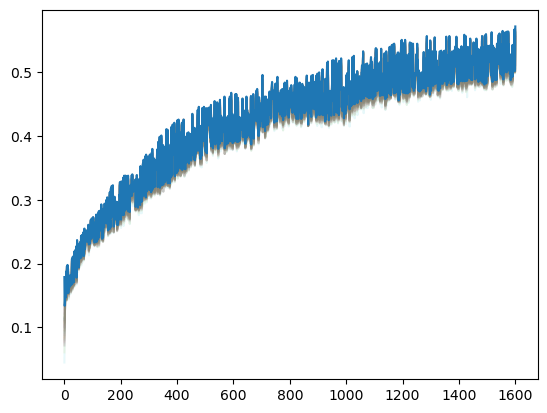

average best of last 100 generations 0.52227


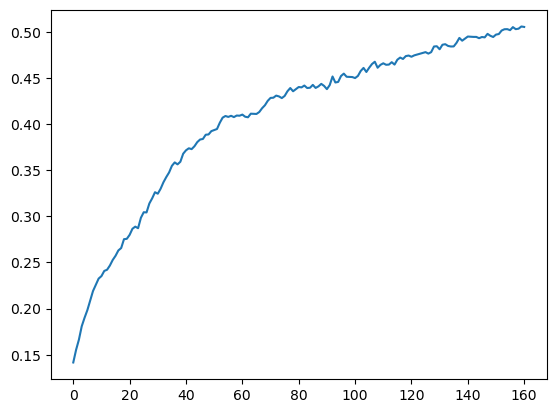

validation accuracy: 0.5052
generation 1602  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.572
generation 1603  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.573
generation 1604  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.541
generation 1605  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.513
generation 1606  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.528
generation 1607  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.527
generation 1608  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.547
generation 1609  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.547
generation 1610  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.506
generation 1611  test set: 6 evaluating performances||

generation 1678  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.535
generation 1679  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.539
generation 1680  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.526
generation 1681  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.526
average best of last 100 generations 0.52515
evaluating performances| done! generation 1682  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.545
generation 1683  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.516
generation 1684  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.533
generation 1685  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.534
generation 1686  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.517
genera

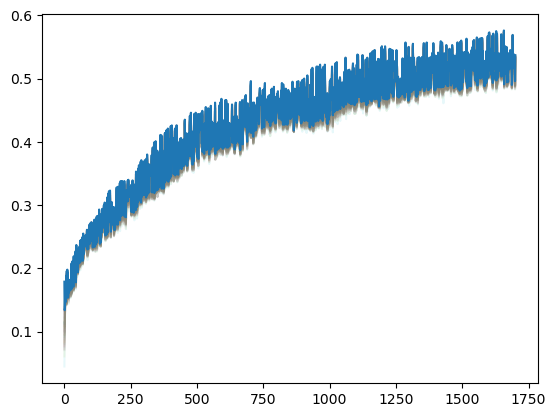

average best of last 100 generations 0.5273400000000003


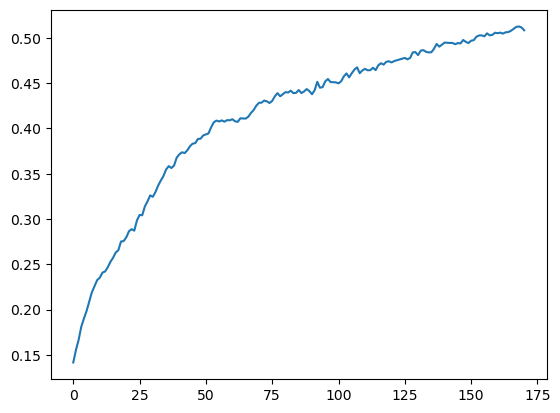

validation accuracy: 0.5084
generation 1702  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.516
generation 1703  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.517
generation 1704  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.499
generation 1705  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.518
generation 1706  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.531
generation 1707  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.54
generation 1708  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.545
generation 1709  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.514
generation 1710  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.518
generation 1711  test set: 8 evaluating performances|||

generation 1776  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.552
generation 1777  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.538
generation 1778  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.527
generation 1779  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.546
generation 1780  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.513
generation 1781  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.514
average best of last 100 generations 0.5301500000000001
evaluating performances| done! generation 1782  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.52
generation 1783  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.54
generation 1784  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.5

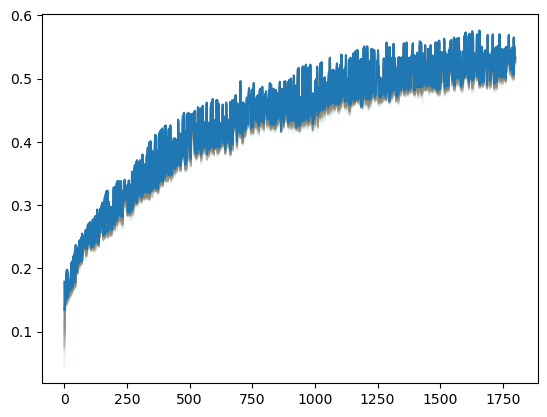

average best of last 100 generations 0.5320599999999999


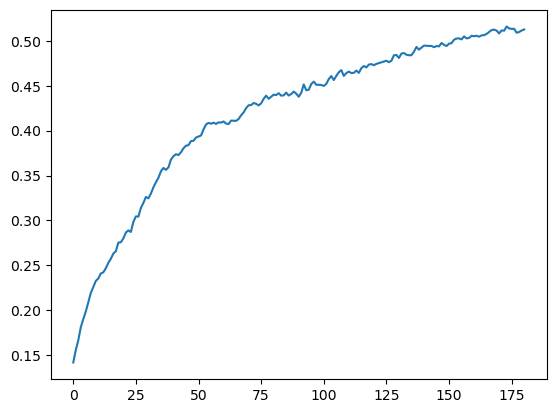

validation accuracy: 0.5128
generation 1802  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.535
generation 1803  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.501
generation 1804  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.524
generation 1805  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.525
generation 1806  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.507
generation 1807  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.538
generation 1808  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.54
generation 1809  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.521
generation 1810  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.51
generation 1811  test set: 9 evaluating performances||||

generation 1877  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.519
generation 1878  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.509
generation 1879  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.509
generation 1880  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.511
generation 1881  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.568
average best of last 100 generations 0.53241
evaluating performances| done! generation 1882  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.499
generation 1883  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.519
generation 1884  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.551
generation 1885  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.541
genera

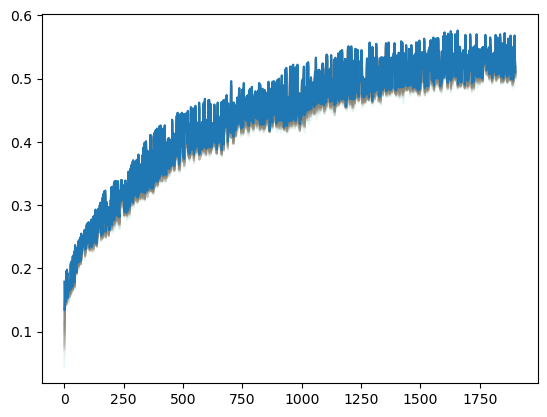

average best of last 100 generations 0.53015


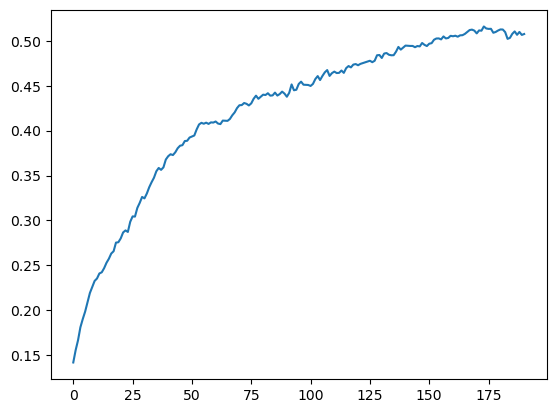

validation accuracy: 0.5077
generation 1902  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.514
generation 1903  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.496
generation 1904  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.574
generation 1905  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.545
generation 1906  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.525
generation 1907  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.5
generation 1908  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.514
generation 1909  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.542
generation 1910  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.526
generation 1911  test set: 1 evaluating performances||||

generation 1977  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.503
generation 1978  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.57
generation 1979  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.523
generation 1980  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.514
generation 1981  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.502
average best of last 100 generations 0.5310900000000002
evaluating performances| done! generation 1982  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.526
generation 1983  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.568
generation 1984  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.529
generation 1985  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

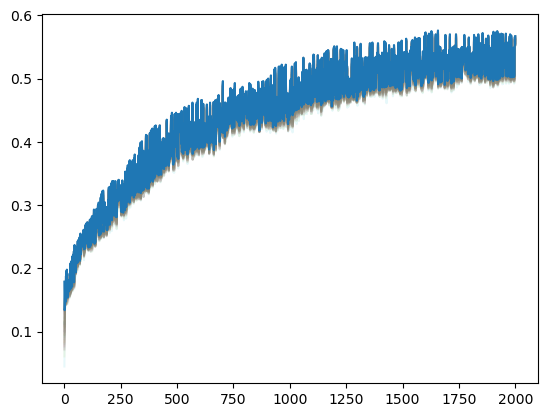

average best of last 100 generations 0.5330000000000004


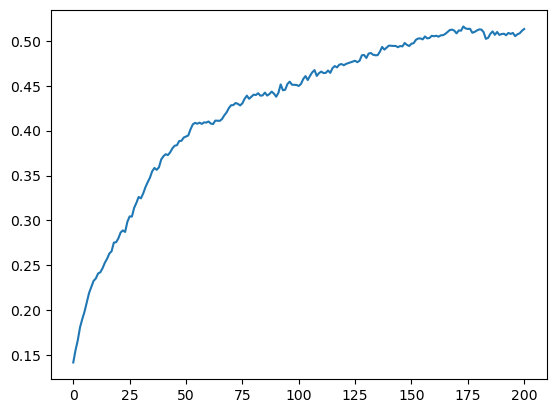

validation accuracy: 0.5133
generation 2002  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.548
generation 2003  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.499
generation 2004  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.55
generation 2005  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.551
generation 2006  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.505
generation 2007  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.534
generation 2008  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.497
generation 2009  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.555
generation 2010  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.543
generation 2011  test set: 0 evaluating performances|||

generation 2077  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.516
generation 2078  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.573
generation 2079  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.529
generation 2080  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.517
generation 2081  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.575
average best of last 100 generations 0.5346900000000004
evaluating performances| done! generation 2082  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.5
generation 2083  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.518
generation 2084  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.529
generation 2085  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.5

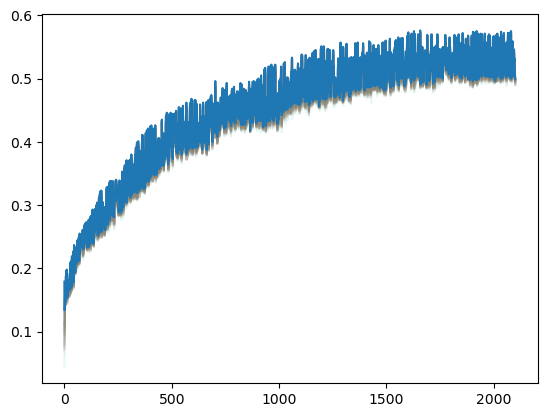

average best of last 100 generations 0.5328700000000004


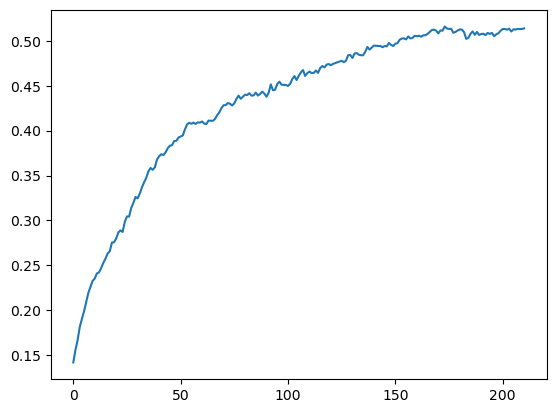

validation accuracy: 0.514
generation 2102  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.52
generation 2103  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.548
generation 2104  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.526
generation 2105  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.522
generation 2106  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.528
generation 2107  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.53
generation 2108  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.501
generation 2109  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.522
generation 2110  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.514
generation 2111  test set: 5 evaluating performances|||||

generation 2176  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.556
generation 2177  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.556
generation 2178  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.508
generation 2179  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.556
generation 2180  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.53
generation 2181  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.512
average best of last 100 generations 0.53064
evaluating performances| done! generation 2182  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.533
generation 2183  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.536
generation 2184  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.572
generat

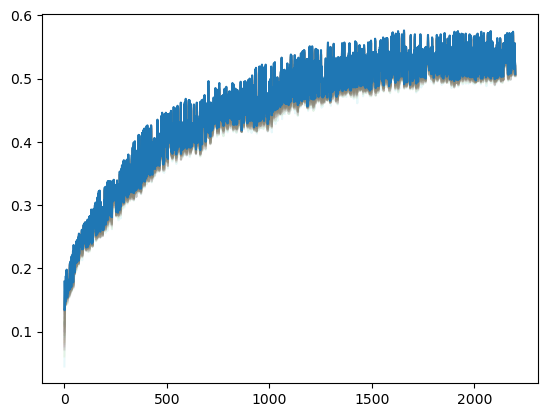

average best of last 100 generations 0.5328999999999998


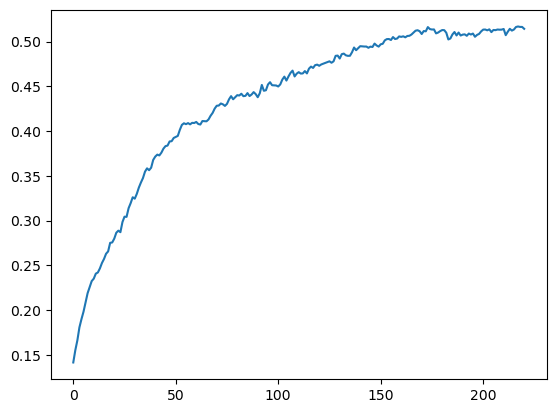

validation accuracy: 0.5142
generation 2202  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.573
generation 2203  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.529
generation 2204  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.556
generation 2205  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.509
generation 2206  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.548
generation 2207  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.524
generation 2208  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.526
generation 2209  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.534
generation 2210  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.538
generation 2211  test set: 2 evaluating performances||

generation 2276  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.573
generation 2277  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.554
generation 2278  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.562
generation 2279  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.503
generation 2280  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.573
generation 2281  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.531
average best of last 100 generations 0.5378599999999999
evaluating performances| done! generation 2282  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.574
generation 2283  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.576
generation 2284  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

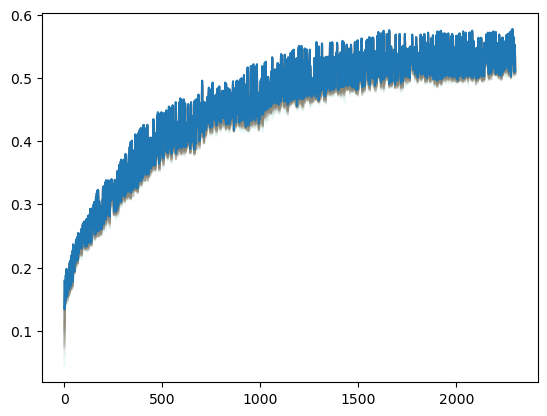

average best of last 100 generations 0.53916


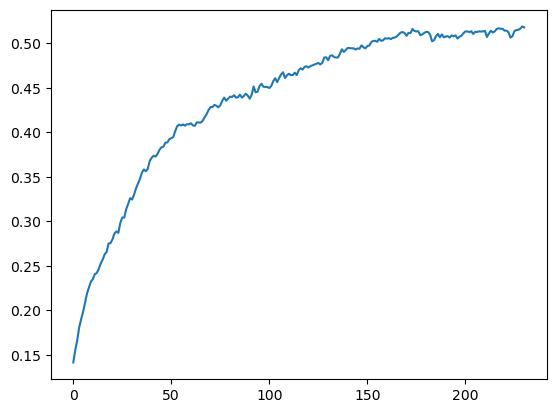

validation accuracy: 0.5179
generation 2302  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.547
generation 2303  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.514
generation 2304  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.549
generation 2305  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.537
generation 2306  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.515
generation 2307  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.573
generation 2308  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.575
generation 2309  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.514
generation 2310  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.536
generation 2311  test set: 8 evaluating performances||

generation 2376  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.527
generation 2377  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.552
generation 2378  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.573
generation 2379  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.533
generation 2380  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.514
generation 2381  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.552
average best of last 100 generations 0.54018
evaluating performances| done! generation 2382  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.513
generation 2383  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.563
generation 2384  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.514
genera

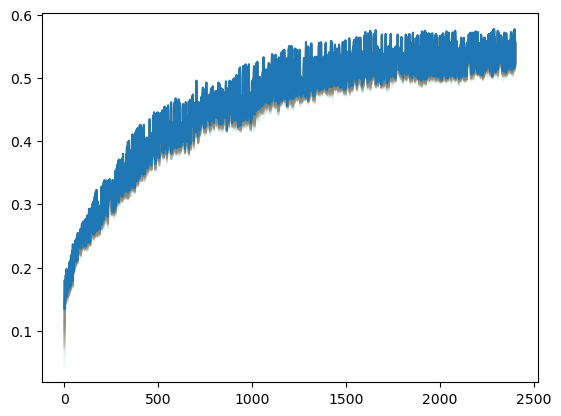

average best of last 100 generations 0.53995


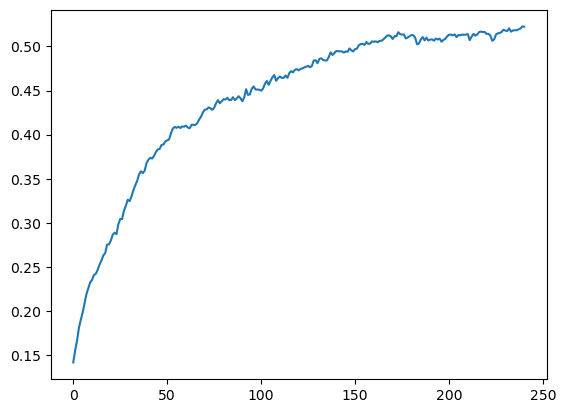

validation accuracy: 0.5224
generation 2402  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.514
generation 2403  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.538
generation 2404  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.514
generation 2405  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.537
generation 2406  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.555
generation 2407  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.558
generation 2408  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.538
generation 2409  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.538
generation 2410  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.512
generation 2411  test set: 9 evaluating performances||

generation 2477  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.541
generation 2478  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.568
generation 2479  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.541
generation 2480  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.524
generation 2481  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.556
average best of last 100 generations 0.5417799999999999
evaluating performances| done! generation 2482  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.532
generation 2483  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.528
generation 2484  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.526
generation 2485  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

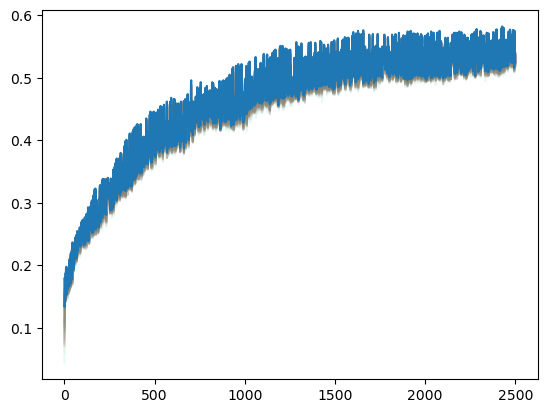

average best of last 100 generations 0.5418400000000001


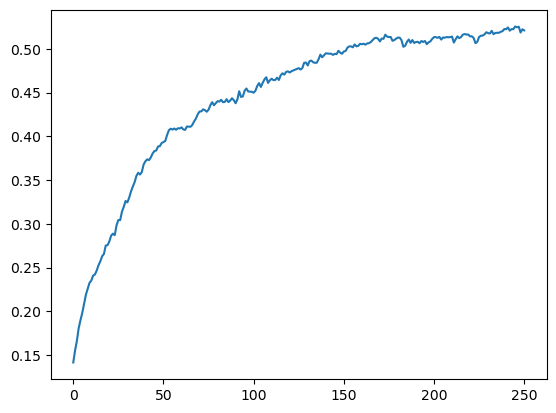

validation accuracy: 0.521
generation 2502  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.563
generation 2503  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.575
generation 2504  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.535
generation 2505  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.539
generation 2506  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.548
generation 2507  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.522
generation 2508  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.526
generation 2509  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.551
generation 2510  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.522
generation 2511  test set: 5 evaluating performances|||

generation 2577  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.591
generation 2578  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.535
generation 2579  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.582
generation 2580  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.594
generation 2581  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.599
average best of last 100 generations 0.5588500000000001
evaluating performances| done! generation 2582  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.588
generation 2583  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.561
generation 2584  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.593
generation 2585  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

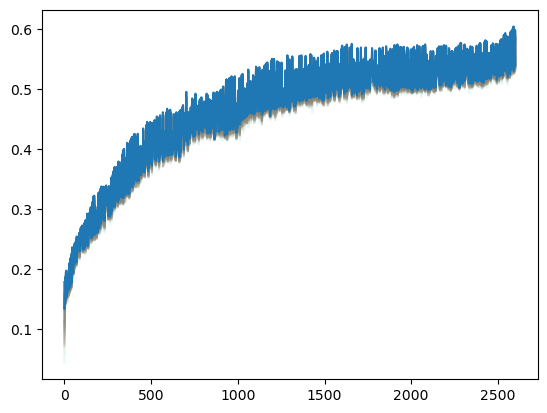

average best of last 100 generations 0.5649099999999998


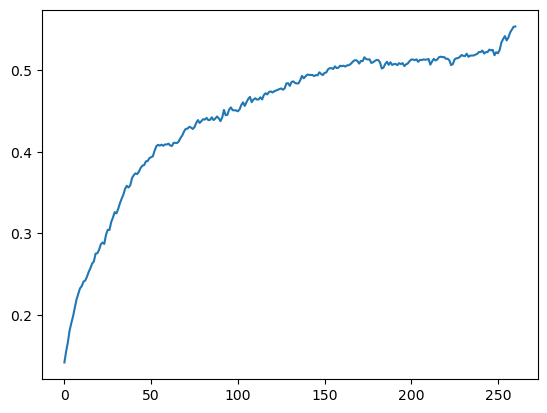

validation accuracy: 0.5539
generation 2602  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.598
generation 2603  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.539
generation 2604  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.574
generation 2605  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.561
generation 2606  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.605
generation 2607  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.602
generation 2608  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.597
generation 2609  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.558
generation 2610  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.558
generation 2611  test set: 2 evaluating performances||

generation 2677  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.562
generation 2678  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.607
generation 2679  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.569
generation 2680  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.544
generation 2681  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.547
average best of last 100 generations 0.5788499999999999
evaluating performances| done! generation 2682  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.616
generation 2683  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.606
generation 2684  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.566
generation 2685  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

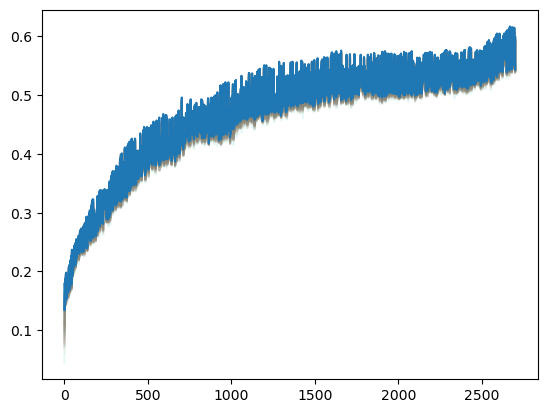

average best of last 100 generations 0.5819199999999998


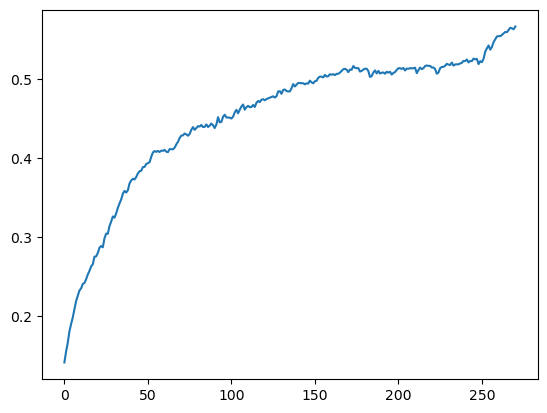

validation accuracy: 0.5661
generation 2702  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.6
generation 2703  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.606
generation 2704  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.568
generation 2705  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.621
generation 2706  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.57
generation 2707  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.553
generation 2708  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.539
generation 2709  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.597
generation 2710  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.598
generation 2711  test set: 3 evaluating performances|||||

generation 2776  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.601
generation 2777  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.575
generation 2778  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.614
generation 2779  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.602
generation 2780  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.602
generation 2781  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.604
average best of last 100 generations 0.5838399999999999
evaluating performances| done! generation 2782  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.622
generation 2783  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.558
generation 2784  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

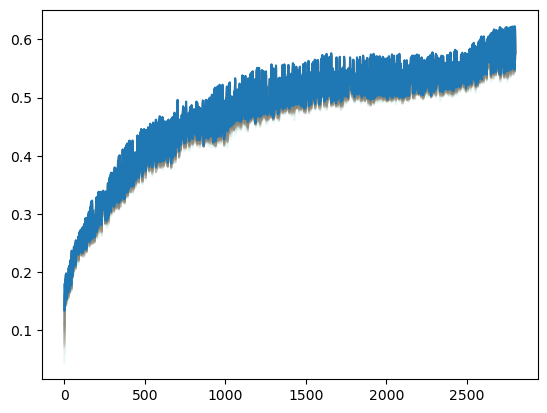

average best of last 100 generations 0.58429


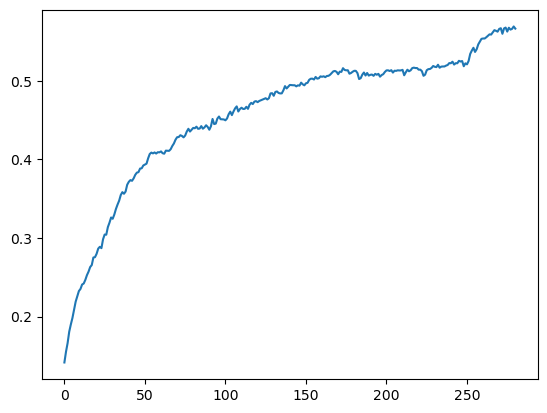

validation accuracy: 0.5665
generation 2802  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.613
generation 2803  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.554
generation 2804  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.554
generation 2805  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.601
generation 2806  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.618
generation 2807  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.624
generation 2808  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.607
generation 2809  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.6
generation 2810  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.618
generation 2811  test set: 4 evaluating performances||||

generation 2876  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.603
generation 2877  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.587
generation 2878  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.578
generation 2879  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.588
generation 2880  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.621
generation 2881  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.547
average best of last 100 generations 0.5898300000000001
evaluating performances| done! generation 2882  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.561
generation 2883  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.548
generation 2884  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

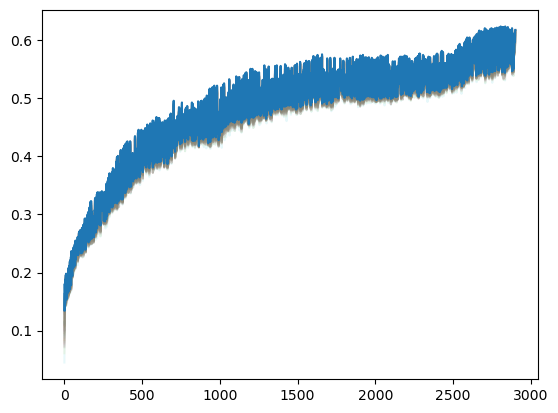

average best of last 100 generations 0.58979


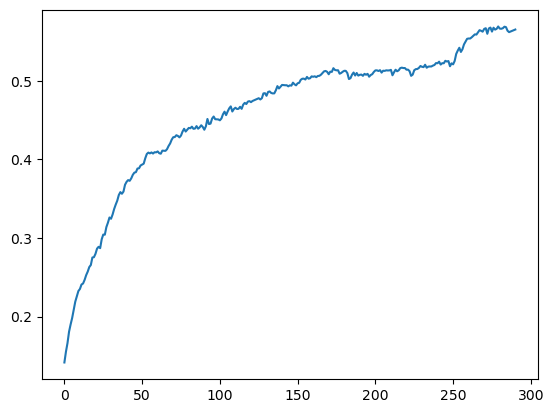

validation accuracy: 0.5653
generation 2902  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.561
generation 2903  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.596
generation 2904  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.56
generation 2905  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.603
generation 2906  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.6
generation 2907  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.601
generation 2908  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.603
generation 2909  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.616
generation 2910  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.553
generation 2911  test set: 1 evaluating performances|||||

generation 2976  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.612
generation 2977  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.604
generation 2978  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.611
generation 2979  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.61
generation 2980  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.569
generation 2981  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.608
average best of last 100 generations 0.5884400000000002
evaluating performances| done! generation 2982  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.557
generation 2983  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.614
generation 2984  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

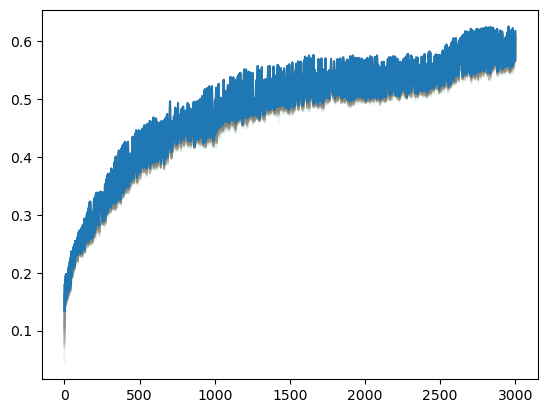

average best of last 100 generations 0.5887399999999998


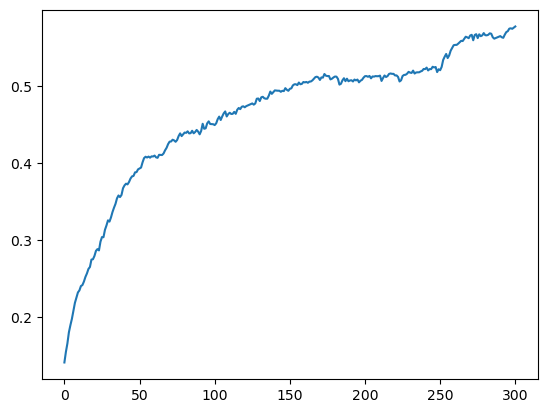

validation accuracy: 0.5778
generation 3002  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.618
generation 3003  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.568
generation 3004  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.622
generation 3005  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.606
generation 3006  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.561
generation 3007  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.619
generation 3008  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.615
generation 3009  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.612
generation 3010  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.627
generation 3011  test set: 2 evaluating performances||

generation 3077  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.624
generation 3078  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.627
generation 3079  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.562
generation 3080  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.624
generation 3081  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.598
average best of last 100 generations 0.6013000000000002
evaluating performances| done! generation 3082  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.563
generation 3083  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.624
generation 3084  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.625
generation 3085  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

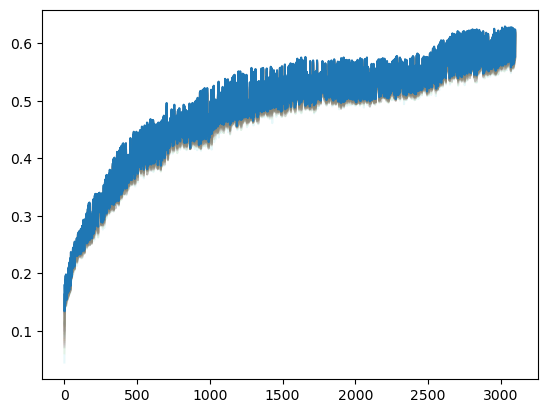

average best of last 100 generations 0.6025


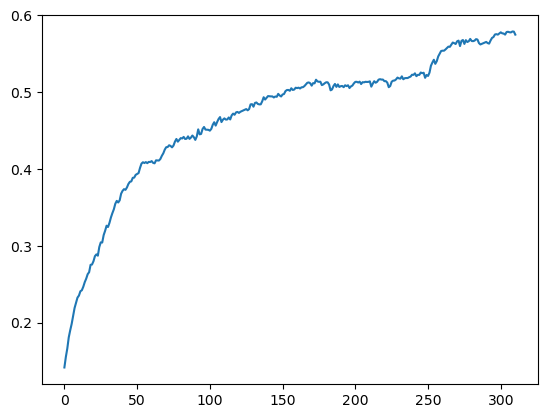

validation accuracy: 0.5748
generation 3102  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.622
generation 3103  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.585
generation 3104  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.616
generation 3105  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.568
generation 3106  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.586
generation 3107  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.625
generation 3108  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.578
generation 3109  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.613
generation 3110  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.569
generation 3111  test set: 5 evaluating performances||

generation 3176  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.617
generation 3177  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.613
generation 3178  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.586
generation 3179  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.605
generation 3180  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.617
generation 3181  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.634
average best of last 100 generations 0.6044099999999998
evaluating performances| done! generation 3182  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.632
generation 3183  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.584
generation 3184  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

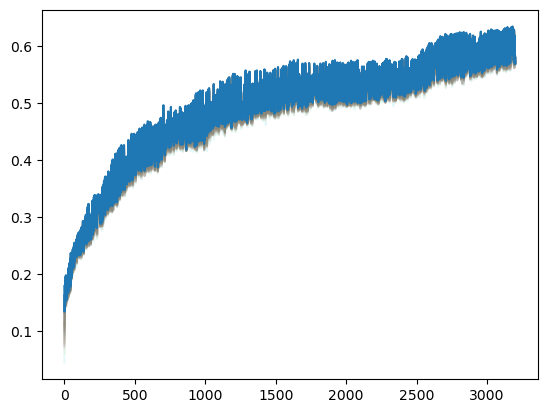

average best of last 100 generations 0.6038599999999998


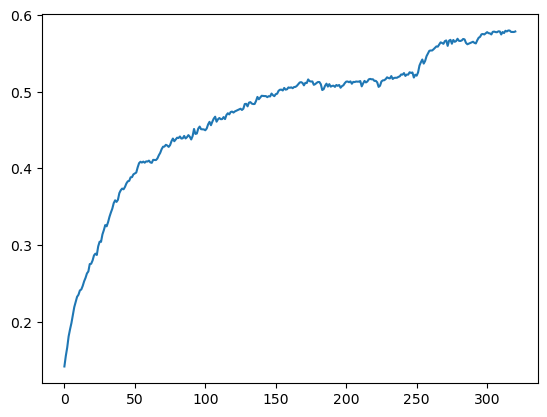

validation accuracy: 0.5787
generation 3202  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.586
generation 3203  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.619
generation 3204  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.625
generation 3205  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.624
generation 3206  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.615
generation 3207  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.572
generation 3208  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.614
generation 3209  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.627
generation 3210  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.588
generation 3211  test set: 7 evaluating performances||

generation 3277  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.564
generation 3278  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.588
generation 3279  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.631
generation 3280  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.618
generation 3281  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.589
average best of last 100 generations 0.5999899999999999
evaluating performances| done! generation 3282  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.635
generation 3283  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.625
generation 3284  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.634
generation 3285  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

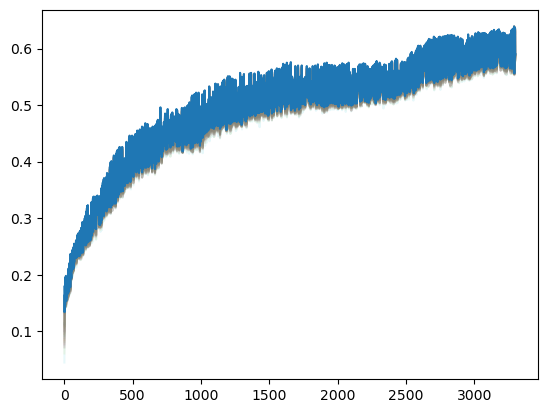

average best of last 100 generations 0.6032799999999999


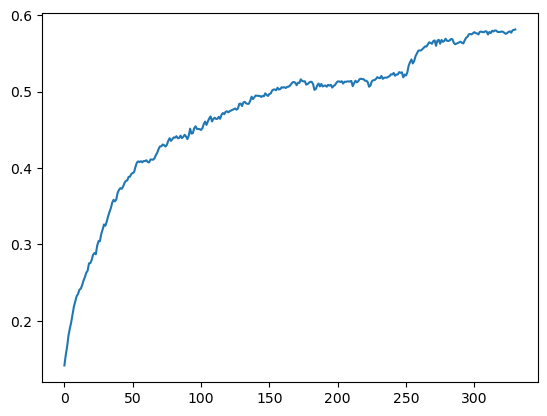

validation accuracy: 0.5813
generation 3302  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.62
generation 3303  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.568
generation 3304  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.569
generation 3305  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.571
generation 3306  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.626
generation 3307  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.617
generation 3308  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.572
generation 3309  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.57
generation 3310  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.608
generation 3311  test set: 5 evaluating performances||||

generation 3377  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.626
generation 3378  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.636
generation 3379  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.626
generation 3380  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.638
generation 3381  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.567
average best of last 100 generations 0.6082500000000001
evaluating performances| done! generation 3382  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.629
generation 3383  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.566
generation 3384  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.636
generation 3385  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

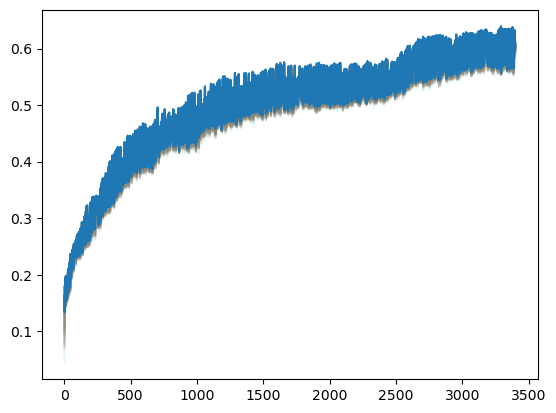

average best of last 100 generations 0.6067300000000001


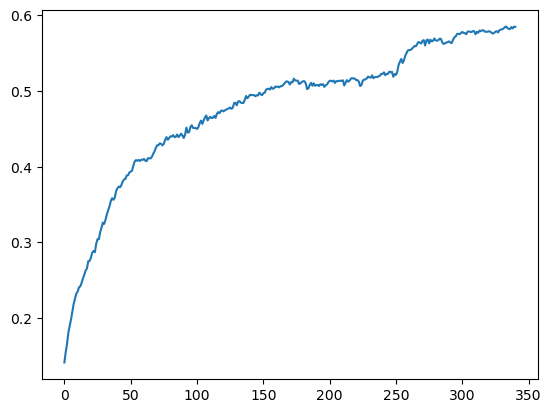

validation accuracy: 0.5845
generation 3402  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.564
generation 3403  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.618
generation 3404  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.597
generation 3405  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.571
generation 3406  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.606
generation 3407  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.629
generation 3408  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.607
generation 3409  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.625
generation 3410  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.602
generation 3411  test set: 2 evaluating performances||

generation 3477  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.593
generation 3478  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.622
generation 3479  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.634
generation 3480  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.558
generation 3481  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.586
average best of last 100 generations 0.6083899999999999
evaluating performances| done! generation 3482  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.577
generation 3483  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.633
generation 3484  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.576
generation 3485  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

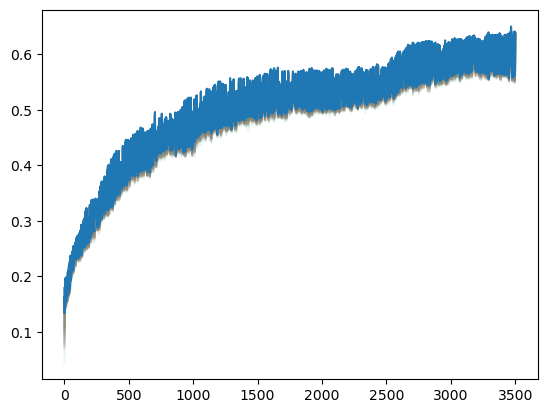

average best of last 100 generations 0.6085899999999999


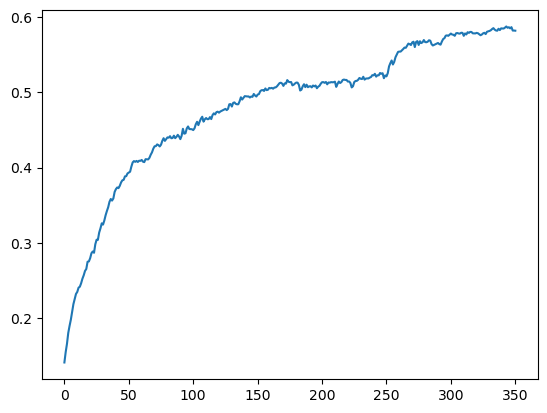

validation accuracy: 0.5816
generation 3502  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.634
generation 3503  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.562
generation 3504  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.604
generation 3505  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.642
generation 3506  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.635
generation 3507  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.619
generation 3508  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.623
generation 3509  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.624
generation 3510  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.623
generation 3511  test set: 4 evaluating performances||

generation 3577  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.565
generation 3578  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
generation 3579  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.618
generation 3580  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.58
generation 3581  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.58
average best of last 100 generations 0.6111000000000001
evaluating performances| done! generation 3582  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.567
generation 3583  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.569
generation 3584  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.624
generation 3585  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.5

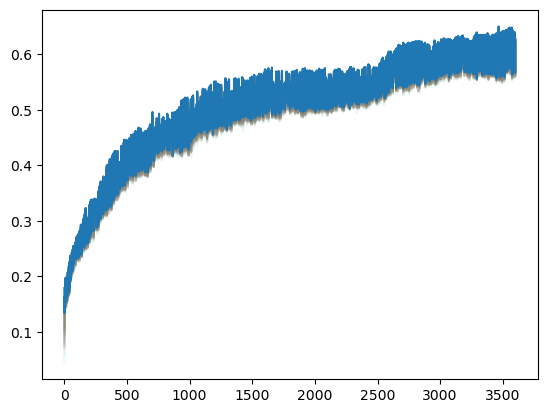

average best of last 100 generations 0.6103700000000001


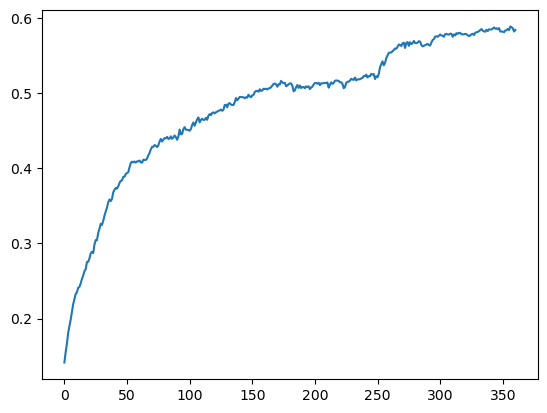

validation accuracy: 0.5839
generation 3602  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.631
generation 3603  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.594
generation 3604  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.594
generation 3605  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.575
generation 3606  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.627
generation 3607  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.601
generation 3608  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.635
generation 3609  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.613
generation 3610  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.635
generation 3611  test set: 6 evaluating performances||

generation 3677  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.578
generation 3678  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.623
generation 3679  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.6
generation 3680  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.641
generation 3681  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.623
average best of last 100 generations 0.6099600000000001
evaluating performances| done! generation 3682  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.568
generation 3683  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
generation 3684  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.62
generation 3685  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.58

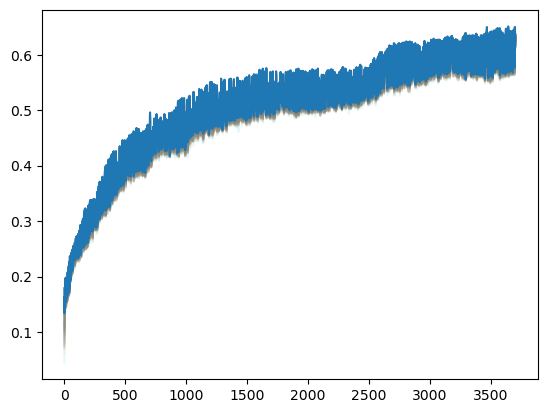

average best of last 100 generations 0.61301


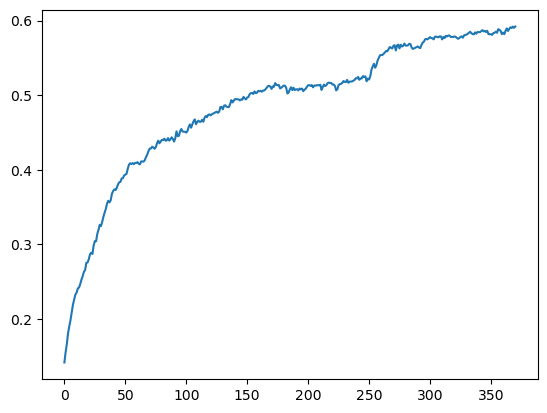

validation accuracy: 0.5921
generation 3702  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.573
generation 3703  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.64
generation 3704  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.621
generation 3705  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.597
generation 3706  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.625
generation 3707  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.626
generation 3708  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.572
generation 3709  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
generation 3710  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.624
generation 3711  test set: 3 evaluating performances|||

generation 3777  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.602
generation 3778  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.624
generation 3779  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.605
generation 3780  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.662
generation 3781  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.601
average best of last 100 generations 0.6248799999999999
evaluating performances| done! generation 3782  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.664
generation 3783  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.665
generation 3784  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.668
generation 3785  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

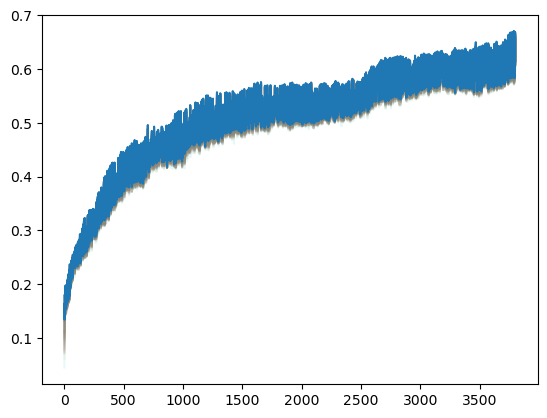

average best of last 100 generations 0.6285999999999998


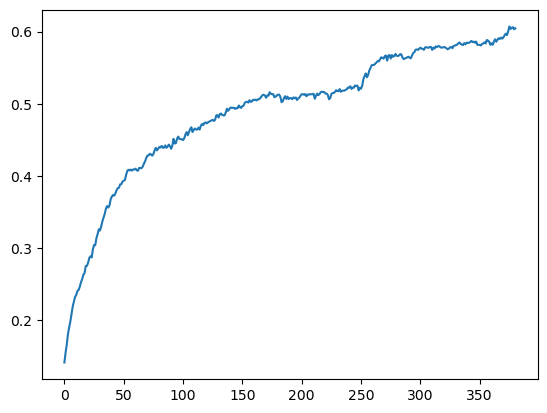

validation accuracy: 0.6047
generation 3802  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.667
generation 3803  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.669
generation 3804  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.639
generation 3805  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.668
generation 3806  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.671
generation 3807  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.614
generation 3808  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.586
generation 3809  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.67
generation 3810  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
generation 3811  test set: 8 evaluating performances|||

generation 3877  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.676
generation 3878  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.592
generation 3879  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.64
generation 3880  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.641
generation 3881  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.669
average best of last 100 generations 0.6402
evaluating performances| done! generation 3882  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.669
generation 3883  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.621
generation 3884  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.595
generation 3885  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.596
generati

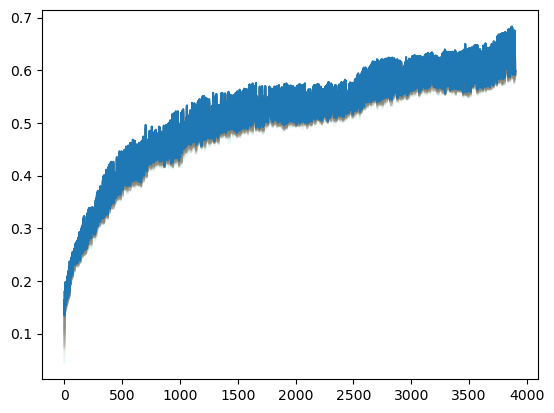

average best of last 100 generations 0.6383799999999998


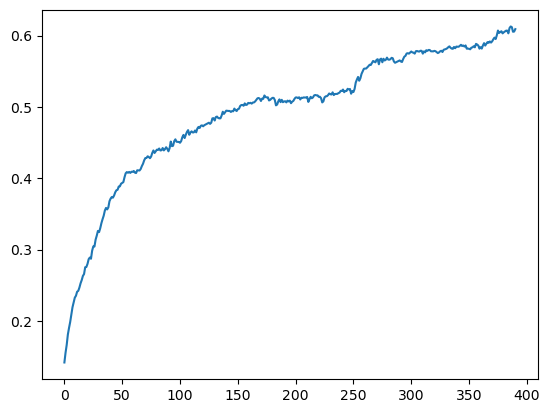

validation accuracy: 0.6092
generation 3902  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.675
generation 3903  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.681
generation 3904  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.592
generation 3905  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.602
generation 3906  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.682
generation 3907  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.674
generation 3908  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.599
generation 3909  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.681
generation 3910  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.607
generation 3911  test set: 8 evaluating performances||

generation 3977  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.633
generation 3978  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.671
generation 3979  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.6
generation 3980  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.587
generation 3981  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.601
average best of last 100 generations 0.6416400000000003
evaluating performances| done! generation 3982  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.686
generation 3983  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.59
generation 3984  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.688
generation 3985  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.60

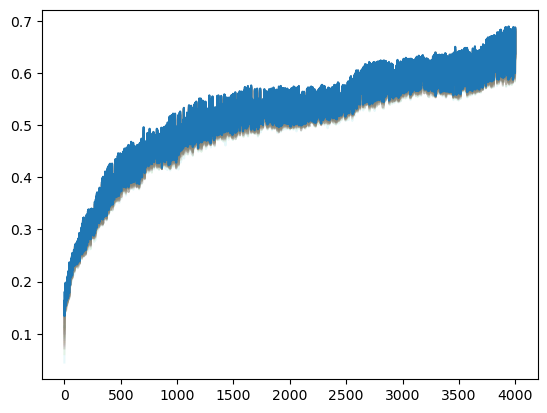

average best of last 100 generations 0.6454600000000003


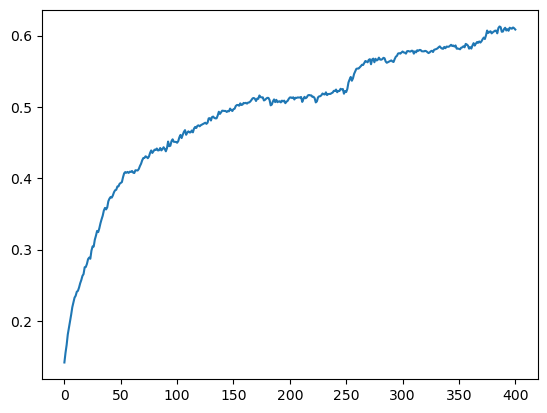

validation accuracy: 0.6086
generation 4002  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.593
generation 4003  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.594
generation 4004  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.633
generation 4005  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.688
generation 4006  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.632
generation 4007  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.673
generation 4008  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.641
generation 4009  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.679
generation 4010  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.592
generation 4011  test set: 9 evaluating performances||

generation 4077  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.602
generation 4078  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.604
generation 4079  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.692
generation 4080  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.63
generation 4081  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.631
average best of last 100 generations 0.6446299999999997
evaluating performances| done! generation 4082  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.633
generation 4083  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.69
generation 4084  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.636
generation 4085  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.5

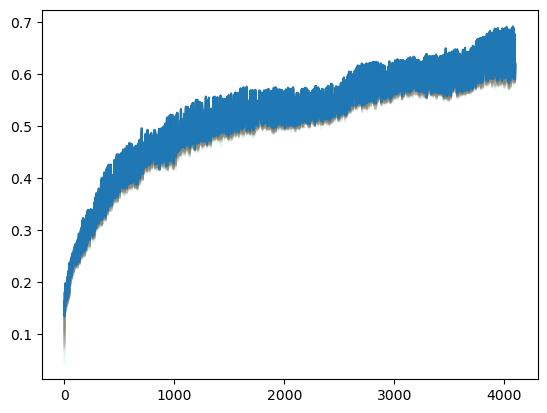

average best of last 100 generations 0.6412699999999998


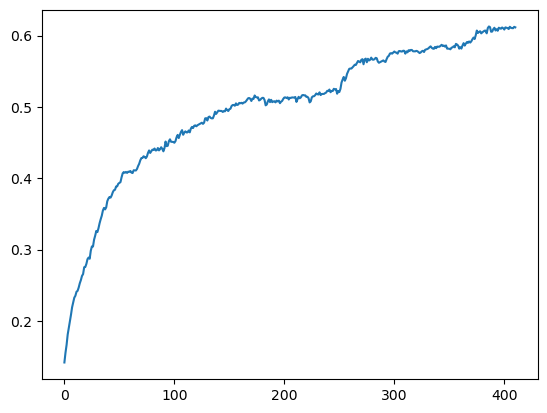

validation accuracy: 0.6117
generation 4102  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.641
generation 4103  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.641
generation 4104  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.678
generation 4105  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.603
generation 4106  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.687
generation 4107  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.622
generation 4108  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.672
generation 4109  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.673
generation 4110  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.674
generation 4111  test set: 1 evaluating performances||

generation 4177  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.578
generation 4178  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.6
generation 4179  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.692
generation 4180  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.639
generation 4181  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.63
average best of last 100 generations 0.6438900000000001
evaluating performances| done! generation 4182  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.685
generation 4183  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.692
generation 4184  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.579
generation 4185  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.68

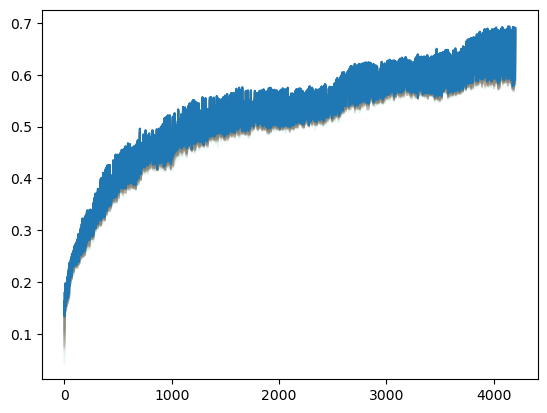

average best of last 100 generations 0.6479400000000001


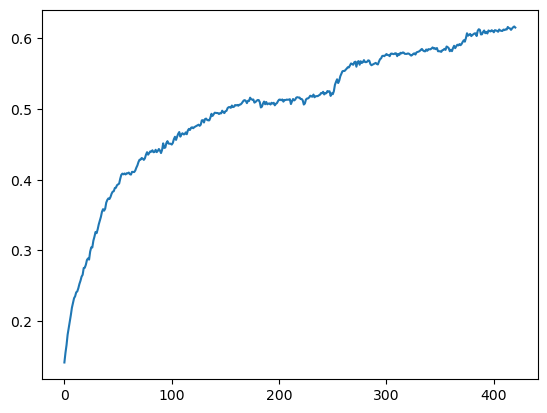

validation accuracy: 0.6153
generation 4202  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
generation 4203  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.601
generation 4204  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.687
generation 4205  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.61
generation 4206  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.613
generation 4207  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.624
generation 4208  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.645
generation 4209  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.685
generation 4210  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 4211  test set: 5 evaluating performances|||

generation 4277  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.594
generation 4278  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.595
generation 4279  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.596
generation 4280  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.642
generation 4281  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.678
average best of last 100 generations 0.63945
evaluating performances| done! generation 4282  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.598
generation 4283  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.688
generation 4284  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.628
generation 4285  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.601
genera

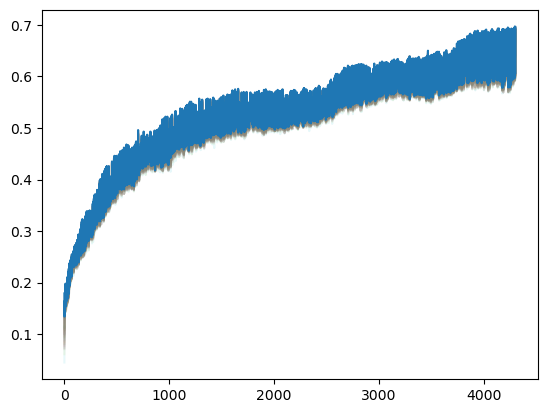

average best of last 100 generations 0.6391300000000001


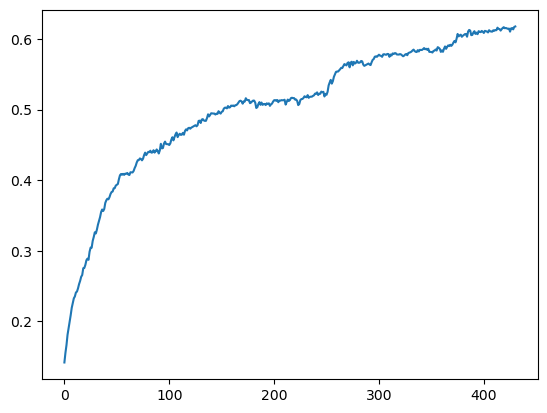

validation accuracy: 0.6178
generation 4302  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.596
generation 4303  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.689
generation 4304  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.698
generation 4305  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.63
generation 4306  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.62
generation 4307  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.603
generation 4308  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.691
generation 4309  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.697
generation 4310  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.633
generation 4311  test set: 3 evaluating performances||||

generation 4377  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.7
generation 4378  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.691
generation 4379  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.631
generation 4380  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.692
generation 4381  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.605
average best of last 100 generations 0.65584
evaluating performances| done! generation 4382  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.7
generation 4383  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.636
generation 4384  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.701
generation 4385  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.618
generation

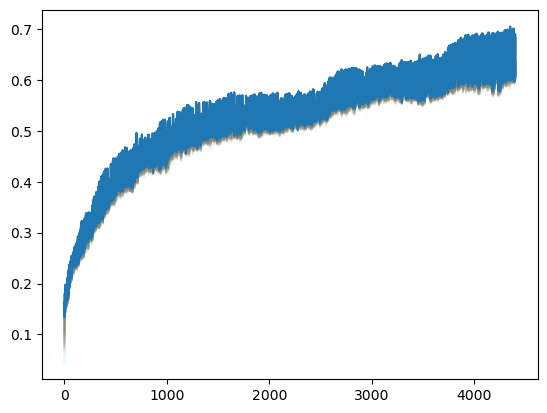

average best of last 100 generations 0.6558800000000002


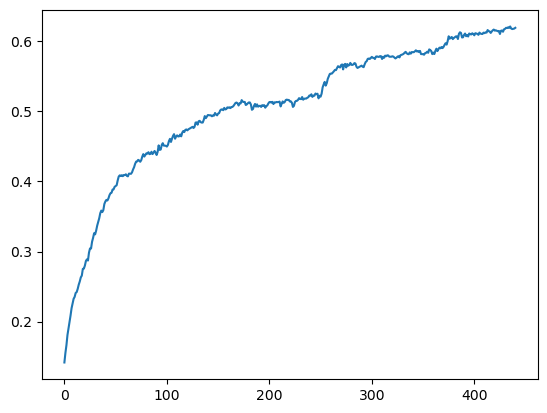

validation accuracy: 0.6193
generation 4402  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.638
generation 4403  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 4404  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.7
generation 4405  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.631
generation 4406  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.691
generation 4407  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.694
generation 4408  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.7
generation 4409  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.648
generation 4410  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.695
generation 4411  test set: 1 evaluating performances||||||

generation 4476  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.641
generation 4477  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.642
generation 4478  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.642
generation 4479  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.615
generation 4480  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.642
generation 4481  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.69
average best of last 100 generations 0.6484300000000002
evaluating performances| done! generation 4482  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.625
generation 4483  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.641
generation 4484  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

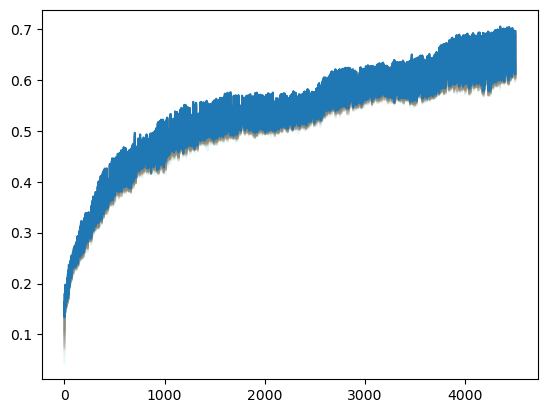

average best of last 100 generations 0.6491700000000001


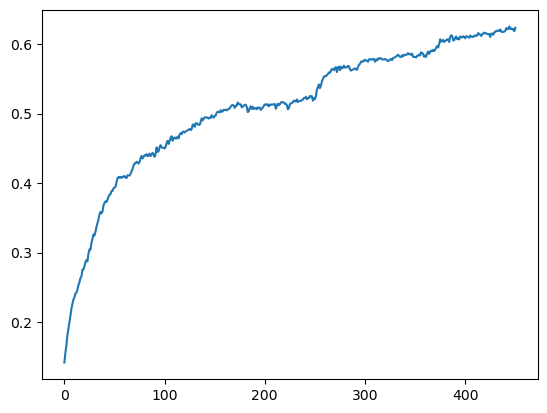

validation accuracy: 0.6237
generation 4502  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.616
generation 4503  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.682
generation 4504  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.623
generation 4505  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.688
generation 4506  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.619
generation 4507  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.686
generation 4508  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.635
generation 4509  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.695
generation 4510  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.691
generation 4511  test set: 6 evaluating performances||

generation 4577  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.615
generation 4578  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.694
generation 4579  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.625
generation 4580  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.615
generation 4581  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.697
average best of last 100 generations 0.65263
evaluating performances| done! generation 4582  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.618
generation 4583  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.614
generation 4584  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.688
generation 4585  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.63
generat

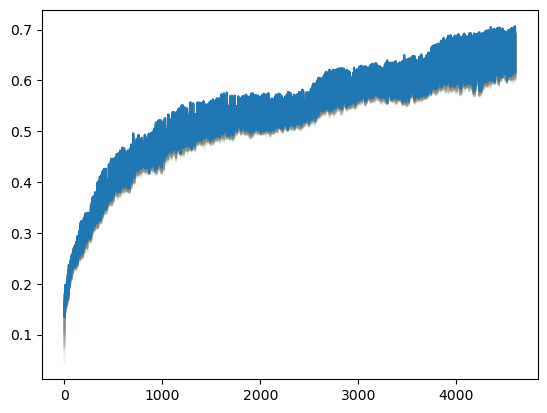

average best of last 100 generations 0.6529700000000002


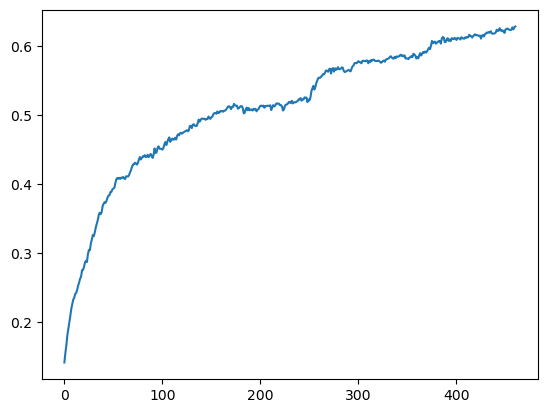

validation accuracy: 0.6281
generation 4602  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.636
generation 4603  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.615
generation 4604  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.624
generation 4605  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.625
generation 4606  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.649
generation 4607  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 4608  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.707
generation 4609  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.687
generation 4610  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.626
generation 4611  test set: 2 evaluating performances||

generation 4677  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.7
generation 4678  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.715
generation 4679  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.702
generation 4680  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.627
generation 4681  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.636
average best of last 100 generations 0.6609300000000004
evaluating performances| done! generation 4682  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.632
generation 4683  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.695
generation 4684  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.627
generation 4685  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.6

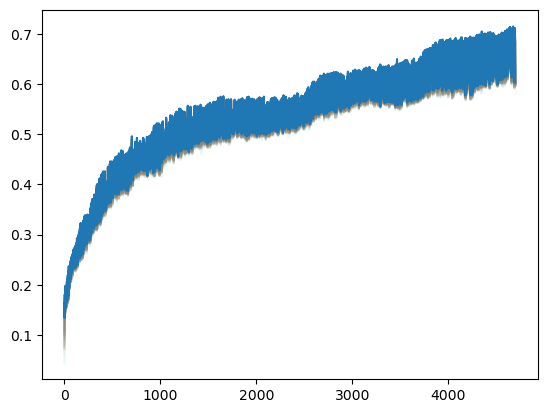

average best of last 100 generations 0.6628600000000004


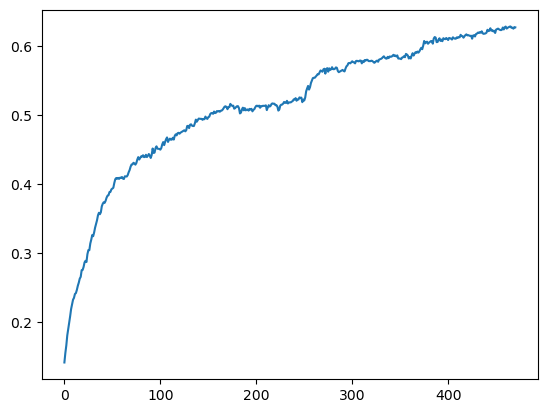

validation accuracy: 0.6269
generation 4702  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.632
generation 4703  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.698
generation 4704  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.708
generation 4705  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.623
generation 4706  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.609
generation 4707  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.634
generation 4708  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.648
generation 4709  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.626
generation 4710  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.606
generation 4711  test set: 6 evaluating performances||

generation 4777  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.609
generation 4778  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.611
generation 4779  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.635
generation 4780  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.622
generation 4781  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.647
average best of last 100 generations 0.6578500000000002
evaluating performances| done! generation 4782  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.692
generation 4783  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.705
generation 4784  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.705
generation 4785  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

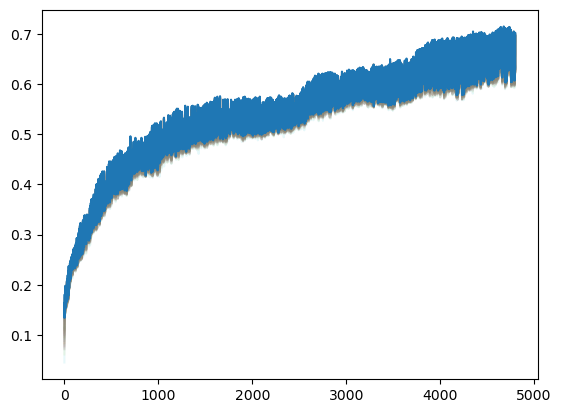

average best of last 100 generations 0.6569599999999999


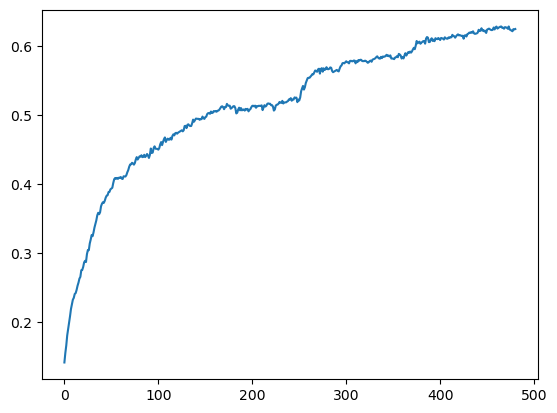

validation accuracy: 0.6245
generation 4802  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.648
generation 4803  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.619
generation 4804  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.689
generation 4805  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.652
generation 4806  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 4807  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.633
generation 4808  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 4809  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.631
generation 4810  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.633
generation 4811  test set: 9 evaluating performances||

generation 4877  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.713
generation 4878  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.631
generation 4879  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.619
generation 4880  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.635
generation 4881  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.612
average best of last 100 generations 0.6539100000000002
evaluating performances| done! generation 4882  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 4883  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.636
generation 4884  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.695
generation 4885  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

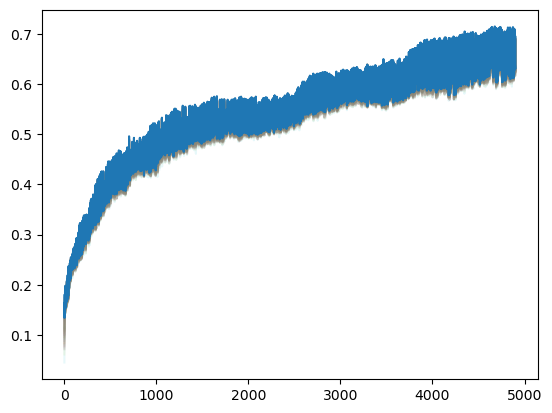

average best of last 100 generations 0.6551200000000003


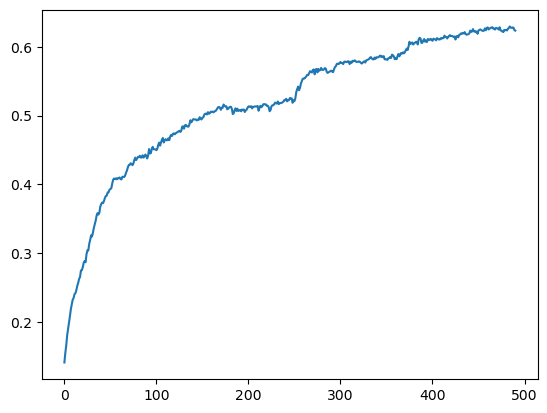

validation accuracy: 0.6234
generation 4902  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.697
generation 4903  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.609
generation 4904  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.63
generation 4905  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.649
generation 4906  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.707
generation 4907  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.629
generation 4908  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.65
generation 4909  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.71
generation 4910  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.608
generation 4911  test set: 2 evaluating performances|||||

generation 4976  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.634
generation 4977  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.641
generation 4978  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.697
generation 4979  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.626
generation 4980  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.634
generation 4981  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.613
average best of last 100 generations 0.6558300000000002
evaluating performances| done! generation 4982  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.698
generation 4983  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.691
generation 4984  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

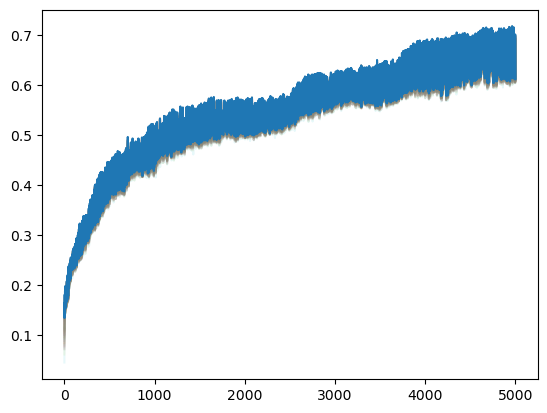

average best of last 100 generations 0.6562600000000002


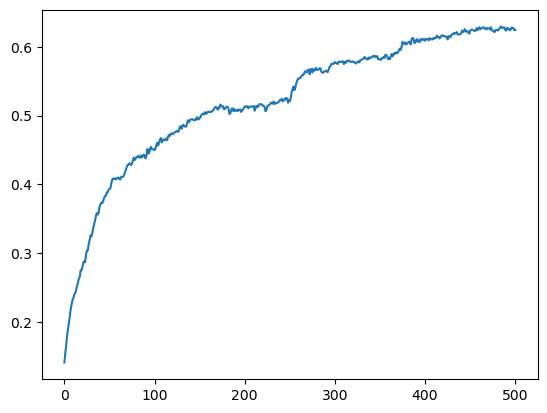

validation accuracy: 0.6242
generation 5002  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.649
generation 5003  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.698
generation 5004  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.624
generation 5005  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.613
generation 5006  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.701
generation 5007  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.701
generation 5008  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.694
generation 5009  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.612
generation 5010  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.701
generation 5011  test set: 2 evaluating performances||

generation 5077  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 5078  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 5079  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.7
generation 5080  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.696
generation 5081  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.634
average best of last 100 generations 0.65449
evaluating performances| done! generation 5082  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.637
generation 5083  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.618
generation 5084  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.712
generation 5085  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.61
generatio

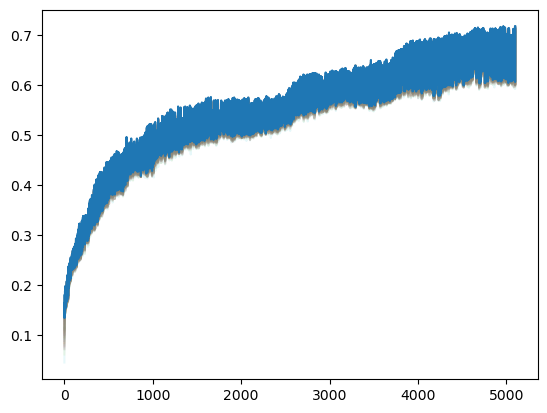

average best of last 100 generations 0.6524599999999998


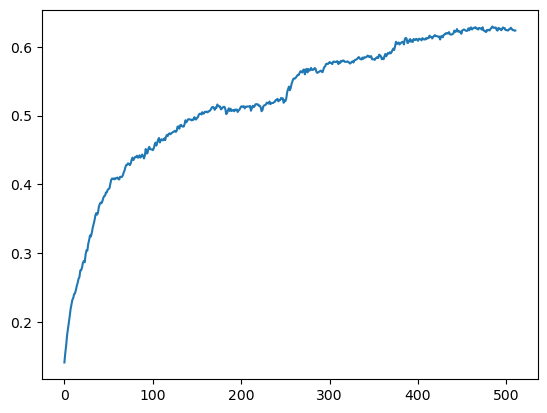

validation accuracy: 0.6235
generation 5102  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.717
generation 5103  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.609
generation 5104  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.639
generation 5105  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.687
generation 5106  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.697
generation 5107  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.617
generation 5108  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 5109  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.625
generation 5110  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.64
generation 5111  test set: 7 evaluating performances|||

generation 5177  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.694
generation 5178  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.617
generation 5179  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.693
generation 5180  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.64
generation 5181  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.62
average best of last 100 generations 0.6596800000000005
evaluating performances| done! generation 5182  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.613
generation 5183  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.694
generation 5184  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.69
generation 5185  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.62

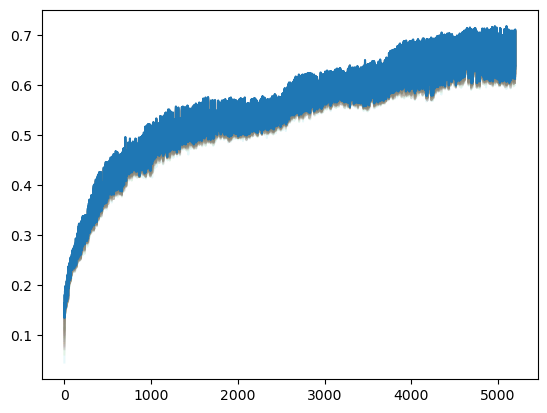

average best of last 100 generations 0.6594900000000001


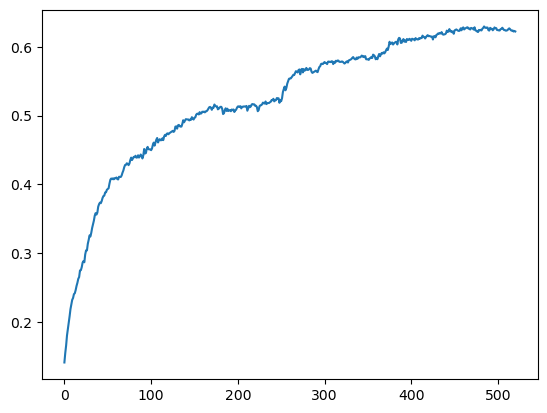

validation accuracy: 0.6222
generation 5202  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.694
generation 5203  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.627
generation 5204  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.712
generation 5205  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.694
generation 5206  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.63
generation 5207  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.714
generation 5208  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.638
generation 5209  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.632
generation 5210  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.639
generation 5211  test set: 6 evaluating performances|||

generation 5277  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.698
generation 5278  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.7
generation 5279  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.707
generation 5280  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.632
generation 5281  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.619
average best of last 100 generations 0.6539300000000003
evaluating performances| done! generation 5282  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.626
generation 5283  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.712
generation 5284  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.696
generation 5285  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.6

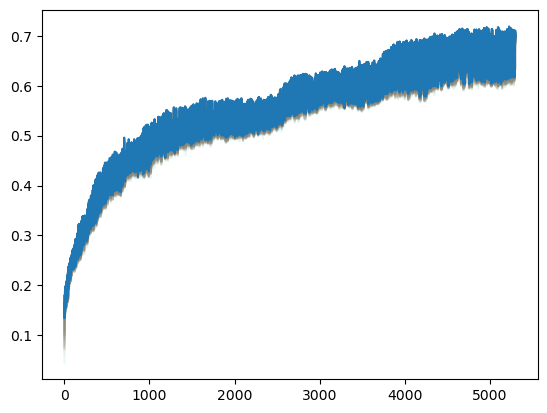

average best of last 100 generations 0.6560400000000002


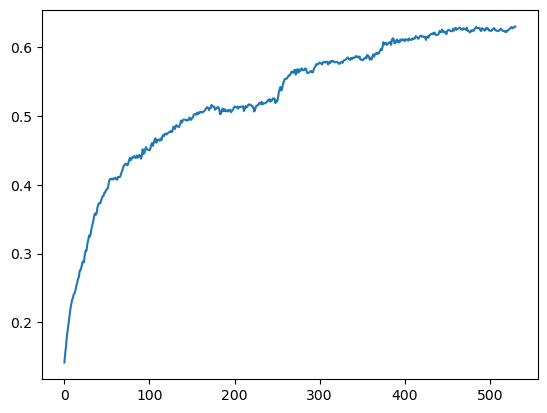

validation accuracy: 0.63
generation 5302  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.649
generation 5303  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.695
generation 5304  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.685
generation 5305  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.65
generation 5306  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.692
generation 5307  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.654
generation 5308  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.694
generation 5309  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.618
generation 5310  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.63
generation 5311  test set: 5 evaluating performances||||||

generation 5377  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.608
generation 5378  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.718
generation 5379  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.708
generation 5380  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.711
generation 5381  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.632
average best of last 100 generations 0.66498
evaluating performances| done! generation 5382  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
generation 5383  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.645
generation 5384  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.694
generation 5385  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.714
genera

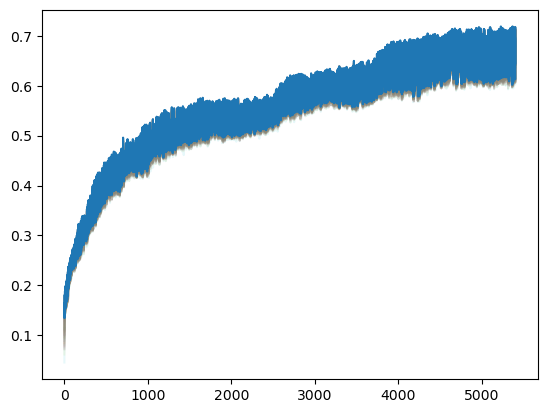

average best of last 100 generations 0.6669800000000002


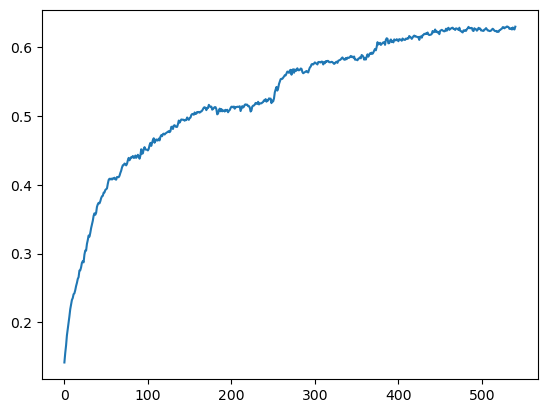

validation accuracy: 0.6297
generation 5402  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.707
generation 5403  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.697
generation 5404  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.654
generation 5405  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.654
generation 5406  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.633
generation 5407  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.616
generation 5408  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.633
generation 5409  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.617
generation 5410  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.629
generation 5411  test set: 6 evaluating performances||

generation 5477  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.621
generation 5478  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.624
generation 5479  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.653
generation 5480  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.631
generation 5481  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.708
average best of last 100 generations 0.66218
evaluating performances| done! generation 5482  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.693
generation 5483  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.638
generation 5484  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 5485  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.702
genera

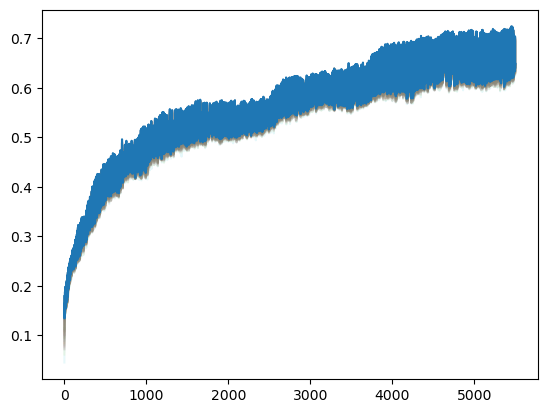

average best of last 100 generations 0.6591400000000003


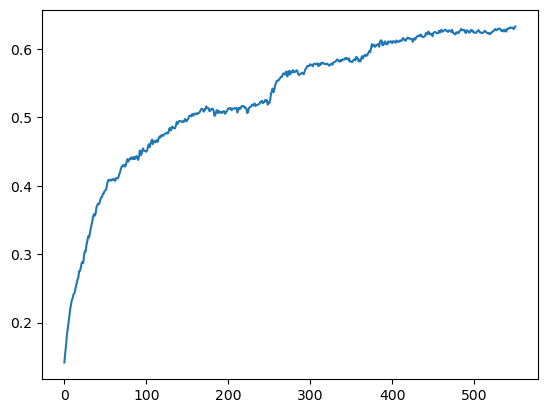

validation accuracy: 0.633
generation 5502  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.709
generation 5503  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.626
generation 5504  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.626
generation 5505  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.725
generation 5506  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.703
generation 5507  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.703
generation 5508  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.648
generation 5509  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.652
generation 5510  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.708
generation 5511  test set: 3 evaluating performances|||

generation 5577  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.658
generation 5578  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.66
generation 5579  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.639
generation 5580  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.701
generation 5581  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.718
average best of last 100 generations 0.67334
evaluating performances| done! generation 5582  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.658
generation 5583  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.653
generation 5584  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.649
generation 5585  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generat

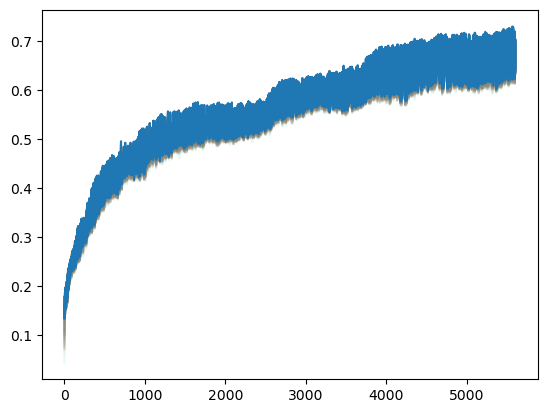

average best of last 100 generations 0.6755199999999999


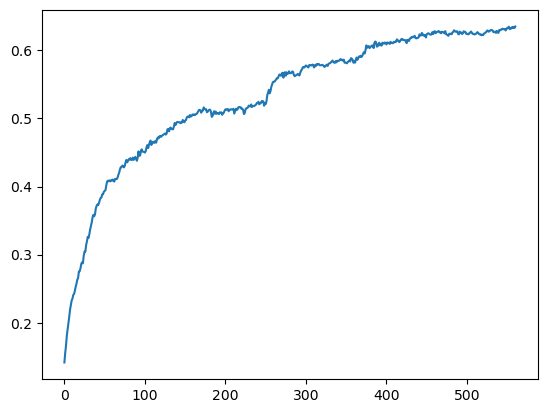

validation accuracy: 0.635
generation 5602  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.716
generation 5603  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 5604  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.645
generation 5605  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.656
generation 5606  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.634
generation 5607  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 5608  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.702
generation 5609  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.722
generation 5610  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.704
generation 5611  test set: 0 evaluating performances|||

generation 5677  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.713
generation 5678  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.715
generation 5679  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.71
generation 5680  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.616
generation 5681  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.712
average best of last 100 generations 0.67148
evaluating performances| done! generation 5682  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.697
generation 5683  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.635
generation 5684  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.628
generation 5685  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.636
generat

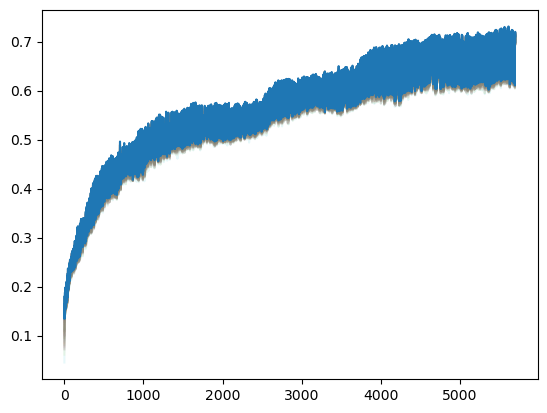

average best of last 100 generations 0.6719100000000001


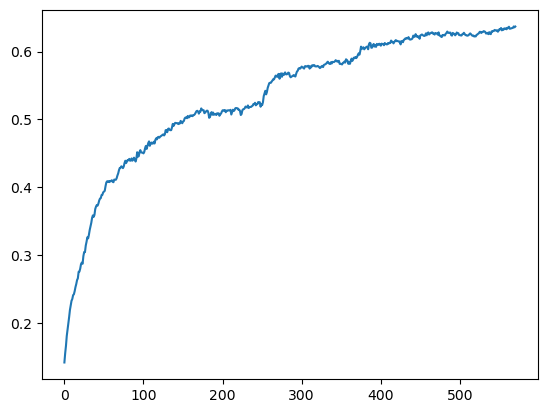

validation accuracy: 0.6368
generation 5702  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.654
generation 5703  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.724
generation 5704  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.637
generation 5705  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.619
generation 5706  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 5707  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.638
generation 5708  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 5709  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.638
generation 5710  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.618
generation 5711  test set: 3 evaluating performances||

generation 5777  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.632
generation 5778  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 5779  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.658
generation 5780  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.62
generation 5781  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.632
average best of last 100 generations 0.6661400000000002
evaluating performances| done! generation 5782  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.711
generation 5783  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.706
generation 5784  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.722
generation 5785  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

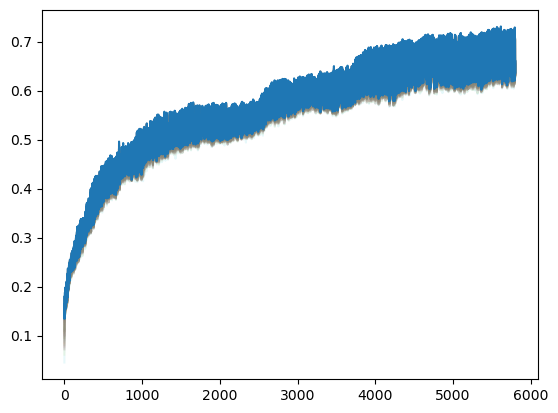

average best of last 100 generations 0.6680100000000004


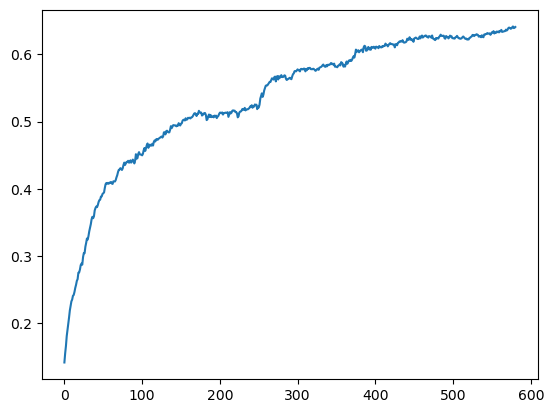

validation accuracy: 0.6408
generation 5802  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.711
generation 5803  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.62
generation 5804  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.711
generation 5805  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.648
generation 5806  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.712
generation 5807  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 5808  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.622
generation 5809  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.648
generation 5810  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.649
generation 5811  test set: 3 evaluating performances|||

generation 5877  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 5878  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.717
generation 5879  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.663
generation 5880  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.73
generation 5881  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.708
average best of last 100 generations 0.6730200000000002
evaluating performances| done! generation 5882  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.652
generation 5883  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.666
generation 5884  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.702
generation 5885  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

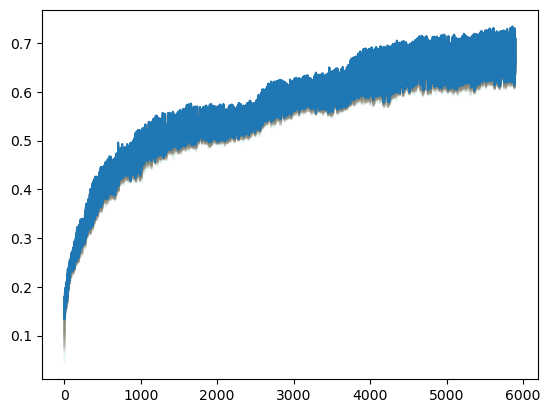

average best of last 100 generations 0.67144


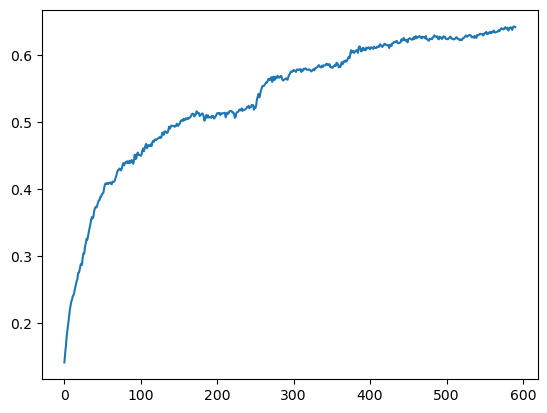

validation accuracy: 0.6417
generation 5902  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.711
generation 5903  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.702
generation 5904  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.66
generation 5905  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.638
generation 5906  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.609
generation 5907  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.659
generation 5908  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.66
generation 5909  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.642
generation 5910  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.613
generation 5911  test set: 1 evaluating performances||||

generation 5977  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.641
generation 5978  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.642
generation 5979  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.653
generation 5980  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.708
generation 5981  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.658
average best of last 100 generations 0.6710400000000001
evaluating performances| done! generation 5982  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.658
generation 5983  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.658
generation 5984  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.702
generation 5985  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

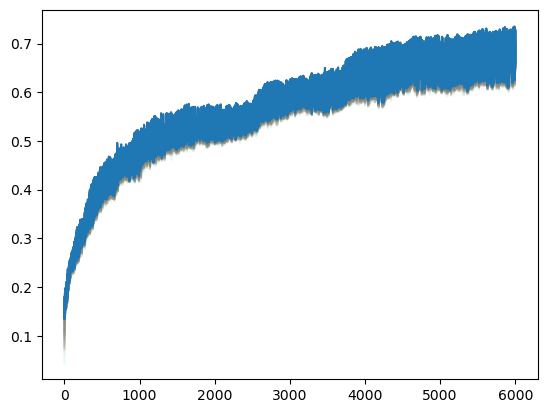

average best of last 100 generations 0.6714500000000001


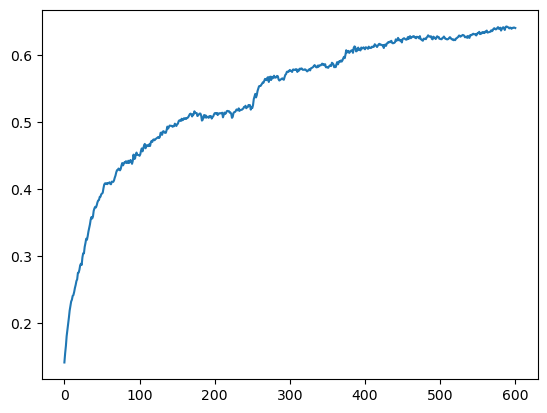

validation accuracy: 0.6403
generation 6002  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.715
generation 6003  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.706
generation 6004  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.659
generation 6005  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.625
generation 6006  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.638
generation 6007  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 6008  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.713
generation 6009  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.704
generation 6010  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.66
generation 6011  test set: 1 evaluating performances|||

generation 6077  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.708
generation 6078  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.662
generation 6079  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.638
generation 6080  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.649
generation 6081  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
average best of last 100 generations 0.6724700000000002
evaluating performances| done! generation 6082  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.659
generation 6083  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.715
generation 6084  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.715
generation 6085  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

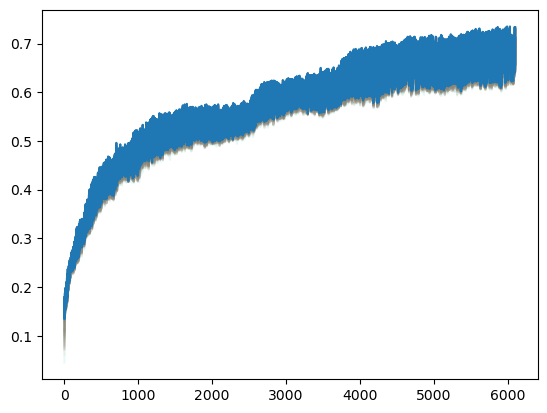

average best of last 100 generations 0.67265


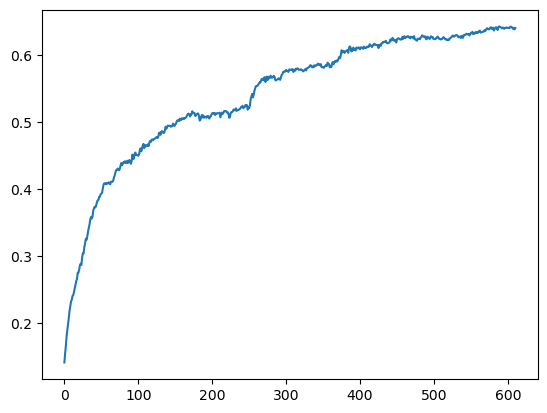

validation accuracy: 0.6403
generation 6102  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.733
generation 6103  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.626
generation 6104  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.648
generation 6105  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.706
generation 6106  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.706
generation 6107  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.645
generation 6108  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.646
generation 6109  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.706
generation 6110  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.648
generation 6111  test set: 5 evaluating performances||

generation 6176  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.733
generation 6177  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.713
generation 6178  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.705
generation 6179  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.64
generation 6180  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.711
generation 6181  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.671
average best of last 100 generations 0.6781200000000004
evaluating performances| done! generation 6182  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.642
generation 6183  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.736
generation 6184  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

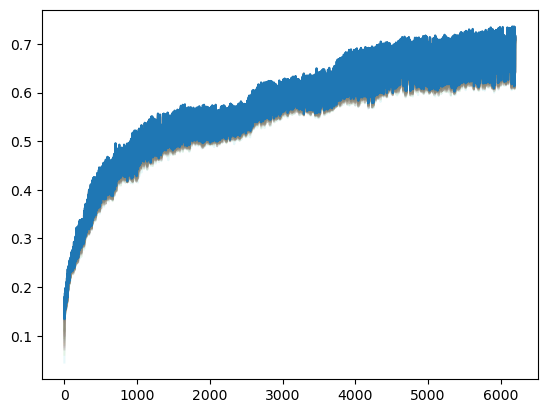

average best of last 100 generations 0.67632


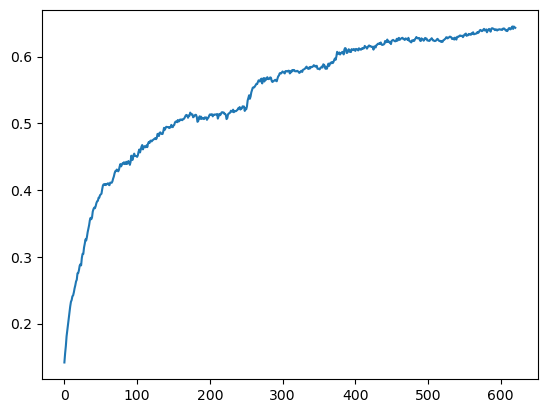

validation accuracy: 0.6432
generation 6202  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.653
generation 6203  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.703
generation 6204  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.704
generation 6205  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.721
generation 6206  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
generation 6207  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.659
generation 6208  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.706
generation 6209  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.639
generation 6210  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 6211  test set: 6 evaluating performances||

generation 6277  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.661
generation 6278  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.645
generation 6279  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.638
generation 6280  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.663
generation 6281  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.653
average best of last 100 generations 0.6738000000000001
evaluating performances| done! generation 6282  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.707
generation 6283  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.639
generation 6284  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.711
generation 6285  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

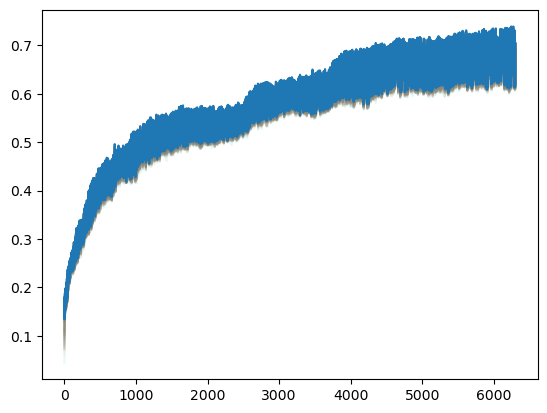

average best of last 100 generations 0.67352


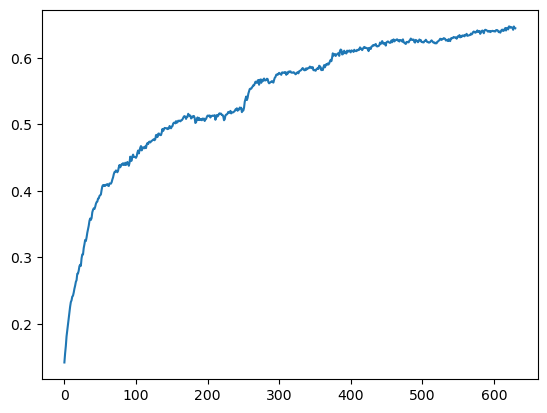

validation accuracy: 0.6449
generation 6302  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.708
generation 6303  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.639
generation 6304  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.709
generation 6305  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.658
generation 6306  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.71
generation 6307  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.66
generation 6308  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.663
generation 6309  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.703
generation 6310  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.65
generation 6311  test set: 8 evaluating performances|||||

generation 6377  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.645
generation 6378  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.647
generation 6379  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.704
generation 6380  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.664
generation 6381  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.631
average best of last 100 generations 0.6721900000000002
evaluating performances| done! generation 6382  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.734
generation 6383  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.668
generation 6384  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.703
generation 6385  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

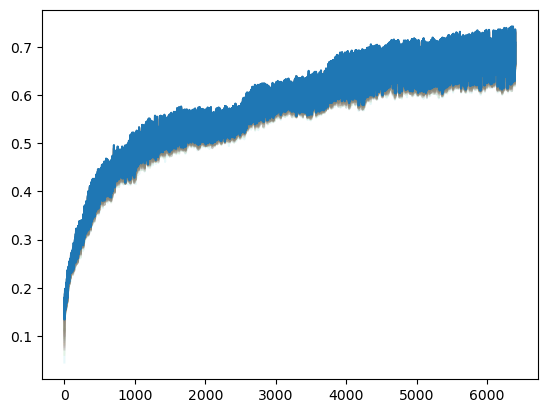

average best of last 100 generations 0.67612


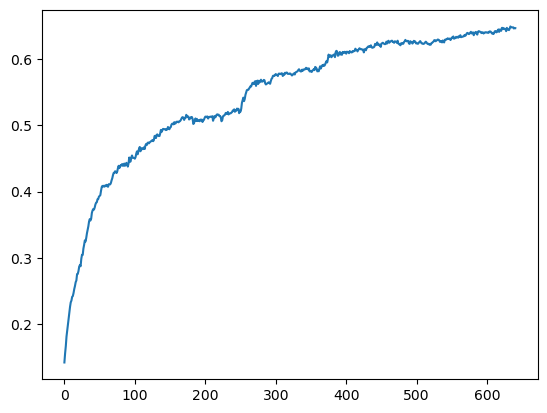

validation accuracy: 0.6472
generation 6402  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.627
generation 6403  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.667
generation 6404  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.649
generation 6405  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.672
generation 6406  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.707
generation 6407  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.666
generation 6408  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.709
generation 6409  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.651
generation 6410  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.661
generation 6411  test set: 9 evaluating performances||

generation 6477  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.668
generation 6478  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.713
generation 6479  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.74
generation 6480  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.633
generation 6481  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.635
average best of last 100 generations 0.6830700000000001
evaluating performances| done! generation 6482  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.659
generation 6483  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.738
generation 6484  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.715
generation 6485  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

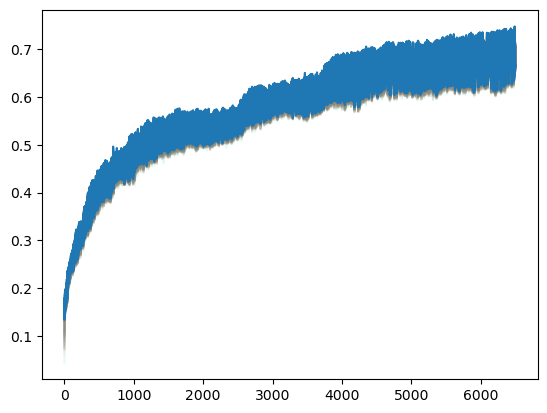

average best of last 100 generations 0.68308


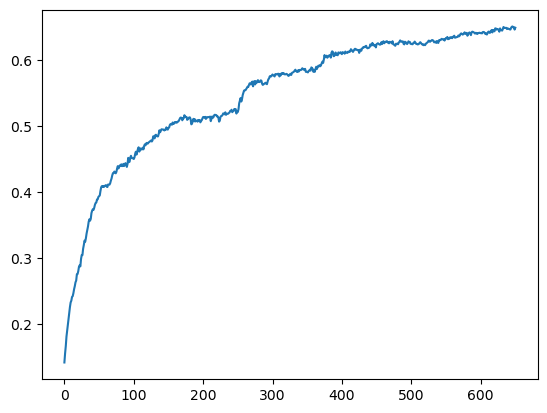

validation accuracy: 0.6486
generation 6502  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.649
generation 6503  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.667
generation 6504  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.669
generation 6505  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.648
generation 6506  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.747
generation 6507  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.712
generation 6508  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.71
generation 6509  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.669
generation 6510  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.712
generation 6511  test set: 4 evaluating performances|||

generation 6577  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.662
generation 6578  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.718
generation 6579  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.668
generation 6580  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.634
generation 6581  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.66
average best of last 100 generations 0.68009
evaluating performances| done! generation 6582  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.744
generation 6583  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.669
generation 6584  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.668
generation 6585  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.714
generat

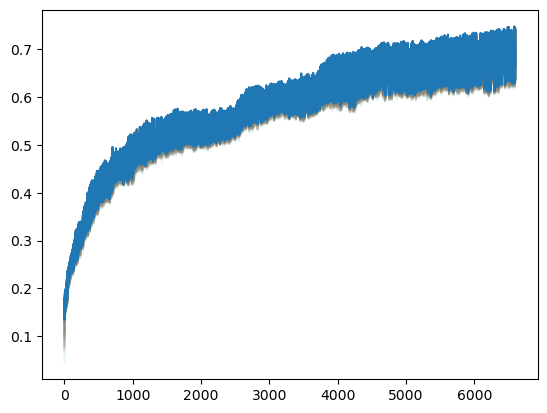

average best of last 100 generations 0.6813099999999997


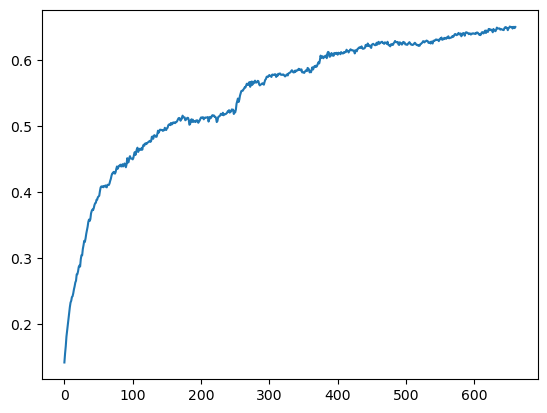

validation accuracy: 0.6506
generation 6602  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.629
generation 6603  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.668
generation 6604  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.746
generation 6605  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.67
generation 6606  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.668
generation 6607  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.71
generation 6608  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.669
generation 6609  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.719
generation 6610  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.67
generation 6611  test set: 3 evaluating performances|||||

generation 6676  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.668
generation 6677  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.638
generation 6678  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.714
generation 6679  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.647
generation 6680  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.74
generation 6681  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.74
average best of last 100 generations 0.6842900000000003
evaluating performances| done! generation 6682  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.664
generation 6683  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.648
generation 6684  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.6

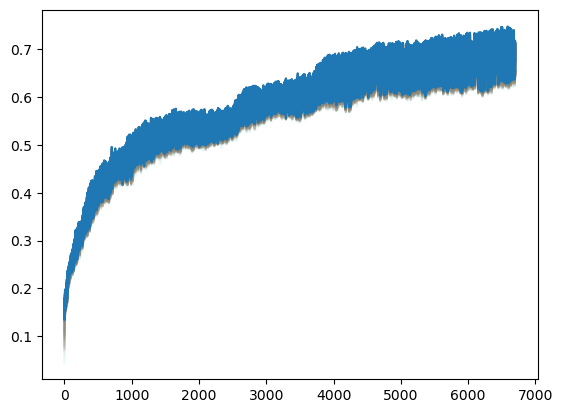

average best of last 100 generations 0.6810700000000002


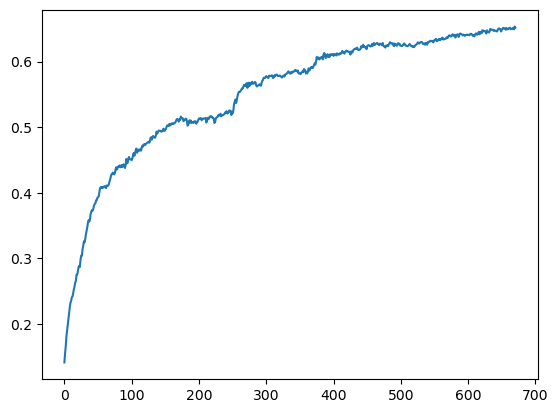

validation accuracy: 0.6515
generation 6702  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.667
generation 6703  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.716
generation 6704  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.714
generation 6705  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.738
generation 6706  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.652
generation 6707  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.717
generation 6708  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.674
generation 6709  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.653
generation 6710  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.654
generation 6711  test set: 7 evaluating performances||

generation 6777  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.669
generation 6778  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.669
generation 6779  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.713
generation 6780  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.708
generation 6781  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.65
average best of last 100 generations 0.6793700000000003
evaluating performances| done! generation 6782  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.739
generation 6783  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.654
generation 6784  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.713
generation 6785  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

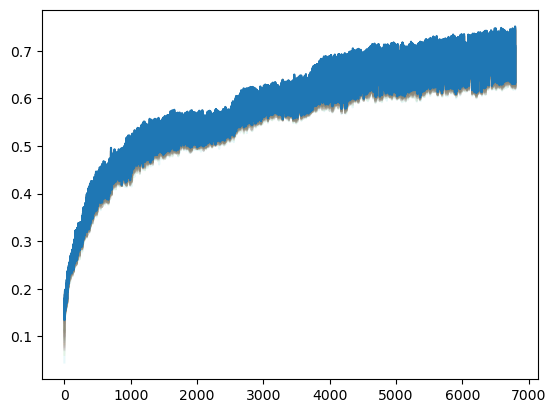

average best of last 100 generations 0.6831500000000003


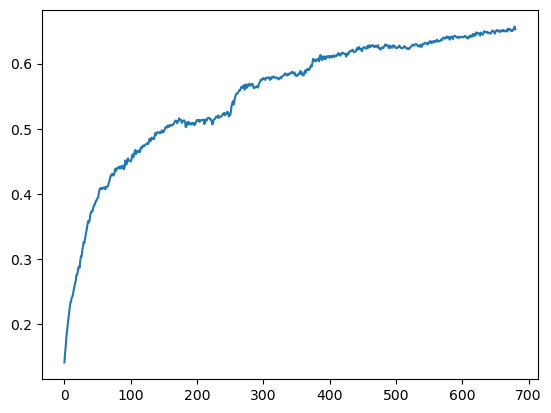

validation accuracy: 0.6524
generation 6802  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.741
generation 6803  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.66
generation 6804  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.666
generation 6805  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.707
generation 6806  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.741
generation 6807  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.642
generation 6808  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.665
generation 6809  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.631
generation 6810  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.713
generation 6811  test set: 5 evaluating performances|||

generation 6877  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.668
generation 6878  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.721
generation 6879  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.715
generation 6880  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.678
generation 6881  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.718
average best of last 100 generations 0.68289
evaluating performances| done! generation 6882  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.665
generation 6883  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.666
generation 6884  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.631
generation 6885  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.717
genera

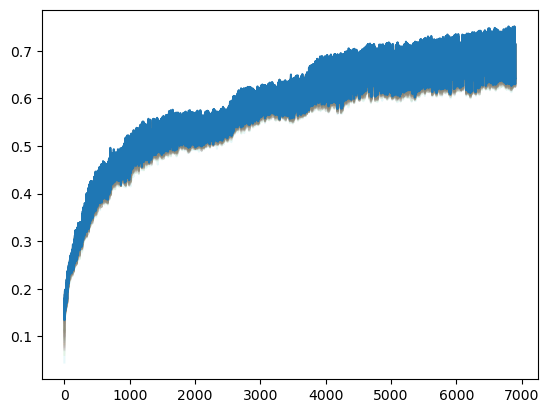

average best of last 100 generations 0.6782199999999999


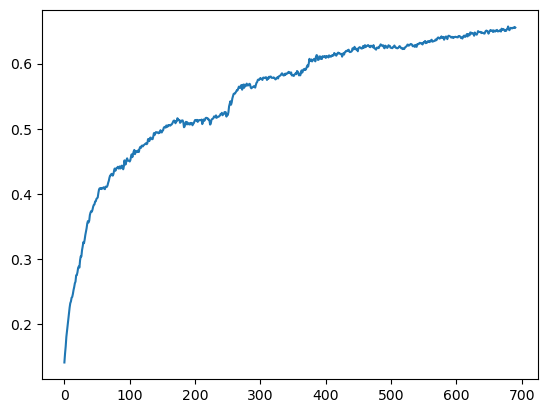

validation accuracy: 0.6551
generation 6902  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.667
generation 6903  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.711
generation 6904  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.749
generation 6905  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.633
generation 6906  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 6907  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.75
generation 6908  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 6909  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.724
generation 6910  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.724
generation 6911  test set: 0 evaluating performances|||

generation 6977  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.629
generation 6978  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.673
generation 6979  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 6980  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.746
generation 6981  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.746
average best of last 100 generations 0.6808700000000001
evaluating performances| done! generation 6982  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.676
generation 6983  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.663
generation 6984  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.721
generation 6985  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

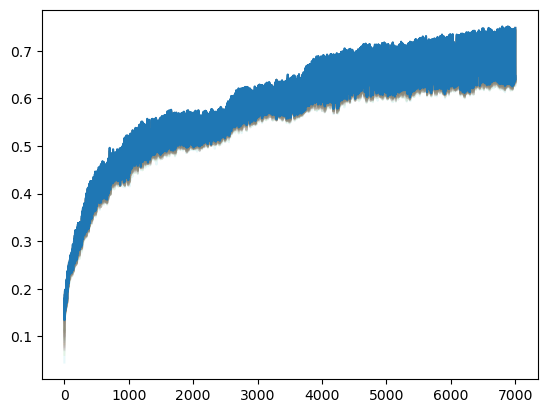

average best of last 100 generations 0.6822400000000002


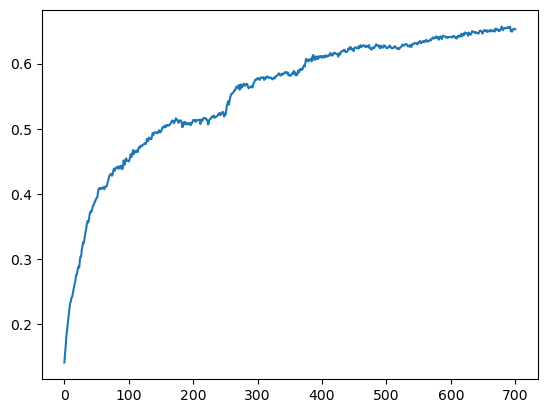

validation accuracy: 0.6526
generation 7002  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.671
generation 7003  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.748
generation 7004  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.748
generation 7005  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.751
generation 7006  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.665
generation 7007  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.673
generation 7008  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.673
generation 7009  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.672
generation 7010  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 7011  test set: 0 evaluating performances||

generation 7077  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.716
generation 7078  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.661
generation 7079  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.742
generation 7080  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.648
generation 7081  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.72
average best of last 100 generations 0.6864099999999997
evaluating performances| done! generation 7082  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 7083  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.743
generation 7084  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.651
generation 7085  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

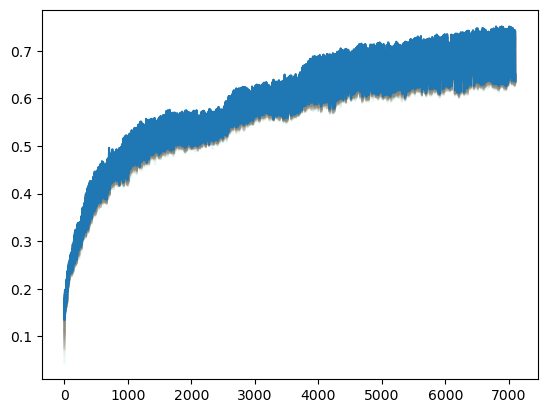

average best of last 100 generations 0.6864699999999999


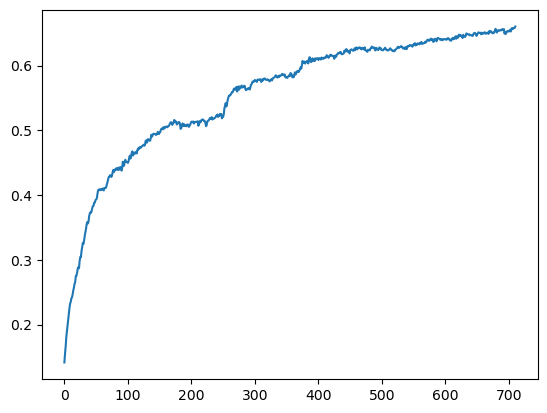

validation accuracy: 0.6604
generation 7102  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.652
generation 7103  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.717
generation 7104  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.653
generation 7105  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 7106  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.717
generation 7107  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.718
generation 7108  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 7109  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.718
generation 7110  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.717
generation 7111  test set: 2 evaluating performances||

generation 7176  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.677
generation 7177  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.74
generation 7178  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.653
generation 7179  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.674
generation 7180  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.637
generation 7181  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
average best of last 100 generations 0.6813200000000001
evaluating performances| done! generation 7182  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.717
generation 7183  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.648
generation 7184  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

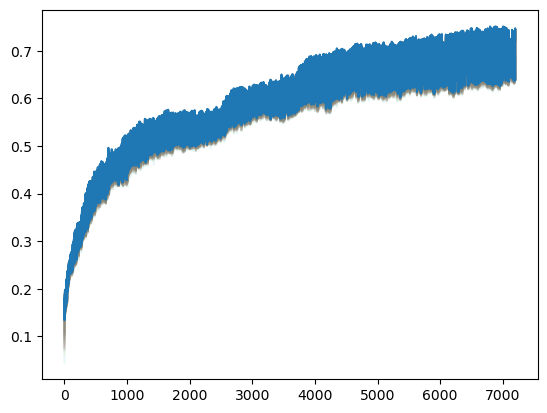

average best of last 100 generations 0.6832400000000001


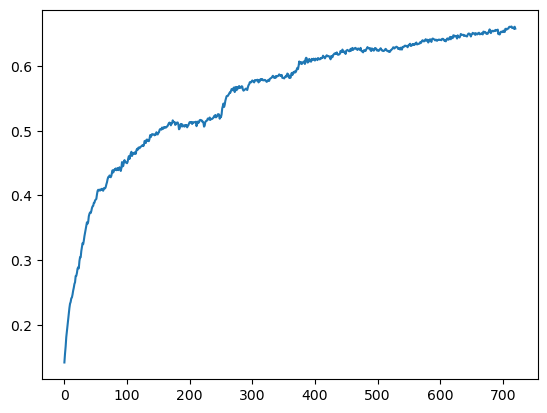

validation accuracy: 0.658
generation 7202  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.722
generation 7203  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.724
generation 7204  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.673
generation 7205  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.725
generation 7206  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.675
generation 7207  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.72
generation 7208  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.678
generation 7209  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.679
generation 7210  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.72
generation 7211  test set: 2 evaluating performances|||||

generation 7277  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.671
generation 7278  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.725
generation 7279  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.636
generation 7280  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.743
generation 7281  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
average best of last 100 generations 0.6904099999999996
evaluating performances| done! generation 7282  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
generation 7283  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.676
generation 7284  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 7285  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

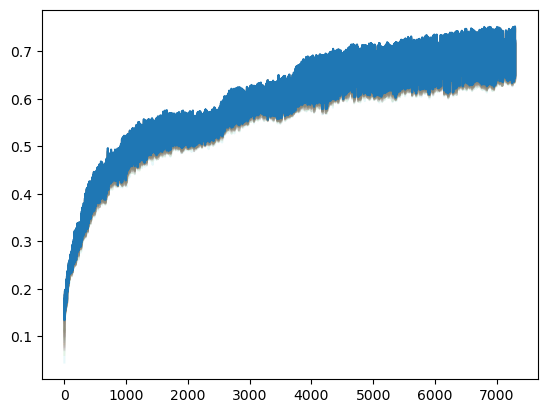

average best of last 100 generations 0.6895300000000002


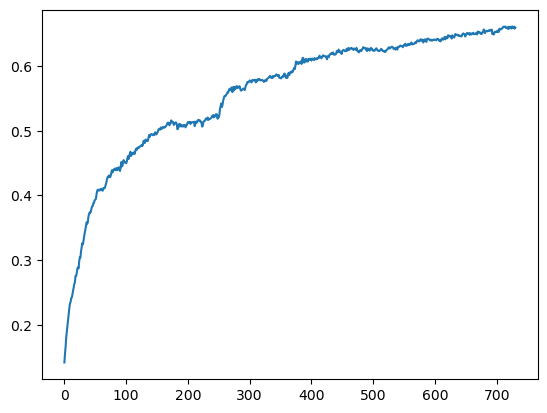

validation accuracy: 0.6595
generation 7302  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.721
generation 7303  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.671
generation 7304  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.674
generation 7305  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.724
generation 7306  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.676
generation 7307  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.719
generation 7308  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 7309  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.677
generation 7310  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.68
generation 7311  test set: 1 evaluating performances|||

generation 7377  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.645
generation 7378  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.646
generation 7379  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.753
generation 7380  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.72
generation 7381  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.677
average best of last 100 generations 0.6857500000000001
evaluating performances| done! generation 7382  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.754
generation 7383  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.649
generation 7384  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.756
generation 7385  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

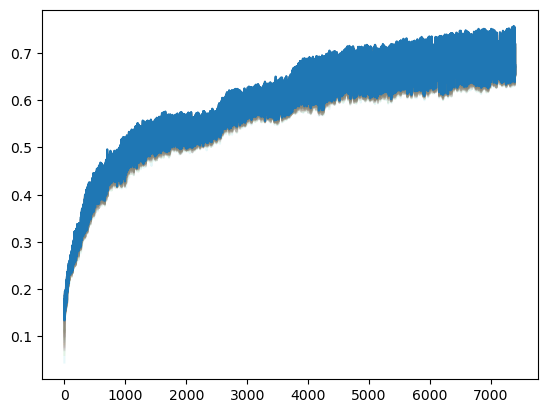

average best of last 100 generations 0.6876000000000001


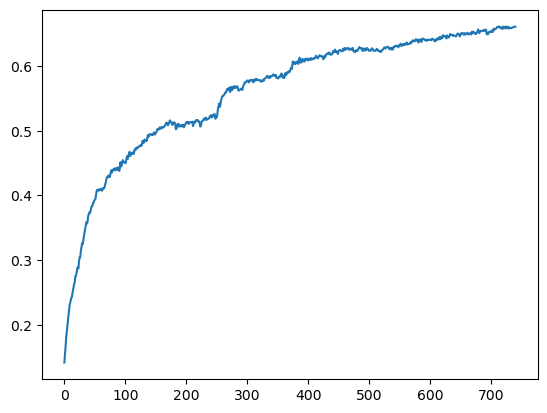

validation accuracy: 0.6609
generation 7402  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.727
generation 7403  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.75
generation 7404  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.72
generation 7405  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.717
generation 7406  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.678
generation 7407  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 7408  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.672
generation 7409  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.722
generation 7410  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.752
generation 7411  test set: 4 evaluating performances||||

generation 7477  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.756
generation 7478  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.688
generation 7479  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.727
generation 7480  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.728
generation 7481  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.645
average best of last 100 generations 0.6970999999999996
evaluating performances| done! generation 7482  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.651
generation 7483  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.719
generation 7484  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.722
generation 7485  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

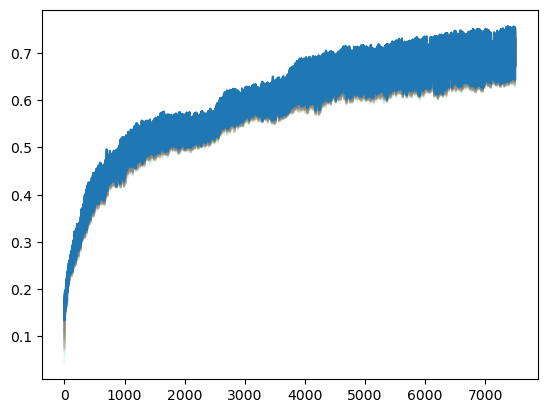

average best of last 100 generations 0.6980000000000001


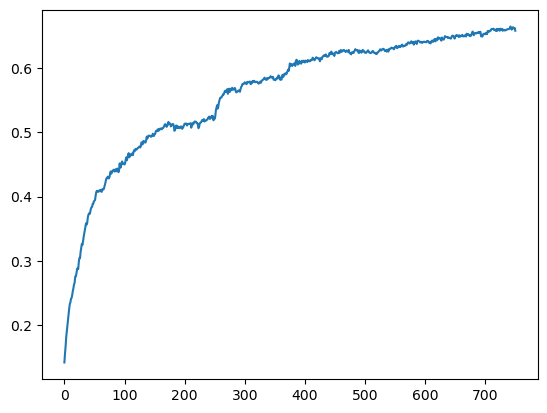

validation accuracy: 0.6581
generation 7502  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.68
generation 7503  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.681
generation 7504  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.673
generation 7505  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.674
generation 7506  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.659
generation 7507  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.716
generation 7508  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.65
generation 7509  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.65
generation 7510  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.721
generation 7511  test set: 0 evaluating performances|||||

generation 7577  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 7578  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.717
generation 7579  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
generation 7580  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.68
generation 7581  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.714
average best of last 100 generations 0.69229
evaluating performances| done! generation 7582  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.67
generation 7583  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.724
generation 7584  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.724
generation 7585  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.715
generati

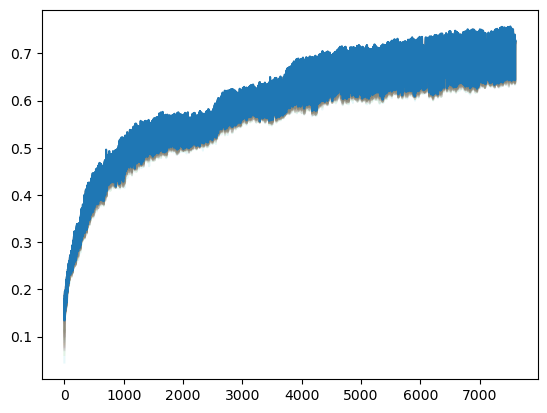

average best of last 100 generations 0.6934199999999997


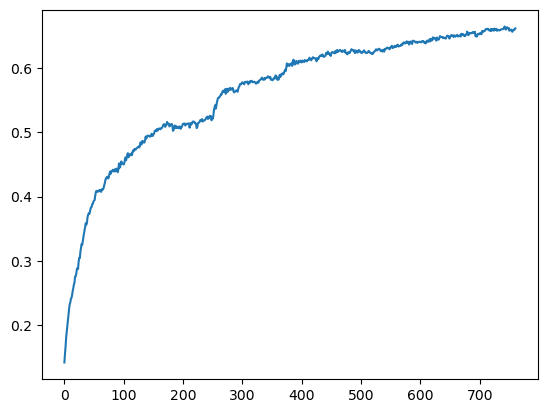

validation accuracy: 0.6618
generation 7602  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.672
generation 7603  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.74
generation 7604  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.643
generation 7605  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
generation 7606  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.675
generation 7607  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 7608  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.675
generation 7609  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
generation 7610  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.677
generation 7611  test set: 8 evaluating performances|||

generation 7677  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.645
generation 7678  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.721
generation 7679  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.642
generation 7680  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.679
generation 7681  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.725
average best of last 100 generations 0.6890599999999998
evaluating performances| done! generation 7682  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.727
generation 7683  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.648
generation 7684  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.723
generation 7685  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

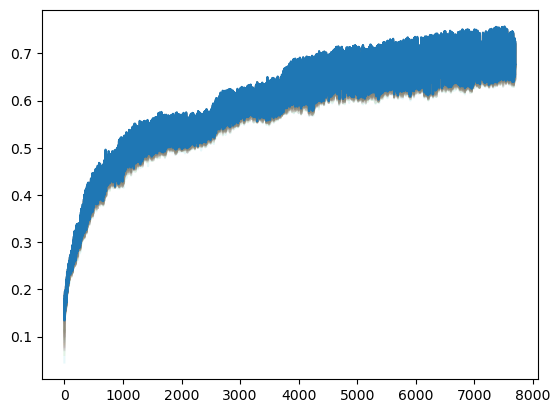

average best of last 100 generations 0.68549


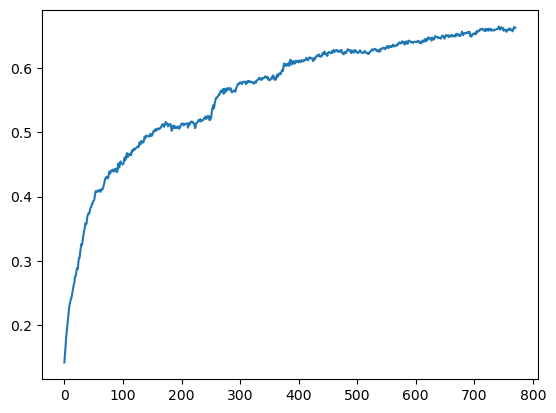

validation accuracy: 0.6626
generation 7702  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.752
generation 7703  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.674
generation 7704  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.68
generation 7705  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.727
generation 7706  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.645
generation 7707  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.683
generation 7708  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.752
generation 7709  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.753
generation 7710  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.671
generation 7711  test set: 7 evaluating performances|||

generation 7777  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.68
generation 7778  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.675
generation 7779  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.675
generation 7780  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.726
generation 7781  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.677
average best of last 100 generations 0.6928700000000001
evaluating performances| done! generation 7782  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.642
generation 7783  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.752
generation 7784  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.753
generation 7785  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

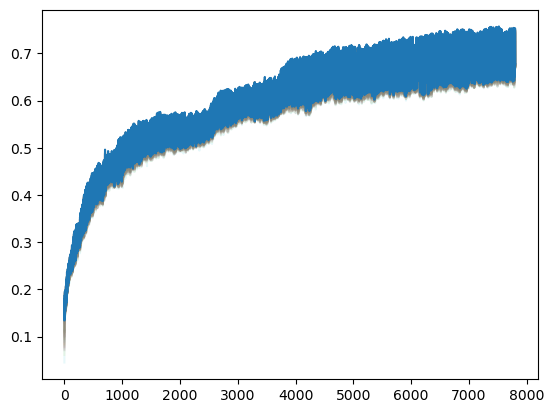

average best of last 100 generations 0.6971200000000001


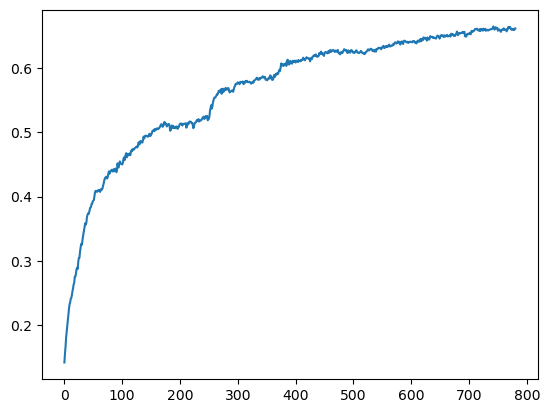

validation accuracy: 0.6617
generation 7802  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.725
generation 7803  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.681
generation 7804  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.652
generation 7805  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
generation 7806  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.653
generation 7807  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.682
generation 7808  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.656
generation 7809  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.749
generation 7810  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 7811  test set: 0 evaluating performances||

generation 7877  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.654
generation 7878  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.654
generation 7879  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 7880  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.732
generation 7881  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.733
average best of last 100 generations 0.69452
evaluating performances| done! generation 7882  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.731
generation 7883  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.724
generation 7884  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.746
generation 7885  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.679
genera

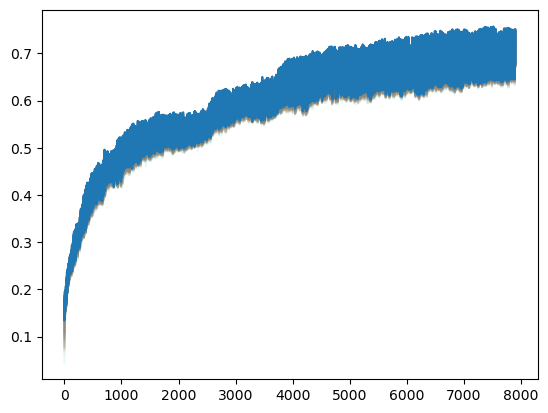

average best of last 100 generations 0.6954200000000005


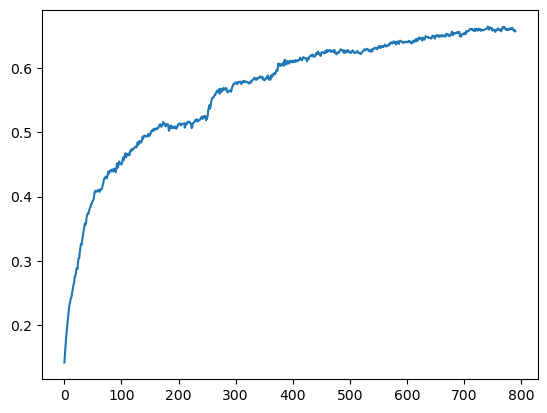

validation accuracy: 0.657
generation 7902  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.673
generation 7903  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.682
generation 7904  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.651
generation 7905  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.678
generation 7906  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.679
generation 7907  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.682
generation 7908  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.727
generation 7909  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.678
generation 7910  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.638
generation 7911  test set: 6 evaluating performances|||

generation 7977  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.683
generation 7978  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 7979  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.69
generation 7980  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.652
generation 7981  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.642
average best of last 100 generations 0.6927
evaluating performances| done! generation 7982  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.652
generation 7983  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.738
generation 7984  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.72
generation 7985  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.728
generatio

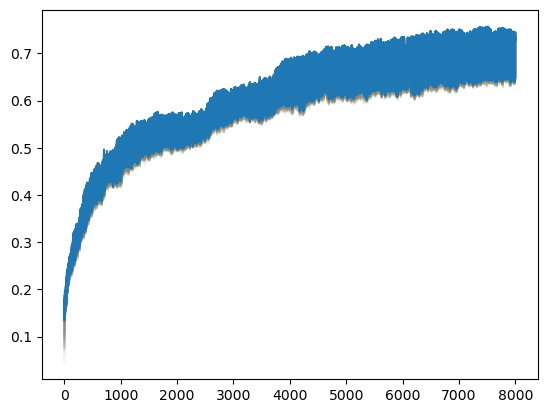

average best of last 100 generations 0.6908299999999997


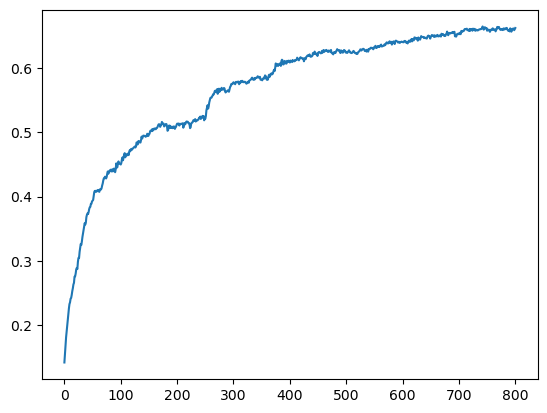

validation accuracy: 0.6623
generation 8002  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.678
generation 8003  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.746
generation 8004  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.676
generation 8005  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.652
generation 8006  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.73
generation 8007  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.684
generation 8008  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.675
generation 8009  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.688
generation 8010  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.677
generation 8011  test set: 9 evaluating performances|||

generation 8077  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.724
generation 8078  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.685
generation 8079  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.737
generation 8080  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.674
generation 8081  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.674
average best of last 100 generations 0.6970600000000001
evaluating performances| done! generation 8082  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.725
generation 8083  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.647
generation 8084  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.728
generation 8085  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

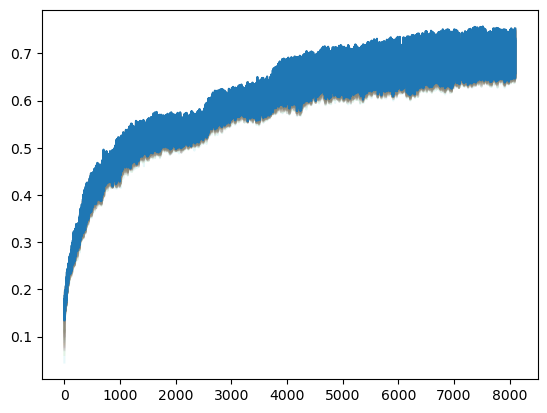

average best of last 100 generations 0.6949400000000001


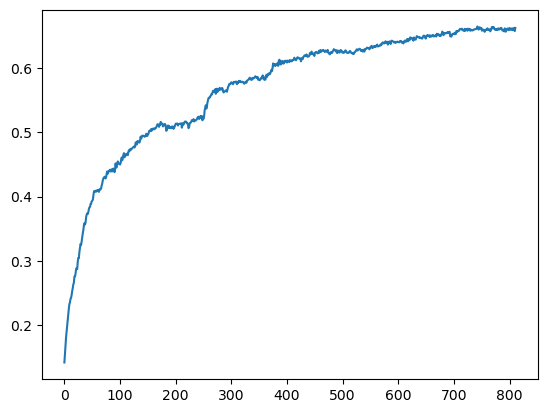

validation accuracy: 0.6625
generation 8102  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.656
generation 8103  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.727
generation 8104  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.647
generation 8105  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.669
generation 8106  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.679
generation 8107  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.68
generation 8108  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.658
generation 8109  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.679
generation 8110  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 8111  test set: 9 evaluating performances|||

generation 8177  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 8178  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.656
generation 8179  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.687
generation 8180  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.734
generation 8181  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.734
average best of last 100 generations 0.6870600000000002
evaluating performances| done! generation 8182  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.727
generation 8183  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.651
generation 8184  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.654
generation 8185  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

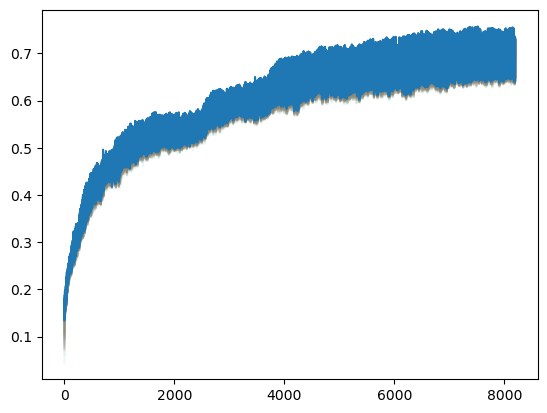

average best of last 100 generations 0.6863300000000002


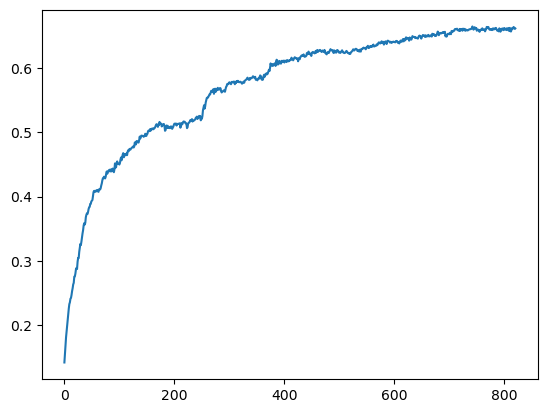

validation accuracy: 0.6617
generation 8202  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.647
generation 8203  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.689
generation 8204  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.649
generation 8205  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.732
generation 8206  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.728
generation 8207  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.686
generation 8208  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.678
generation 8209  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.749
generation 8210  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 8211  test set: 1 evaluating performances||

generation 8277  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.651
generation 8278  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.661
generation 8279  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.652
generation 8280  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.682
generation 8281  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.647
average best of last 100 generations 0.6884700000000002
evaluating performances| done! generation 8282  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.683
generation 8283  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.685
generation 8284  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.752
generation 8285  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

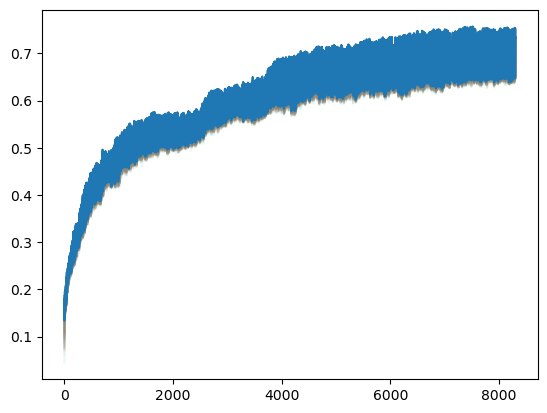

average best of last 100 generations 0.6909400000000003


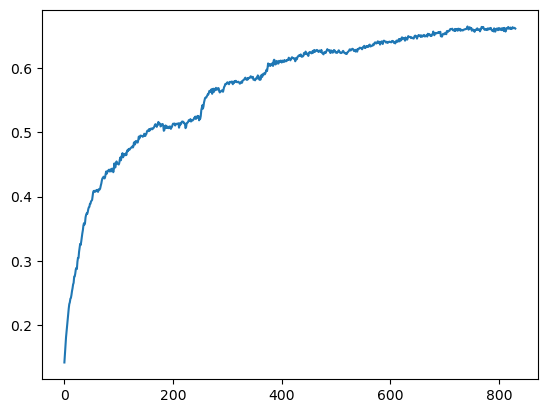

validation accuracy: 0.6614
generation 8302  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.69
generation 8303  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.659
generation 8304  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.751
generation 8305  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.659
generation 8306  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.75
generation 8307  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.734
generation 8308  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.659
generation 8309  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.645
generation 8310  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.692
generation 8311  test set: 9 evaluating performances||||

generation 8377  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 8378  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.686
generation 8379  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.671
generation 8380  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.647
generation 8381  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.728
average best of last 100 generations 0.6927400000000002
evaluating performances| done! generation 8382  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.662
generation 8383  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 8384  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.748
generation 8385  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

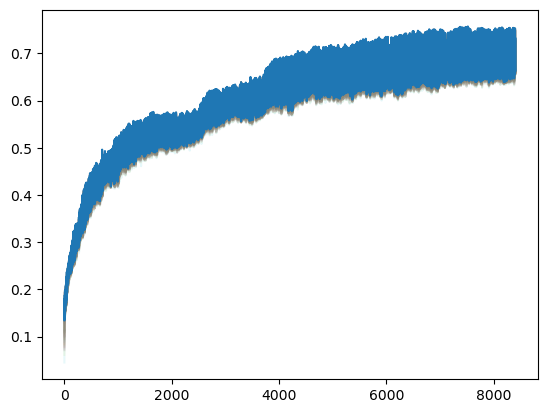

average best of last 100 generations 0.6943699999999999


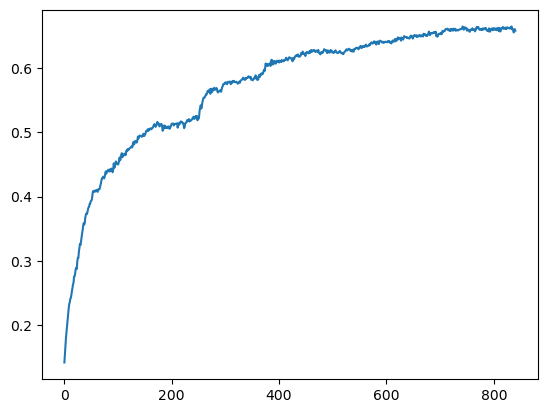

validation accuracy: 0.6581
generation 8402  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.726
generation 8403  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.653
generation 8404  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 8405  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.686
generation 8406  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.73
generation 8407  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.752
generation 8408  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.732
generation 8409  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.687
generation 8410  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.677
generation 8411  test set: 9 evaluating performances|||

generation 8476  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.727
generation 8477  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.728
generation 8478  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.724
generation 8479  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.68
generation 8480  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.733
generation 8481  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.659
average best of last 100 generations 0.69536
evaluating performances| done! generation 8482  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.66
generation 8483  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.691
generation 8484  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.745
generati

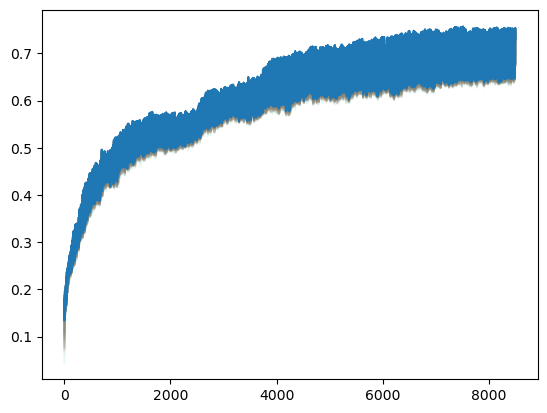

average best of last 100 generations 0.6927599999999998


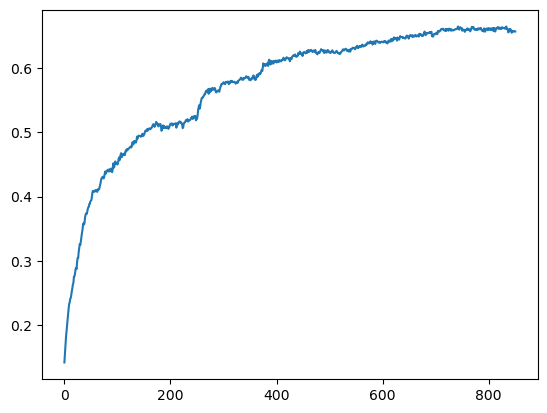

validation accuracy: 0.6569
generation 8502  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.73
generation 8503  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.725
generation 8504  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.656
generation 8505  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.644
generation 8506  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.656
generation 8507  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 8508  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.654
generation 8509  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 8510  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.732
generation 8511  test set: 5 evaluating performances|||

generation 8577  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.748
generation 8578  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.66
generation 8579  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.732
generation 8580  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.68
generation 8581  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.652
average best of last 100 generations 0.6913499999999999
evaluating performances| done! generation 8582  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.681
generation 8583  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.651
generation 8584  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.682
generation 8585  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.6

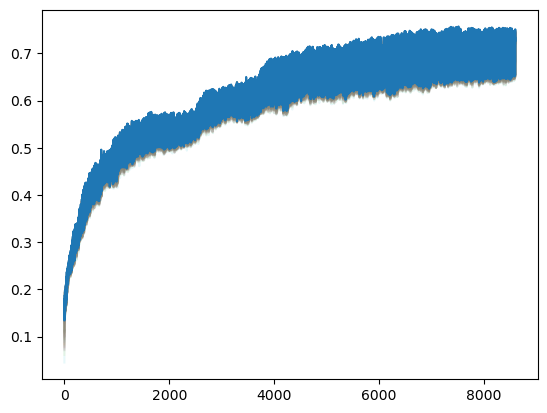

average best of last 100 generations 0.69207


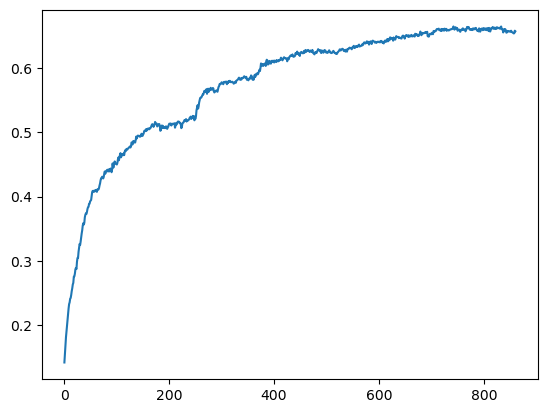

validation accuracy: 0.6573
generation 8602  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.678
generation 8603  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.645
generation 8604  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.726
generation 8605  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.652
generation 8606  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.724
generation 8607  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.69
generation 8608  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.736
generation 8609  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.656
generation 8610  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.725
generation 8611  test set: 9 evaluating performances|||

generation 8677  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.728
generation 8678  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.681
generation 8679  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.752
generation 8680  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.675
generation 8681  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.645
average best of last 100 generations 0.6935699999999998
evaluating performances| done! generation 8682  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.733
generation 8683  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 8684  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 8685  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

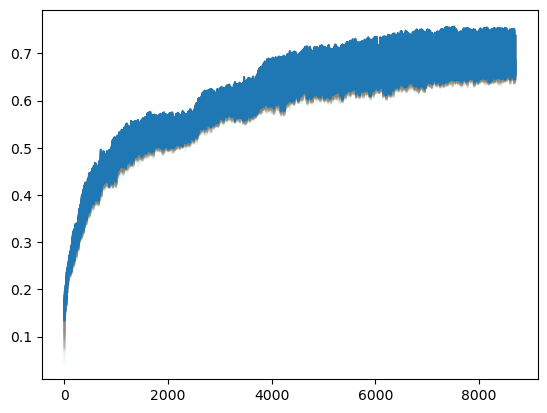

average best of last 100 generations 0.6913699999999997


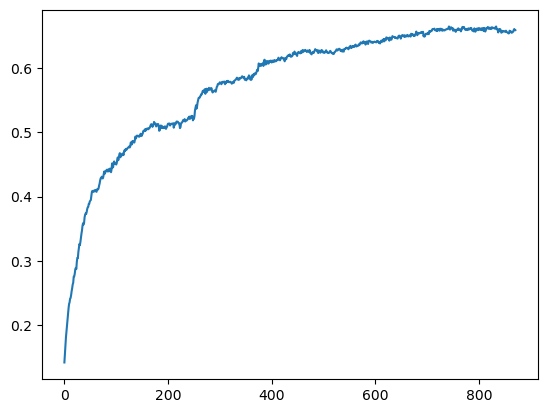

validation accuracy: 0.6589
generation 8702  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.689
generation 8703  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.662
generation 8704  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.652
generation 8705  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.682
generation 8706  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 8707  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.658
generation 8708  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.691
generation 8709  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.731
generation 8710  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.683
generation 8711  test set: 3 evaluating performances||

generation 8777  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.726
generation 8778  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.685
generation 8779  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.66
generation 8780  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.728
generation 8781  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.738
average best of last 100 generations 0.6957999999999999
evaluating performances| done! generation 8782  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.736
generation 8783  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.727
generation 8784  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.741
generation 8785  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

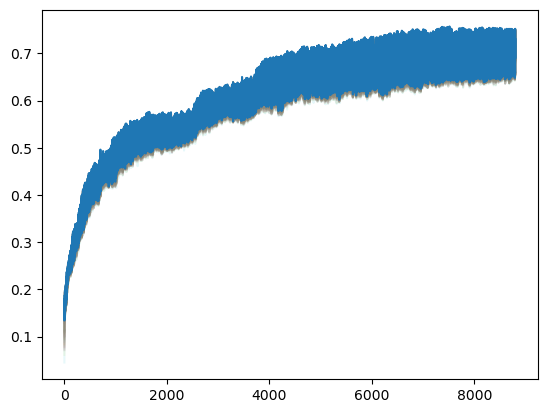

average best of last 100 generations 0.6997799999999996


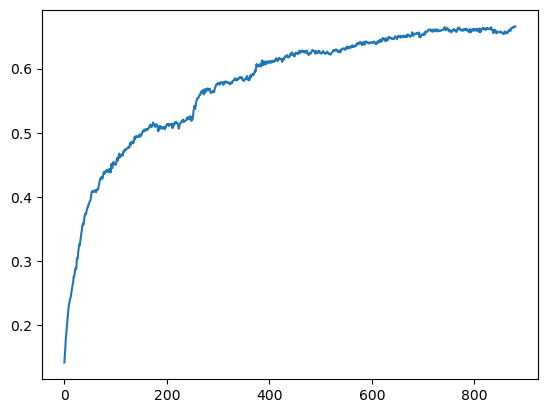

validation accuracy: 0.6658
generation 8802  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 8803  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.736
generation 8804  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.662
generation 8805  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.663
generation 8806  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.732
generation 8807  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 8808  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 8809  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 8810  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.686
generation 8811  test set: 8 evaluating performances||

generation 8877  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.659
generation 8878  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.734
generation 8879  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.666
generation 8880  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.689
generation 8881  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.757
average best of last 100 generations 0.70327
evaluating performances| done! generation 8882  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.659
generation 8883  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.665
generation 8884  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.694
generation 8885  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.68
generat

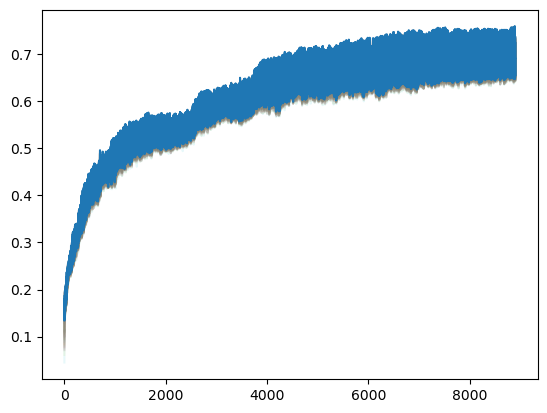

average best of last 100 generations 0.7010199999999996


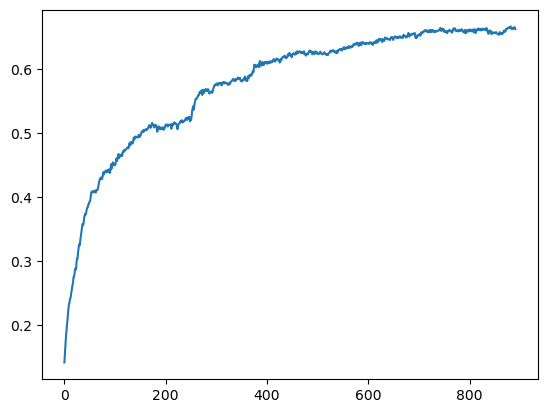

validation accuracy: 0.6629
generation 8902  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.737
generation 8903  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.664
generation 8904  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.733
generation 8905  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 8906  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.651
generation 8907  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.754
generation 8908  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.735
generation 8909  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.679
generation 8910  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.734
generation 8911  test set: 6 evaluating performances||

generation 8976  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.733
generation 8977  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.734
generation 8978  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.667
generation 8979  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.668
generation 8980  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.691
generation 8981  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.731
average best of last 100 generations 0.6954499999999997
evaluating performances| done! generation 8982  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.69
generation 8983  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.738
generation 8984  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

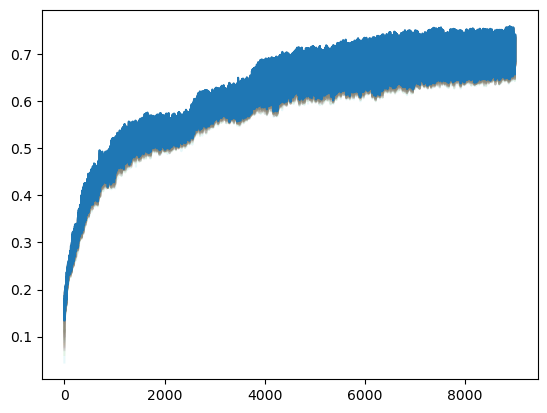

average best of last 100 generations 0.6977499999999996


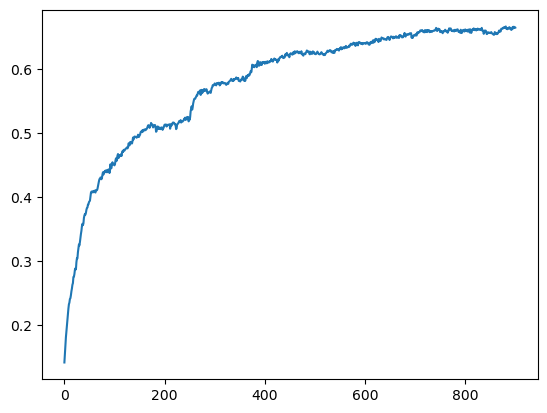

validation accuracy: 0.6651
generation 9002  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.655
generation 9003  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.664
generation 9004  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.688
generation 9005  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.691
generation 9006  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.693
generation 9007  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.743
generation 9008  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.664
generation 9009  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.743
generation 9010  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.664
generation 9011  test set: 3 evaluating performances||

generation 9077  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.726
generation 9078  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.695
generation 9079  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.735
generation 9080  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.753
generation 9081  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.649
average best of last 100 generations 0.7011899999999999
evaluating performances| done! generation 9082  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.684
generation 9083  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.754
generation 9084  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.682
generation 9085  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

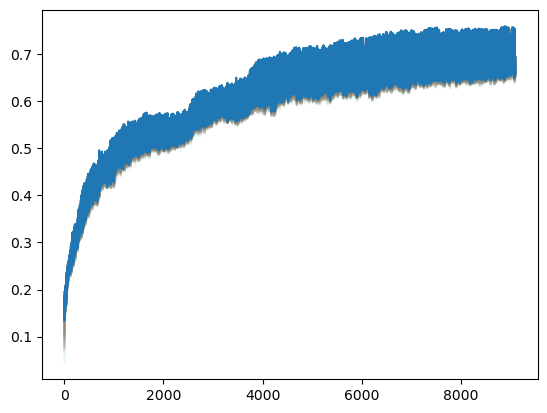

average best of last 100 generations 0.69662


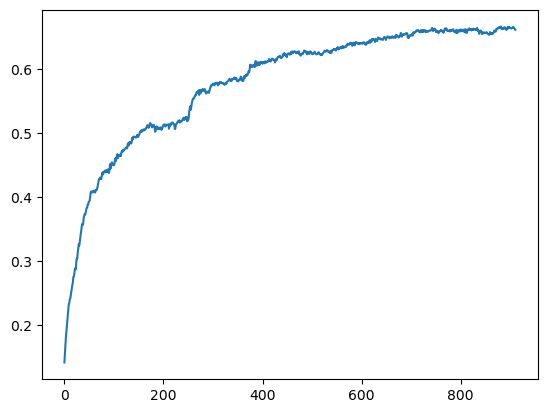

validation accuracy: 0.6617
generation 9102  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.685
generation 9103  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.732
generation 9104  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.687
generation 9105  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.696
generation 9106  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.69
generation 9107  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.726
generation 9108  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.727
generation 9109  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.756
generation 9110  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.727
generation 9111  test set: 7 evaluating performances|||

generation 9177  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.67
generation 9178  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.662
generation 9179  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.693
generation 9180  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.656
generation 9181  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.669
average best of last 100 generations 0.6966899999999999
evaluating performances| done! generation 9182  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.73
generation 9183  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.753
generation 9184  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.664
generation 9185  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.6

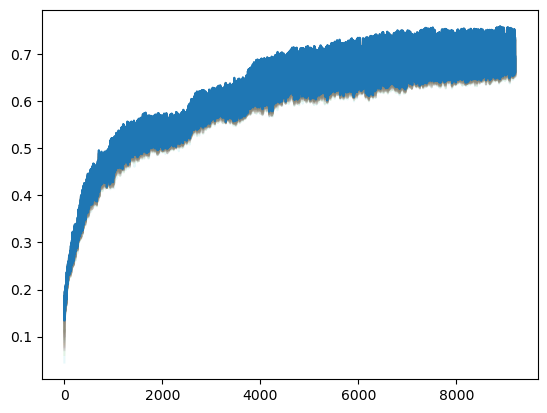

average best of last 100 generations 0.7005999999999996


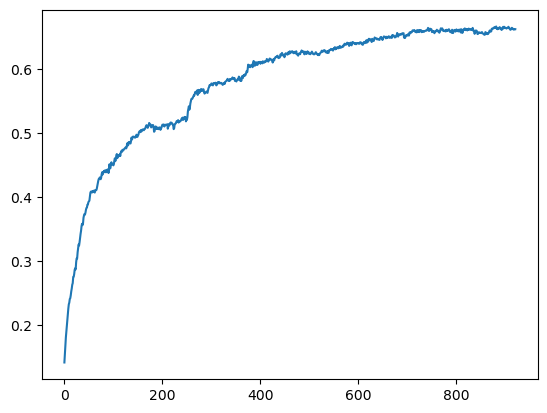

validation accuracy: 0.6627
generation 9202  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.735
generation 9203  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.732
generation 9204  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.733
generation 9205  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.67
generation 9206  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.693
generation 9207  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.736
generation 9208  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.693
generation 9209  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.687
generation 9210  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.66
generation 9211  test set: 6 evaluating performances||||

generation 9277  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.686
generation 9278  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.688
generation 9279  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.672
generation 9280  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.689
generation 9281  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.689
average best of last 100 generations 0.6990499999999996
evaluating performances| done! generation 9282  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.672
generation 9283  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.687
generation 9284  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.657
generation 9285  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

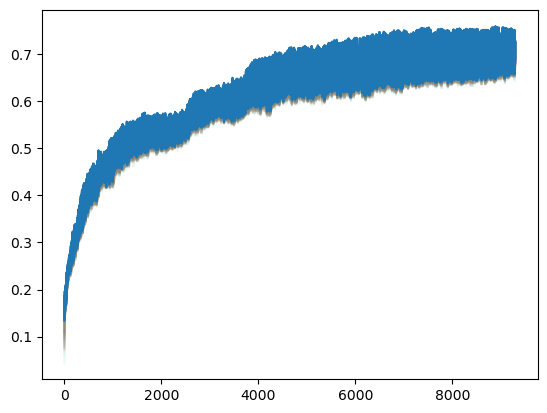

average best of last 100 generations 0.6974399999999996


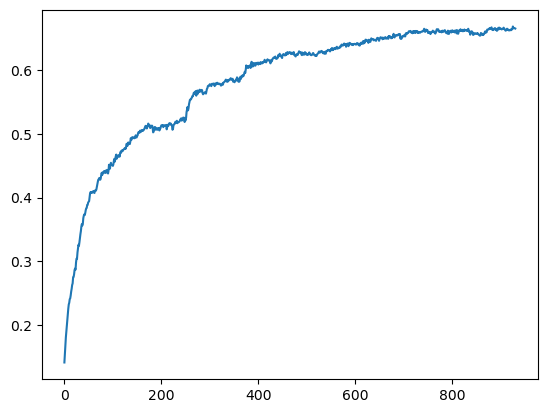

validation accuracy: 0.6651
generation 9302  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 9303  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.738
generation 9304  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.671
generation 9305  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.75
generation 9306  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.665
generation 9307  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.667
generation 9308  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.73
generation 9309  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.661
generation 9310  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.688
generation 9311  test set: 7 evaluating performances||||

generation 9377  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.732
generation 9378  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.739
generation 9379  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.735
generation 9380  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.683
generation 9381  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.688
average best of last 100 generations 0.70298
evaluating performances| done! generation 9382  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.731
generation 9383  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.661
generation 9384  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.675
generation 9385  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.732
genera

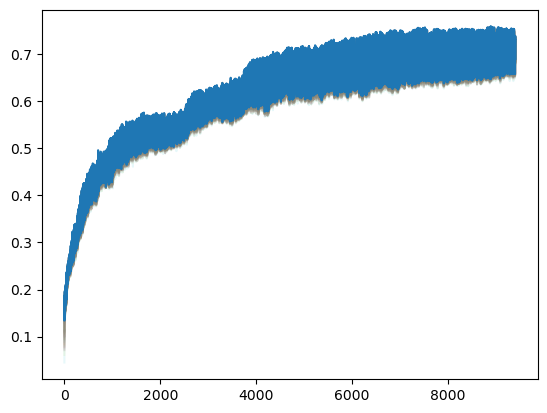

average best of last 100 generations 0.7036699999999998


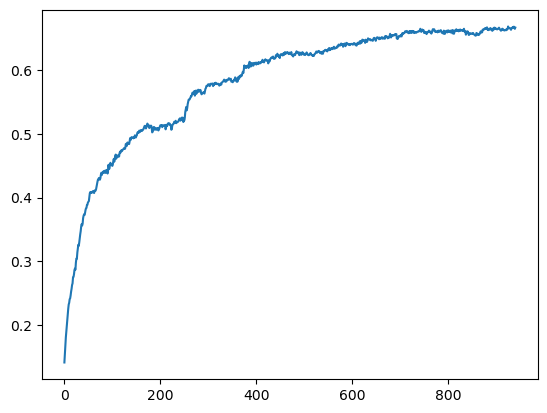

validation accuracy: 0.6666
generation 9402  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.677
generation 9403  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.66
generation 9404  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.661
generation 9405  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.663
generation 9406  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.727
generation 9407  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.673
generation 9408  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.663
generation 9409  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.73
generation 9410  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.663
generation 9411  test set: 1 evaluating performances||||

generation 9477  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.669
generation 9478  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.739
generation 9479  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.734
generation 9480  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.761
generation 9481  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.736
average best of last 100 generations 0.7055299999999995
evaluating performances| done! generation 9482  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.684
generation 9483  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.689
generation 9484  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.667
generation 9485  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

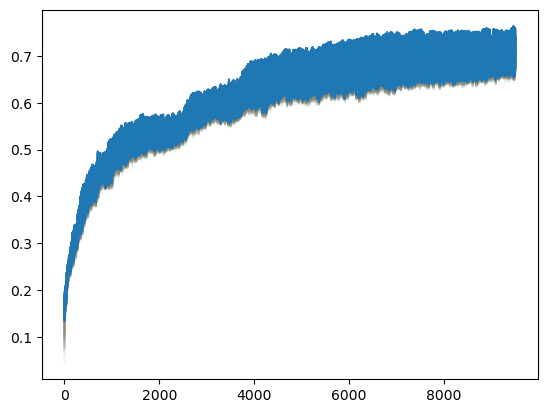

average best of last 100 generations 0.7047399999999999


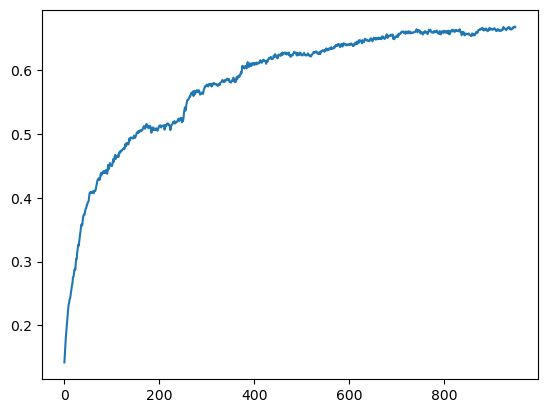

validation accuracy: 0.6681
generation 9502  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.737
generation 9503  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.76
generation 9504  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.737
generation 9505  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 9506  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.692
generation 9507  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.741
generation 9508  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.685
generation 9509  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.677
generation 9510  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.732
generation 9511  test set: 7 evaluating performances|||

generation 9577  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.743
generation 9578  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.7
generation 9579  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.677
generation 9580  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.679
generation 9581  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.664
average best of last 100 generations 0.7045299999999999
evaluating performances| done! generation 9582  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.699
generation 9583  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.695
generation 9584  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 9585  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.7

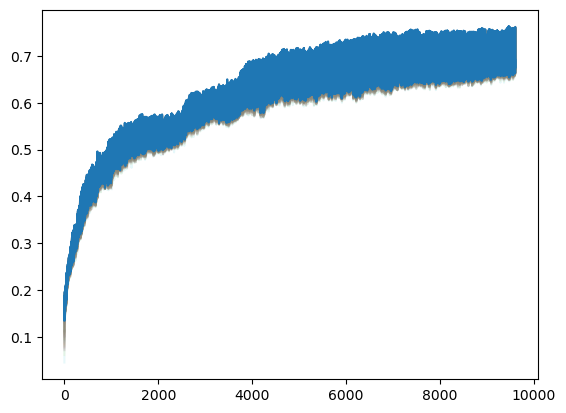

average best of last 100 generations 0.7056


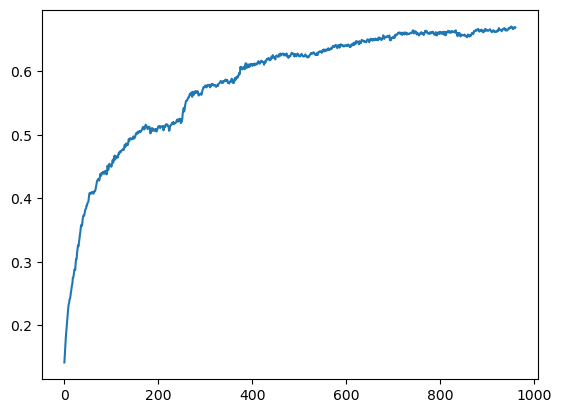

validation accuracy: 0.6693
generation 9602  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.676
generation 9603  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.676
generation 9604  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.763
generation 9605  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.692
generation 9606  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.728
generation 9607  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.686
generation 9608  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.676
generation 9609  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 9610  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.739
generation 9611  test set: 4 evaluating performances||

generation 9677  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.695
generation 9678  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.692
generation 9679  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.663
generation 9680  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.692
generation 9681  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.728
average best of last 100 generations 0.7057199999999995
evaluating performances| done! generation 9682  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.733
generation 9683  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.667
generation 9684  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.667
generation 9685  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

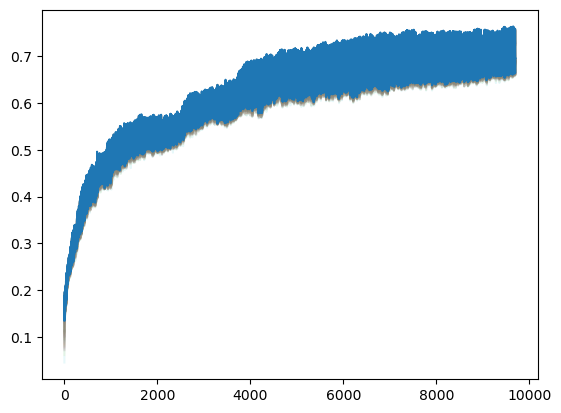

average best of last 100 generations 0.7055199999999998


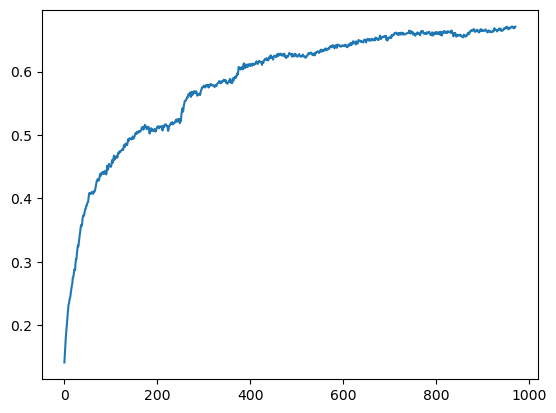

validation accuracy: 0.6706
generation 9702  test set: 8 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.76
generation 9703  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.695
generation 9704  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.69
generation 9705  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.697
generation 9706  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.697
generation 9707  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.663
generation 9708  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.697
generation 9709  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.665
generation 9710  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.667
generation 9711  test set: 7 evaluating performances||||

generation 9777  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.666
generation 9778  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.694
generation 9779  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.741
generation 9780  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.695
generation 9781  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.695
average best of last 100 generations 0.6995799999999995
evaluating performances| done! generation 9782  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.672
generation 9783  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 9784  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.663
generation 9785  test set: 0 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0

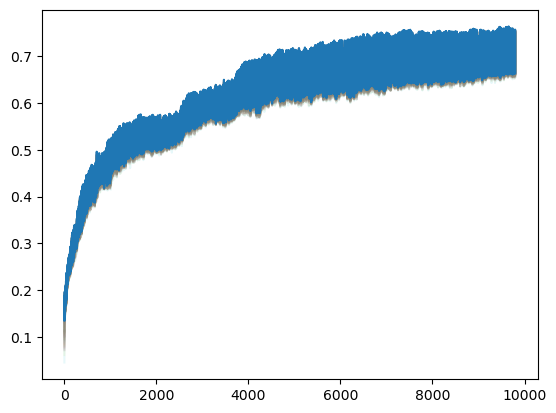

average best of last 100 generations 0.6990799999999999


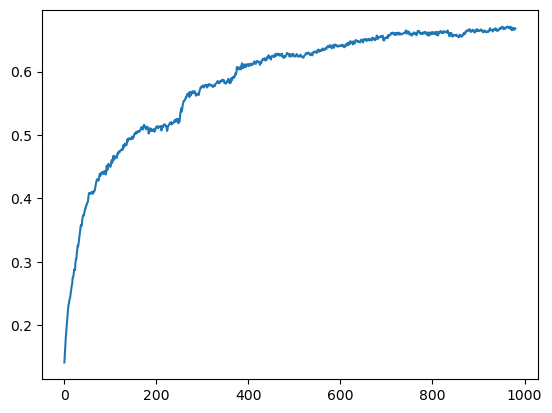

validation accuracy: 0.6678
generation 9802  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.667
generation 9803  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.693
generation 9804  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.694
generation 9805  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.666
generation 9806  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.695
generation 9807  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.743
generation 9808  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.695
generation 9809  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.735
generation 9810  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.697
generation 9811  test set: 4 evaluating performances||

generation 9877  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.698
generation 9878  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.661
generation 9879  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.699
generation 9880  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.738
generation 9881  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.671
average best of last 100 generations 0.7014800000000001
evaluating performances| done! generation 9882  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.694
generation 9883  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.689
generation 9884  test set: 1 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.67
generation 9885  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.

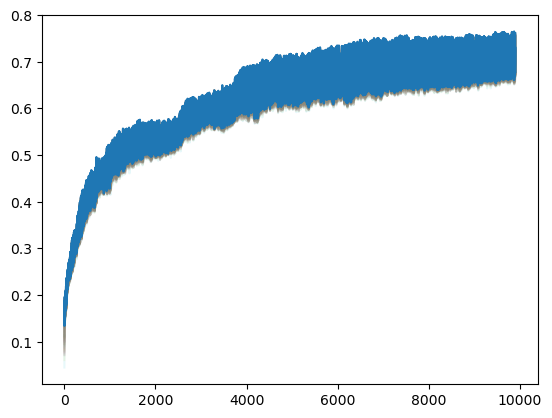

average best of last 100 generations 0.70111


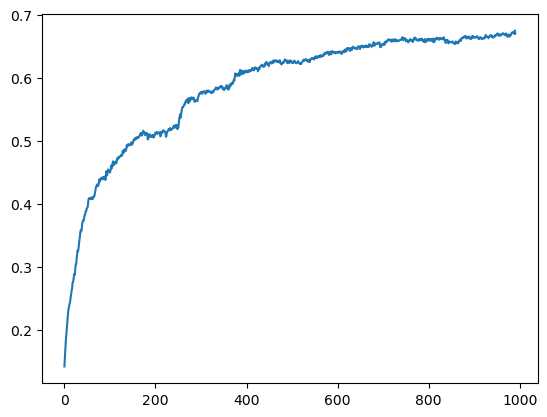

validation accuracy: 0.6707
generation 9902  test set: 6 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.734
generation 9903  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.692
generation 9904  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.666
generation 9905  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.737
generation 9906  test set: 3 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.669
generation 9907  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.739
generation 9908  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.728
generation 9909  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.67
generation 9910  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.73
generation 9911  test set: 9 evaluating performances||||

generation 9977  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.739
generation 9978  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.729
generation 9979  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.696
generation 9980  test set: 4 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.697
generation 9981  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.741
average best of last 100 generations 0.70674
evaluating performances| done! generation 9982  test set: 5 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.743
generation 9983  test set: 2 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.667
generation 9984  test set: 9 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.701
generation 9985  test set: 7 evaluating performances|||||||||||||||||||||||||||||| done!  best: 0.728
genera

In [12]:
true = True
import pickle
print_graphs = true
import gc

generations = 10000
test_set = 0

for gen in range(generations):
    print("generation " + str(len(performance_over_time) + 1), end=" ")
    if true and gen != 0:
        test_set = np.random.randint(10)
    print(" test set:", test_set, end=" ")
    if(gen%10==0):
        with open('backup/networks_lnn.pkl', 'wb') as f:
            pickle.dump(networks, f)
    networks = evaluate_performance(networks, x_test[test_set], y_test_ohe[test_set])
    if(gen%10==0):
        with open('lnn_run5_data/networks_lnn.pkl', 'wb') as f:
            pickle.dump(networks, f)
    
    print(" best:", networks[0][0])  # , "second:", evaluated_networks[1][0], "third:", evaluated_networks[2][0])
    performance_over_time.append(np.array(networks)[:, 0])
    test_sets_used.append(test_set)
    generational_mutation_range = mutation_range
    if true:  # change back
        generational_mutation_range = np.random.rand() * mutation_range
    mutation_ranges.append(generational_mutation_range)
    #print("mutating in range:", generational_mutation_range)
    #weight_history.append(networks[0][1].weights)
    next_gen = repopulate(networks, generational_mutation_range, 4)
    
    del networks
    networks = next_gen
    
    if (gen % 10 == 0) and print_graphs:
        print("average best of last 100 generations", np.average(np.array(performance_over_time)[-100:, 0]))
    gc.collect()
    if(gen%10==0):
        val_accuracy = evaluate_performance([networks[0]], x_val, y_val)[0][0]
        validation_accuracy.append(val_accuracy)
    if(gen%100==0):
        plt.plot(np.array(performance_over_time), alpha= 0.1)
        plt.plot(np.array(performance_over_time)[:,0])
        plt.show()
        print("average best of last 100 generations",np.average(np.array(performance_over_time)[-100:,0]))  
        plt.plot(validation_accuracy)
        plt.show()
        print("validation accuracy:", val_accuracy)
        with open('lnn_run5_data/performance_over_time_lnn.pkl', 'wb') as f:
            pickle.dump(performance_over_time, f)
        with open('lnn_run5_data/validation_accuracy.pkl', 'wb') as f:
            pickle.dump(validation_accuracy, f)
        with open('lnn_run5_data/test_sets_used.pkl', 'wb') as f:
            pickle.dump(test_sets_used, f)
    
    gc.collect()
    


In [13]:
"""print(len(weight_history))
print(np.array(weight_history[0][0]).shape)
print(np.array(weight_history[0][1]).shape)
hist = np.array([i[1] for i in weight_history])
hist = hist.reshape(1000,100)
plt.plot(hist, alpha=0.3)
plt.show()"""

'print(len(weight_history))\nprint(np.array(weight_history[0][0]).shape)\nprint(np.array(weight_history[0][1]).shape)\nhist = np.array([i[1] for i in weight_history])\nhist = hist.reshape(1000,100)\nplt.plot(hist, alpha=0.3)\nplt.show()'

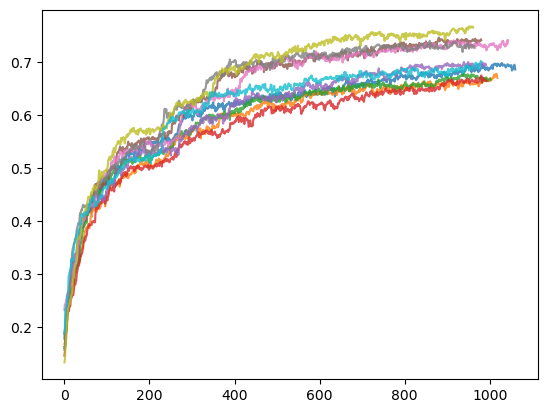

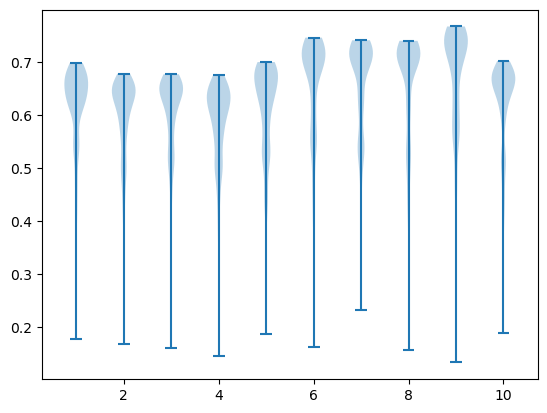

(10000,)
(9999,)


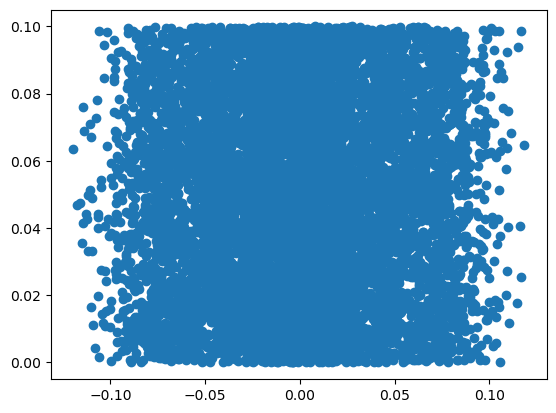

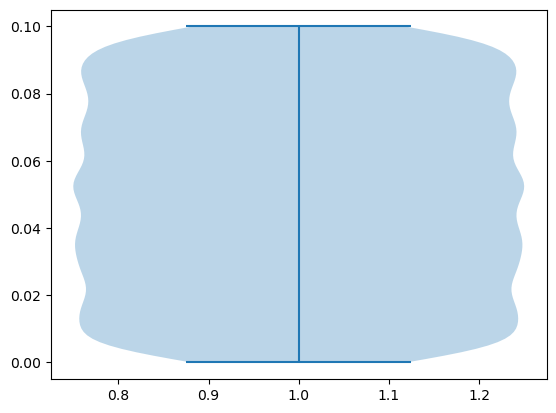

In [14]:
#visualising performance across the 10 different sets

performance_hist = np.array(performance_over_time)[-len(test_sets_used):,0]
set_perf = []
for i in range(10):
    set_perf.append([])

for i in range(len(test_sets_used)):
    set_perf[test_sets_used[i]].append(performance_hist[i])

for i in set_perf:
    plt.plot(i, alpha=0.8)
plt.show()

plt.violinplot(set_perf)
plt.show()

performance_hist = np.array(performance_over_time)[-len(test_sets_used):]
performance_changes = []
for i in range(len(performance_hist)-1):
    performance_changes.append(np.average(performance_hist[i])-np.average(performance_hist[i+1]))

print(np.array(mutation_ranges)[:len(mutation_ranges)].shape)
print(np.array(performance_changes)[:len(mutation_ranges)].shape)

plt.scatter(np.array(performance_changes)[:len(mutation_ranges)], np.array(mutation_ranges)[:len(performance_changes)])
plt.show()
plt.violinplot(np.array(mutation_ranges))
plt.show()

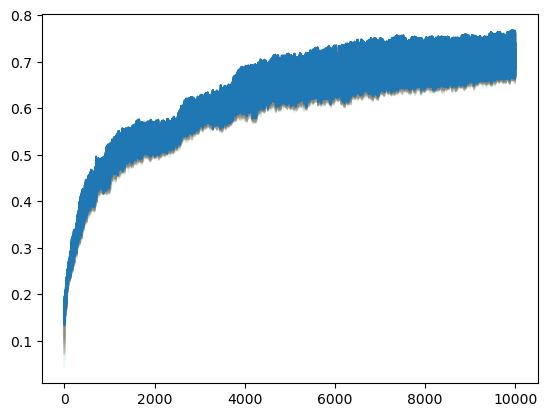

In [15]:
#TQDM -> loading bars

plt.plot(performance_over_time, alpha= 0.1)
plt.plot(np.array(performance_over_time)[:,0])
#plt.plot(list(0.99*np.ones(len(performance_over_time))))
plt.show()

NameError: name 'font' is not defined

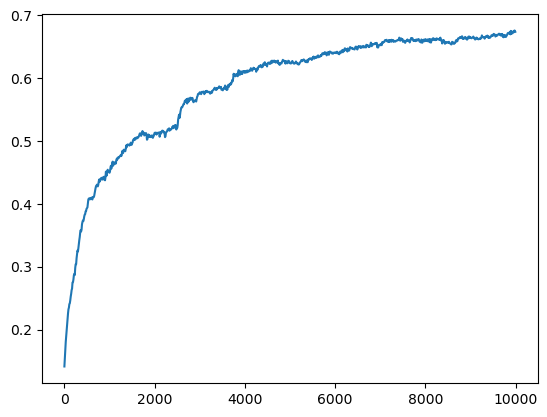

In [16]:

plt.plot(np.array(range(1000))*10,validation_accuracy)
plt.xlabel('Generations', fontsize=16, color='black', fontproperties=font)
plt.ylabel('Validation Accuracy', fontsize=16, color='black', fontproperties=font)
plt.savefig("lnn_validation_accuracy.pdf")
plt.show()

import matplotlib.font_manager as fm

# Assuming 'accuracy_over_time' is already defined
a = np.average(np.split(np.array(performance_over_time)[:6400,0], 100),axis=1)

# Create a larger figure
fig = plt.figure(figsize=(10, 6))

# Get the current axes, creating one if necessary.
ax = fig.gca()

# Set the background color of the plot to black
ax.set_facecolor('white')

# Create the plot with a line style and a bright blue color
plt.plot(average_performance, linestyle='-', color='blue', linewidth=2.0)

# Specify a font
font_path = '/Users/hannes/Library/Fonts/CenturyGothic.ttf'
font = fm.FontProperties(fname=font_path, size=16)

# Add title and labels with larger font sizes and black color
plt.title('Average Accuracy Over Time', fontsize=20, color='black', fontproperties=font)
plt.xlabel('Time', fontsize=16, color='black', fontproperties=font)
plt.ylabel('Average Accuracy', fontsize=16, color='black', fontproperties=font)

# Add a grid for easier visualization of values, with blue color
plt.grid(True, color='dodgerblue')

# Increase the size of the ticks for the x and y axes and make them black
plt.xticks(fontsize=14, color='black', fontproperties=font)
plt.yticks(fontsize=14, color='black', fontproperties=font)

# Add a legend with black font
plt.legend(['accuracy'], loc='upper left', fontsize=14, facecolor='black', edgecolor='dodgerblue', labelcolor='white')

# Set the color of the spines to blue
ax.spines[:].set_color('dodgerblue')

# Show the plot
plt.show()

In [ ]:
import matplotlib.font_manager
fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

for i in fonts:
    if "Gothic" in i:
        print(i)


In [ ]:
np.savetxt('training_run_'+str(training_run)+'_performance.csv', performance_over_time, delimiter=',')
np.savetxt('training_run_'+str(training_run)+'_test_sets_used.csv', test_sets_used, delimiter=',')
np.savetxt('training_run_'+str(training_run)+'_mutation_ranges.csv', mutation_ranges, delimiter=',')
np.save('training_run_'+str(training_run)+'_config.npy', np.array(log))

In [ ]:
print(max(performance_over_time[-1]))
print(validation_accuracy[-1])

In [ ]:

for i in range(10):
    plt.imshow(next_generation[0].weights[0].T[i].reshape((28,28)))
    plt.show()

In [ ]:
 plt.imshow(next_generation[0].weights[1])

In [ ]:
import pickle

In [ ]:
print(len(performance_over_time))

In [ ]:
def calculate_flops_matrix_multiplication_formula(n, p, m):
    # FLOPs for one element in the output matrix = 2p - 1
    flops_one_element = 2 * p - 1
    
    # Total FLOPs for the matrix multiplication
    total_flops = n * m * flops_one_element
    return total_flops


def fmm(n, p, m):
    return calculate_flops_matrix_multiplication_formula(n, p, m)

flops_nlnn_inf = 6*fmm(1,1944,1944)+6*1944
flops_gen_nlnn = flops_nlnn_inf * 1000 * 15
flops_run_nlnn = flops_gen_nlnn *10000
print("flops_run_nlnn:", flops_run_nlnn)

flops_lnn_inf = fmm(1,28*28,10)+10+fmm(1,10,10)+10
flops_gen_lnn = flops_lnn_inf * 1000 * 15
flops_run_lnn = flops_gen_lnn *10000
print("flops_run_lnn:", flops_run_lnn)


print("factor",flops_run_lnn/flops_run_nlnn, "or",flops_run_nlnn/flops_run_lnn )

In [ ]:
try:
    f = open('performance_over_time_nlnn.pkl', 'rb') 
    performance_over_time = pickle.load(f)
    print("previous performance loaded")
except:
    print("no previous performance found")